# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

How can the SAT College Board increase participation rates in potential states of opportunity?

Define the problem you are finding answers for from the data given.

## Executive summary
The new format for the SAT was released in March 2016 in an attempt to catch up to increasing ACT participation rates across the United. States. This project aims to uncover actionable insights and trend using SAT and ACT test scores for 2017 and 2018 data at the state level, in hopes of increasing future SAT participation rates.

### Findings:
- High levels of negative correlation were found among ACT and SAT participation rates and their respective test results.
- Additionally, negative correlation was found between the ACT and SAT participation rates.
- Median SAT participation rate is increasing from 2017 to 2018
- The distribution of variables (scores and participation rates) were found to not follow a normal distribution. Possible selection bias at play.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import libraries:

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Reading SAT 2017 and ACT 2017 into pandas
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')  

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Displaying the top 10 rows by index:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Displaying the top 10 rows by index:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### sat_2017

This dataframe contains:
- State: The different states that have participated in the 2017 SATs. All 51 states are included.
- Participation: The 2017 SAT participation rate of high-school graduates.
- Evidence-Based Reading and Writing: A reading and writing component of the SAT test
- Math: The mathematical component of the SAT test
- Total: The sum of the Evidence-Based Reading and Writing scores and Math scores


#### act_2017

This dataframe contains:
- State: The different states that have participated in the 2017 ACTs. All 51 states are included with an additional National aggrigate row.
- Participation: The 2017 ACT participation rate of high-school graduates.
- English: The English component of the ACT test
- Math: The Math component of the ACT test
- Reading: The reading component of the ACT test
- Science: The science component of the ACT test
- Composite: A simple mean of English, Math, Reading and Science rounded to the nearest whole number at individual level

#### 4a. Does the data look complete? 

In [5]:
#Checking data for any missing values using .isnull() and summing it up using .sum() to give an overview
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [6]:
#Checking data for any missing values using .isnull() and summing it up using .sum() to give an overview
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### Missing data?
Data looks complete, there are no missing values in sat_2017 and act_2017

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
#Using the .describe() function returns a breif satistical overview of the data in the columns
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
#Using the .describe() function returns a breif satistical overview of the data in the columns
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [9]:
#Checking the datatype and number of entries
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [10]:
#Checking the datatype and number of entries
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


### Issues with the data
- Minimum of sat_2017 Math column is 52 (not possible)
- Minimum of act_2017 Science column is 2.3 (unlikely given that the mean is 21)
- act_2017 has an extra row (52 vs 51)
- participation columns in both sat_2017 and act_2017 are objects, possibility of having to change it to a float

### Minimum and maximum possible values

- [SAT scores are on a range of 200-800 for each subject with a total of 400-1600](https://blog.prepscholar.com/sat-score-range)

- [ACT scores are on a range of 1-36 for all subjects and composite scores](https://blog.prepscholar.com/what-is-a-good-act-score-a-bad-act-score-an-excellent-act-score)

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**A new column in sat_2017 is created, labelled 'Check_sum' which is 'EBRW' + 'Math'**

In [11]:
#Check_sum is created to check if the 'Total' = 'Evidence-Based Reading and Writing' + 'Math'
sat_2017['Check_sum'] = sat_2017['Evidence-Based Reading and Writing'] + sat_2017['Math']
sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
0,Alabama,5%,593,572,1165,1165
1,Alaska,38%,547,533,1080,1080
2,Arizona,30%,563,553,1116,1116
3,Arkansas,3%,614,594,1208,1208
4,California,53%,531,524,1055,1055
5,Colorado,11%,606,595,1201,1201
6,Connecticut,100%,530,512,1041,1042
7,Delaware,100%,503,492,996,995
8,District of Columbia,100%,482,468,950,950
9,Florida,83%,520,497,1017,1017


In [12]:
# Using boolean filtering to identify states that have descrepencies in 'Total' and 'Check_sum'
sat_2017[sat_2017['Total'] != sat_2017['Check_sum']]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
6,Connecticut,100%,530,512,1041,1042
7,Delaware,100%,503,492,996,995
12,Idaho,93%,513,493,1005,1006
15,Iowa,2%,641,635,1275,1276
18,Louisiana,4%,611,586,1198,1197
20,Maryland,69%,536,52,1060,588
21,Massachusetts,76%,555,551,1107,1106
22,Michigan,100%,509,495,1005,1004
24,Mississippi,2%,634,607,1242,1241
27,Nebraska,3%,629,625,1253,1254


- Most likely the descrepancies are due to rounding errors, with the exception of Maryland.

- Maryland has a 'Evidence-Based Reading and Writing' of 536, 'Math' of 56 but a Total of 1060.

- [Double checking external sources show that it should be 524](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)

In [13]:
# Reassigning the value of Maryland Math column using loc
sat_2017.loc[20,'Math'] = 524

In [14]:
#Checking if it is reassigned correctly
sat_2017.loc[20]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Check_sum                                  588
Name: 20, dtype: object

**We wil also check the max and min scores for each dataframe**

In [15]:
#Using describe to return the statistical overview
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total,Check_sum
count,51.000000,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039,1116.745098
std,45.666901,47.121395,92.494812,119.030894
min,482.000000,468.000000,950.000000,588.000000
25%,533.500000,523.500000,1055.500000,1053.500000
50%,559.000000,548.000000,1107.000000,1106.000000
75%,613.000000,599.000000,1212.000000,1211.500000
max,644.000000,651.000000,1295.000000,1295.000000


**min and max sat_2017 scores are inline (200-800)**


source: https://blog.prepscholar.com/whats-the-highest-possible-sat-score


In [16]:
#Using describe to return the statistical overview
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


**min and max act_2017 scores are inline(1-36)**

source: https://blog.prepscholar.com/how-is-the-act-scored

#### 5. What are your data types? 
Display the data types of each feature. 

In [17]:
#.info() returns the datatypes of each column
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
Check_sum                             51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [18]:
#.info() returns the datatypes of each column
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

#### Identifying incorrect datatypes
Composite in act_2017 should be float instead of object. Participation rates for both sat_2017 and act_2017 should be float as well.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [19]:
#Creating a function that turns the participation column in both dataframes into float
def recode(column):
    #Replace '%' with '' and changing it into a percentage by '/100'
    return float(column.replace('%', ''))/100

In [20]:
#Mapping the recode function onto the sat_2017 participation column
sat_2017['Participation'] = sat_2017['Participation'].map(recode)

In [21]:
#Mapping the recode function onto the act_2017 participation column
act_2017['Participation'] = act_2017['Participation'].map(recode)

In [22]:
#Ensuring that the map(recode) worked
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
0,Alabama,0.05,593,572,1165,1165
1,Alaska,0.38,547,533,1080,1080
2,Arizona,0.30,563,553,1116,1116
3,Arkansas,0.03,614,594,1208,1208
4,California,0.53,531,524,1055,1055


In [23]:
#Ensuring that the map(recode) worked
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [24]:
#Identifying why 'composite' is not a float
act_2017.loc[51]

State            Wyoming
Participation          1
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite          20.2x
Name: 51, dtype: object

Composite column for Wyoming is incorrect. It should be 20.2 according to the [offical results](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf).

In [25]:
#Reassigning using loc
act_2017.loc[51, 'Composite'] = 20.2

In [26]:
#Changing the datatype from object to float using 'astype(float)'
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [27]:
#Successfully changed datatype
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


**Now that 'composite' in act_2017 is a float, we can check if the data is a close to the average of English, Math, Reading, Science**

In [28]:
#Creating a dummy column that takes the average of English, Math, Reading and Science
act_2017['Check_avg'] = act_2017[['English','Math','Reading','Science']].mean(axis=1)

In [29]:
# A secodn dummy column is created to calculate the difference between the original 'Composite' and the new 'Check_avg'
act_2017['Check_diff'] = act_2017['Check_avg'] - act_2017['Composite']

In [30]:
#Finding the largeset rows with the biggest 'Check_diff'
act_2017[act_2017['Composite'] != act_2017['Check_avg']].sort_values('Check_diff').head(10)

,State,Participation,English,Math,Reading,Science,Composite,Check_avg,Check_diff
21,Maryland,0.28,23.3,23.1,24.2,2.3,23.6,18.225,-5.375
42,South Dakota,0.80,20.7,21.5,22.3,22.0,21.8,21.625,-0.175
41,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,18.525,-0.175
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,20.625,-0.175
36,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,21.825,-0.175
35,North Dakota,0.98,19.0,20.4,20.5,20.6,20.3,20.125,-0.175
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9,21.725,-0.175
5,California,0.31,22.5,22.7,23.1,22.2,22.8,22.625,-0.175
24,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,21.325,-0.175
31,New Jersey,0.34,23.8,23.8,24.1,23.2,23.9,23.725,-0.175


In [31]:
#Chaning the value of 'Science' in Maryland to 23.2
act_2017.loc[21, 'Science'] = 23.2

In [32]:
#Checking if the change made is correctly applied
act_2017.loc[21]

State            Maryland
Participation        0.28
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Check_avg          18.225
Check_diff         -5.375
Name: 21, dtype: object

Science column for Maryland is incorrect. It should be 23.2 according to the [offical results](https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf).

- Finish your data modifications by making sure the columns are now typed appropriately.

In [33]:
#Checking data type 
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
Check_sum                             51 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.5+ KB


In [34]:
#Checking data type
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
Check_avg        52 non-null float64
Check_diff       52 non-null float64
dtypes: float64(8), object(1)
memory usage: 3.8+ KB


In [35]:
#Checking min and max values again. Special attention to the participation column since it is now a float
sat_2017.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total,Check_sum
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,1116.745098
std,0.352766,45.666901,47.121395,92.494812,119.030894
min,0.020000,482.000000,468.000000,950.000000,588.000000
25%,0.040000,533.500000,523.500000,1055.500000,1053.500000
50%,0.380000,559.000000,548.000000,1107.000000,1106.000000
75%,0.660000,613.000000,599.000000,1212.000000,1211.500000
max,1.000000,644.000000,651.000000,1295.000000,1295.000000


In [36]:
#Checking min and max values again. Special attention to the participation column since it is now a float
act_2017.describe()

,Participation,English,Math,Reading,Science,Composite,Check_avg,Check_diff
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.651538,20.919231,21.173077,22.001923,21.442308,21.509615,21.283654,-0.225962
std,0.318325,2.332132,1.963602,2.048672,1.723351,2.002083,2.027790,0.728717
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,17.650000,-5.375000
25%,0.310000,19.000000,19.400000,20.475000,19.975000,19.800000,19.693750,-0.150000
50%,0.680000,20.550000,20.900000,21.700000,21.300000,21.400000,21.062500,-0.125000
75%,1.000000,23.300000,23.100000,24.125000,23.200000,23.600000,22.843750,-0.100000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,25.350000,-0.050000


### Participation column
Now that the participation column in both datasets are floats, the min and max values are in line with being 0-1

### Removing the dummy columns created in sat_2017 and act_2017

In [37]:
#Removing the dummy columns using drop function
sat_2017.drop(['Check_sum'], axis=1, inplace=True)

In [38]:
#Removing the dummy columns using drop function
act_2017.drop(['Check_avg'], axis=1, inplace=True)

In [39]:
#Removing the dummy columns using drop function
act_2017.drop(['Check_diff'], axis=1, inplace=True)

- Display the data types again to confirm they are correct.

In [40]:
#Displaying the data dtypes of the dataframe using dtypes
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [41]:
#Displaying the data dtypes of the dataframe using dtypes
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [42]:
#Generating a list of sat_2017 column headers for reference
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [43]:
#Renaming of column names are done using the rename function with a dictionary
sat_2017.rename({'State':'state', 'Participation':'participation_sat17', 'Evidence-Based Reading and Writing':'reading_writing_sat17',
                         'Math':'math_sat17','Total': 'total_sat17'}, axis=1, inplace=True)

In [44]:
#Making sure that the changes took palce and no error is observed
sat_2017.columns

Index(['state', 'participation_sat17', 'reading_writing_sat17', 'math_sat17',
       'total_sat17'],
      dtype='object')

In [45]:
#Generating a list of act_2017 column headers for reference
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [46]:
#Renaming of column names are done using the rename function with a dictionary
act_2017.rename({'State': 'state', 'Participation': 'participation_act17', 'English':'english_act17',
                 'Math':'math_act17', 'Reading':'reading_act17', 'Science':'science_act17',
                 'Composite': 'composite_act17'}, axis=1, inplace=True)

In [47]:
#Making sure that the changes took palce and no error is observed
act_2017.columns

Index(['state', 'participation_act17', 'english_act17', 'math_act17',
       'reading_act17', 'science_act17', 'composite_act17'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Range|Dataset|Description|
|---|---|---|---|---|
|state|object|All states|final|US states of the data|
|participation_sat17|float64|0-1|final|State participation rate for the SAT in 2017|
|reading_writing_sat17|int64|200-800|final|State average SAT score for Evidence-Based Reading and Writing in 2017|
|math_sat17|int64|200-800|final|State average SAT Math score in 2017|
|total_sat17|int64|400-1600|final|State average SAT Total score in 2017|
|participation_act17|float64|0-1|final|State participation rate for the ACT in 2017|
|english_act17|float64|1-36|final|State average ACT English score for 2017|
|math_act17|float64|1-36|final|State average ACT Math score for 2018|
|reading_act17|float64|1-36|final|State average ACT Reading score for 2018|
|science_act17|float64|1-36|final|State average ACT Science score for 2018|
|composite_act17|float64|1-36|final|State average ACT Composite score for 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [48]:
#'National' in act_2017 is the extra row not found in sat_2017. Removing it using drop method
act_2017.drop([0],axis=0, inplace=True)

In [49]:
#Checking if the row is removed
act_2017.head()

,state,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [50]:
#Merging dataframes using merge function
#The reference index used will be the state column
#An 'outer' method is used to combine all exisitng data
combined_2017 = pd.merge(sat_2017, act_2017, on='state', how='outer')

In [51]:
#Checking the results of the merger
combined_2017.head()

,state,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [52]:
#Saving the combined dataframe
combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

**Importing in sat_2018 and act_2018_updated**

In [53]:
#Reading the sat_2018 data into pandas
sat_2018 = pd.read_csv('../data/sat_2018.csv')

In [54]:
#Reading the sat_2018 data into pandas
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

**Change column labels**
- sat_2018 columns to match sat_2017
- act_2018 columns to match sat_2017

In [55]:
#sat_2018 column headers for reference
sat_2018.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [56]:
#Renaming of columns using rename and a dictionary
sat_2018.rename({'State':'state', 'Participation':'participation_sat18', 
                 'Evidence-Based Reading and Writing':'reading_writing_sat18',
                 'Math':'math_sat18','Total': 'total_sat18'}, axis=1, inplace=True)

In [57]:
#Checking if the renaming is done correctly
sat_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [58]:
#act_2018 column headers for reference
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [59]:
#Renaming of columns using rename and a dictionary
act_2018.rename({'State':'state', 'Percentage of Students Tested': 'participation_act18',
                 'Average Composite Score':'composite_act18',
                 'Average English Score':'english_act18', 'Average Math Score':'math_act18', 
                 'Average Reading Score':'reading_act18','Average Science Score':'science_act18'}, axis=1, inplace=True)

In [60]:
#Checking if the renaming is done correctly
act_2018.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


**Check data integrity and  missing data**

In [61]:
#Checking for missing data
sat_2018.isnull().sum()

state                    0
participation_sat18      0
reading_writing_sat18    0
math_sat18               0
total_sat18              0
dtype: int64

In [62]:
#Checking for missing data
act_2018.isnull().sum()

state                  0
participation_act18    0
composite_act18        0
english_act18          0
math_act18             0
reading_act18          0
science_act18          0
dtype: int64

In [63]:
#Checking data types for consistency
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                    51 non-null object
participation_sat18      51 non-null object
reading_writing_sat18    51 non-null int64
math_sat18               51 non-null int64
total_sat18              51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [64]:
#Checking data types for consistency
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                  51 non-null object
participation_act18    51 non-null int64
composite_act18        51 non-null float64
english_act18          51 non-null float64
math_act18             51 non-null float64
reading_act18          51 non-null float64
science_act18          51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


**Checking the min and max scores fall within range**

In [65]:
#Checking the min and max of each column
sat_2018.describe()

,reading_writing_sat18,math_sat18,total_sat18
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [66]:
#Checking the min and max of each column
act_2018.describe()

,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [67]:
#Creating check_sum to check the total column
sat_2018['Check_sum'] = sat_2018['reading_writing_sat18'] + sat_2018['math_sat18']

In [68]:
#Identifying rows with discrepencies in 'total' and 'check_sum' 
sat_2018[sat_2018['total_sat18'] != sat_2018['Check_sum']]

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,Check_sum
3,Arkansas,5%,592,576,1169,1168
6,Connecticut,100%,535,519,1053,1054
7,Delaware,100%,505,492,998,997
16,Kansas,4%,633,631,1265,1264
22,Michigan,100%,511,499,1011,1010
31,New Mexico,16%,552,540,1093,1092
33,North Carolina,52%,554,543,1098,1097
45,Vermont,64%,565,554,1120,1119
50,Wyoming,3%,633,625,1257,1258


**Once again, we see that the total_sat18 and the check_sum columns have slight variation, most likely due to average across the state**

**Checking the act_2018 composite data**

In [69]:
#Creating check_avg by taking the mean of the subjects
act_2018['Check_avg'] = act_2018[['english_act18','math_act18','reading_act18','reading_act18']].mean(axis=1)

In [70]:
#Check_diff will highlight an large errors in composite
act_2018['Check_diff'] = act_2018['Check_avg'] - act_2018['composite_act18']

**Differences in check_sum and the composite are due to rounding errors**

In [71]:
#Identifying rows with the largest discrepencies
act_2018[act_2018['composite_act18'] != act_2018['Check_avg']].sort_values('Check_diff').head(10)

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18,Check_avg,Check_diff
10,Georgia,53,21.4,20.9,20.7,21.2,21.4,21.000,-0.400
49,Wisconsin,100,20.5,19.8,20.3,20.6,20.8,20.325,-0.175
40,South Carolina,100,18.3,17.3,18.2,18.6,18.5,18.175,-0.125
27,Nebraska,100,20.1,19.4,19.8,20.4,20.1,20.000,-0.100
34,North Dakota,98,20.3,19.1,20.3,20.7,20.5,20.200,-0.100
28,Nevada,100,17.7,16.6,17.8,18.0,17.9,17.600,-0.100
41,South Dakota,77,21.9,20.8,21.6,22.4,22.2,21.800,-0.100
24,Mississippi,100,18.6,18.2,18.1,18.9,18.6,18.525,-0.075
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,19.150,-0.050
44,Utah,100,20.4,19.7,19.9,20.9,20.5,20.350,-0.050


#### Remove the 'Check' variables created from both datasets

In [72]:
#removing the dummy columns created
sat_2018.drop('Check_sum', axis=1, inplace=True)

In [73]:
#removing the dummy columns created
act_2018.drop('Check_avg', axis=1, inplace=True)

In [74]:
#removing the dummy columns created
act_2018.drop('Check_diff', axis=1, inplace=True)

In [75]:
#Verifying that columns have been removed
act_2018.head()

,state,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [76]:
#Verifying that columns have been removed
sat_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


#### Change participation to a float

In [77]:
#Checking the datatype of particiapation
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                  51 non-null object
participation_act18    51 non-null int64
composite_act18        51 non-null float64
english_act18          51 non-null float64
math_act18             51 non-null float64
reading_act18          51 non-null float64
science_act18          51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [78]:
#Checking the datatype of particiapation
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                    51 non-null object
participation_sat18      51 non-null object
reading_writing_sat18    51 non-null int64
math_sat18               51 non-null int64
total_sat18              51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [79]:
#participation_sat18 is an object because it has '%'
sat_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [80]:
#As participation_act18 is an int, '/100' will chnage it to a percentage
act_2018['participation_act18'] = act_2018['participation_act18']/100

In [81]:
#Using the map(recode) earlier on sat_2017
sat_2018['participation_sat18'] = sat_2018['participation_sat18'].map(recode)

In [82]:
#Datatype changed successfully
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                  51 non-null object
participation_act18    51 non-null float64
composite_act18        51 non-null float64
english_act18          51 non-null float64
math_act18             51 non-null float64
reading_act18          51 non-null float64
science_act18          51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [83]:
#Datatype changed successfully
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                    51 non-null object
participation_sat18      51 non-null float64
reading_writing_sat18    51 non-null int64
math_sat18               51 non-null int64
total_sat18              51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [84]:
#First combined sat_2018 and act_2018 to form a combined_2018
#Similar method used as above, merge on state using 'outer' to include all data
combined_2018 = pd.merge(sat_2018, act_2018, on='state', how='outer')

In [85]:
#Checking if merger is successful
combined_2018.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,science_act18
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [86]:
#Finally, merging combined_2018 and combined_2017 into final
#Similar method used as above, merge on state using 'outer' to include all data
final = pd.merge(combined_2018, combined_2017, on='state', how='outer')

In [87]:
#Checking if merger is successful
final.head()

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,...,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,...,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,...,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,...,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,...,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,...,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [88]:
#Saving final.csv using relative location
final.to_csv('../data/final.csv', index=False)

### Updated Data dictionary

|Feature|Type|Range|Dataset|Description|
|---|---|---|---|---|
|state|object|All states|final|US states of the data|
|participation_sat18|float64|0-1|final|State participation rate for the SAT in 2018|
|reading_writing_sat18|int64|200-800|final|State average SAT Evidence-Based Reading and Writing score in 2018|
|math_sat18|int64|200-800|final|State average SAT Math score in 2018|
|total_sat18|int64|400-1600|final|State average SAT Total score in 2018|
|participation_act18|float64|0-1|final|State participation rate for the ACT in 2018|
|composite_act18|float64|1-36|final|State average ACT Composite score for 2018|
|english_act18|float64|1-36|final|State average ACT English score for 2018|
|math_act18|float64|1-36|final|State average ACT Math score for 2018|
|reading_act18|float64|1-36|final|State average ACT Reading score for 2018|
|science_act18|float64|1-36|final|State average ACT Science score for 2018|
|participation_sat17|float64|0-1|final|State participation rate for the SAT in 2017|
|reading_writing_sat17|int64|200-800|final|State average SAT score for Evidence-Based Reading and Writing in 2017|
|math_sat17|int64|200-800|final|State average SAT Math score in 2017|
|total_sat17|int64|400-1600|final|State average SAT Total score in 2017|
|participation_act17|float64|0-1|final|State participation rate for the ACT in 2017|
|english_act17|float64|1-36|final|State average ACT English score for 2017|
|math_act17|float64|1-36|final|State average ACT Math score for 2018|
|reading_act17|float64|1-36|final|State average ACT Reading score for 2018|
|science_act17|float64|1-36|final|State average ACT Science score for 2018|
|composite_act17|float64|1-36|final|State average ACT Composite score for 2017|


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [89]:
#Adding '.T' to the end will transpose our dataframe, making it easier to read
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat18,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
reading_writing_sat18,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
math_sat18,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
total_sat18,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
participation_act18,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
composite_act18,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6
english_act18,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
math_act18,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
reading_act18,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
science_act18,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [90]:
#Defining the standard_deviation function
def standard_deviation(column):
    #n is the number of variables in column
    n= len(column)
    #mean of all the variables in column
    mean = column.mean()
    summation = 0
    #Calculating the summation of differences from the mean
    for x in column:
        summation += (x - mean)**2
    return (summation/n)**0.5

In [91]:
#Checking if the function works:
standard_deviation(final['math_sat18'])

47.30194550378352

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [92]:
#Using dictionary comprehension to apply the function on each column in the dataframe:
sd = {col : standard_deviation(final[col]) for col in final.columns if final[col].dtypes != object}
sd

{'participation_sat18': 0.3694661922353942,
 'reading_writing_sat18': 47.03460978357609,
 'math_sat18': 47.30194550378352,
 'total_sat18': 93.22742384464433,
 'participation_act18': 0.33745194881997503,
 'composite_act18': 2.0855261815801147,
 'english_act18': 2.4222536143202795,
 'math_act18': 2.015707255555717,
 'reading_act18': 2.145891884510421,
 'science_act18': 1.8516885484833543,
 'participation_sat17': 0.3492907076664507,
 'reading_writing_sat17': 45.21697020437866,
 'math_sat17': 46.65713364485503,
 'total_sat17': 91.58351056778743,
 'participation_act17': 0.3182417575123181,
 'english_act17': 2.3304876369363363,
 'math_act17': 1.9624620273436781,
 'reading_act17': 2.0469029314842646,
 'science_act17': 1.7222161451443676,
 'composite_act17': 2.000786081581989}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [93]:
# Using numpy standard deviation 'np.std'
np.std(final, axis=0)

participation_sat18       0.369466
reading_writing_sat18    47.034610
math_sat18               47.301946
total_sat18              93.227424
participation_act18       0.337452
composite_act18           2.085526
english_act18             2.422254
math_act18                2.015707
reading_act18             2.145892
science_act18             1.851689
participation_sat17       0.349291
reading_writing_sat17    45.216970
math_sat17               46.657134
total_sat17              91.583511
participation_act17       0.318242
english_act17             2.330488
math_act17                1.962462
reading_act17             2.046903
science_act17             1.722216
composite_act17           2.000786
dtype: float64

In [94]:
# Using numpy standard deviation 'np.std' wtih degrees of freedom =1
np.std(final, axis=0, ddof=1)

participation_sat18       0.373143
reading_writing_sat18    47.502627
math_sat18               47.772623
total_sat18              94.155083
participation_act18       0.340810
composite_act18           2.106278
english_act18             2.446356
math_act18                2.035765
reading_act18             2.167245
science_act18             1.870114
participation_sat17       0.352766
reading_writing_sat17    45.666901
math_sat17               47.121395
total_sat17              92.494812
participation_act17       0.321408
english_act17             2.353677
math_act17                1.981989
reading_act17             2.067271
science_act17             1.739353
composite_act17           2.020695
dtype: float64

### Discrepencies in standard deviation
np.std matches the intial manually caluclated standard deviation. But with a minor adjust to the degrees of freedom, we are able to match pandas.describe

In [95]:
#Changing the function, to yield ddof=1:
def standard_deviation_ddof(column):
    #n is the number of variables in column
    n= len(column)
    #mean of all the variables in column
    mean = column.mean()
    summation = 0
    #Calculating the summation of differences from the mean
    for x in column:
        summation += (x - mean)**2
    return (summation/(n-1))**0.5

In [96]:
#Re-run the dictionary comprehension to use the adjusted function
sd = {col : standard_deviation_ddof(final[col]) for col in final.columns if final[col].dtypes != object}
sd

{'participation_sat18': 0.37314256330391965,
 'reading_writing_sat18': 47.50262737831599,
 'math_sat18': 47.77262322095955,
 'total_sat18': 94.15508275097599,
 'participation_act18': 0.3408097623567245,
 'composite_act18': 2.1062781969951776,
 'english_act18': 2.4463562339793055,
 'math_act18': 2.035764538177723,
 'reading_act18': 2.1672445684804105,
 'science_act18': 1.8701137639716146,
 'participation_sat17': 0.35276632270013036,
 'reading_writing_sat17': 45.66690138768932,
 'math_sat17': 47.12139516560329,
 'total_sat17': 92.49481172519046,
 'participation_act17': 0.32140842015886834,
 'english_act17': 2.35367713980303,
 'math_act17': 1.9819894936505533,
 'reading_act17': 2.0672706264873146,
 'science_act17': 1.7393530462812443,
 'composite_act17': 2.020694891154341}

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Which states have the highest and lowest participation rates?

In [97]:
#Column sorting for higest SAT participation in 2017
final.sort_values('participation_sat17', ascending=False)['state'].head()

8     District of Columbia
22                Michigan
6              Connecticut
7                 Delaware
29           New Hampshire
Name: state, dtype: object

In [98]:
#Column sorting for lowest SAT participation in 2017
final.sort_values('participation_sat17')['state'].head()

34    North Dakota
24     Mississippi
15            Iowa
25        Missouri
44            Utah
Name: state, dtype: object

In [99]:
#Column sorting for higest SAT participation in 2018
final.sort_values('participation_sat18',ascending=False)['state'].head(10)

5                 Colorado
6              Connecticut
7                 Delaware
22                Michigan
12                   Idaho
19                   Maine
13                Illinois
39            Rhode Island
29           New Hampshire
8     District of Columbia
Name: state, dtype: object

In [100]:
#Column sorting for lowest SAT participation in 2018
final.sort_values('participation_sat18')['state'].head(10)

34    North Dakota
50         Wyoming
41    South Dakota
27        Nebraska
49       Wisconsin
24     Mississippi
15            Iowa
44            Utah
23       Minnesota
18       Louisiana
Name: state, dtype: object

In [101]:
#Column sorting for highest ACT participation in 2017
final.sort_values('participation_act17', ascending=False)['state'].head()

0       Alabama
17     Kentucky
49    Wisconsin
44         Utah
42    Tennessee
Name: state, dtype: object

In [102]:
#Column sorting for lowest ACT participation in 2017
final.sort_values('participation_act17')['state'].head()

19            Maine
29    New Hampshire
7          Delaware
39     Rhode Island
38     Pennsylvania
Name: state, dtype: object

In [103]:
#Column sorting for highest ACT participation in 2018
final.sort_values('participation_act18', ascending=False)['state'].head(10)

0            Alabama
17          Kentucky
49         Wisconsin
44              Utah
42         Tennessee
40    South Carolina
36              Ohio
35          Oklahoma
33    North Carolina
28            Nevada
Name: state, dtype: object

In [104]:
#Column sorting for lowest ACT participation in 2018
final.sort_values('participation_act18')['state'].head(10)

19            Maine
39     Rhode Island
29    New Hampshire
7          Delaware
38     Pennsylvania
22         Michigan
47       Washington
45          Vermont
46         Virginia
21    Massachusetts
Name: state, dtype: object

### Which states have the highest and lowest mean total/composite scores?

In [105]:
#Boolean filtering and then sorting by Total
#Highest Total scores are filtered by states above the 90% quantile
final[final['total_sat17'] > final['total_sat17'].quantile(0.9)].sort_values('total_sat17', ascending=False)['state'].head()

23    Minnesota
49    Wisconsin
15         Iowa
25     Missouri
16       Kansas
Name: state, dtype: object

In [106]:
#Boolean filtering and then sorting by Total
#Lowest Total scores are filtered by the states below the 10% quantile
final[final['total_sat17'] < final['total_sat17'].quantile(0.1)].sort_values('total_sat17')['state'].head()

8     District of Columbia
7                 Delaware
12                   Idaho
22                Michigan
19                   Maine
Name: state, dtype: object

In [107]:
#Boolean filtering and then sorting by Total
#Highest Total scores are filtered by states above the 90% quantile
final[final['total_sat18'] > final['total_sat18'].quantile(0.9)].sort_values('total_sat18', ascending=False)['state'].head()

23       Minnesota
49       Wisconsin
34    North Dakota
15            Iowa
16          Kansas
Name: state, dtype: object

In [108]:
#Boolean filtering and then sorting by Total
#Lowest Total scores are filtered by the states below the 10% quantile
final[final['total_sat18'] < final['total_sat18'].quantile(0.11)].sort_values('total_sat18')['state'].head()

8     District of Columbia
7                 Delaware
48           West Virginia
12                   Idaho
11                  Hawaii
Name: state, dtype: object

In [109]:
#Boolean filtering and then sorting by Total
#Highest Composite scores are filtered by states above the 90% quantile
final[final['composite_act17'] > final['composite_act17'].quantile(0.9)].sort_values('composite_act17', ascending=False)['state'].head()

29    New Hampshire
21    Massachusetts
6       Connecticut
19            Maine
Name: state, dtype: object

In [110]:
#Boolean filtering and then sorting by Total
#Lowest Composite scores are filtered by states above the 90% quantile
final[final['composite_act17'] < final['composite_act17'].quantile(0.1)].sort_values('composite_act17')['state'].head()

28            Nevada
24       Mississippi
40    South Carolina
11            Hawaii
33    North Carolina
Name: state, dtype: object

In [111]:
#Boolean filtering and then sorting by Total
#Highest Composite scores are filtered by states above the 90% quantile
final[final['composite_act18'] > final['composite_act18'].quantile(0.9)].sort_values('composite_act18', ascending=False)['state'].head()

6       Connecticut
21    Massachusetts
29    New Hampshire
32         New York
22         Michigan
Name: state, dtype: object

In [112]:
#Boolean filtering and then sorting by Total
#Lowest Composite scores are filtered by states above the 90% quantile
final[final['composite_act18'] < final['composite_act18'].quantile(0.1)].sort_values('composite_act18')['state'].head()

28            Nevada
40    South Carolina
24       Mississippi
11            Hawaii
Name: state, dtype: object

### Do any states with 100% participation on a given test have a rate change year-to-year?

In [113]:
#Identifying states with 100% participation in SAT either year
final[(final['participation_sat18'] == 1) | (final['participation_sat17'] == 1)][['state','participation_sat17','participation_sat18']]

,state,participation_sat17,participation_sat18
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


In [114]:
#Identifying states with 100% participation in ACT either year
final[(final['participation_act18'] == 1) | (final['participation_act17'] == 1)][['state','participation_act17','participation_act18']]

,state,participation_act17,participation_act18
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
5,Colorado,1.00,0.30
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00
23,Minnesota,1.00,0.99
24,Mississippi,1.00,1.00
25,Missouri,1.00,1.00
26,Montana,1.00,1.00
27,Nebraska,0.84,1.00


- **Colorado has a huge swing of 11% particiaption in sat_2017 to 100% participation in sat_2018. Inline with ACT participation rates crashing from 100% to 30% from 2017 to 2018**


- **Nebraska and Ohio also see their participation rates of act increase 84% to 100% and 75% to 100% respectively**

### Do any states show have >50% participation on both tests either year?

In [115]:
#Using boolean filtering to identify participation rates that are greater than 50% in both years
final[(final['participation_act17'] >= 0.5) & (final['participation_act18'] >= 0.5)][['state', 'participation_act17', 'participation_act18']]

,state,participation_act17,participation_act18
0,Alabama,1.00,1.00
2,Arizona,0.62,0.66
3,Arkansas,1.00,1.00
9,Florida,0.73,0.66
10,Georgia,0.55,0.53
11,Hawaii,0.90,0.89
15,Iowa,0.67,0.68
16,Kansas,0.73,0.71
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00


In [116]:
#Using boolean filtering to identify participation rates that are greater than 50% in both years
final[(final['participation_sat17'] >= 0.5) & (final['participation_sat18'] >= 0.5)][['state', 'participation_sat17', 'participation_sat18']]

,state,participation_sat17,participation_sat18
4,California,0.53,0.60
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
9,Florida,0.83,0.56
10,Georgia,0.61,0.70
11,Hawaii,0.55,0.56
12,Idaho,0.93,1.00
14,Indiana,0.63,0.63
19,Maine,0.95,0.99


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

### Correlation heatmap

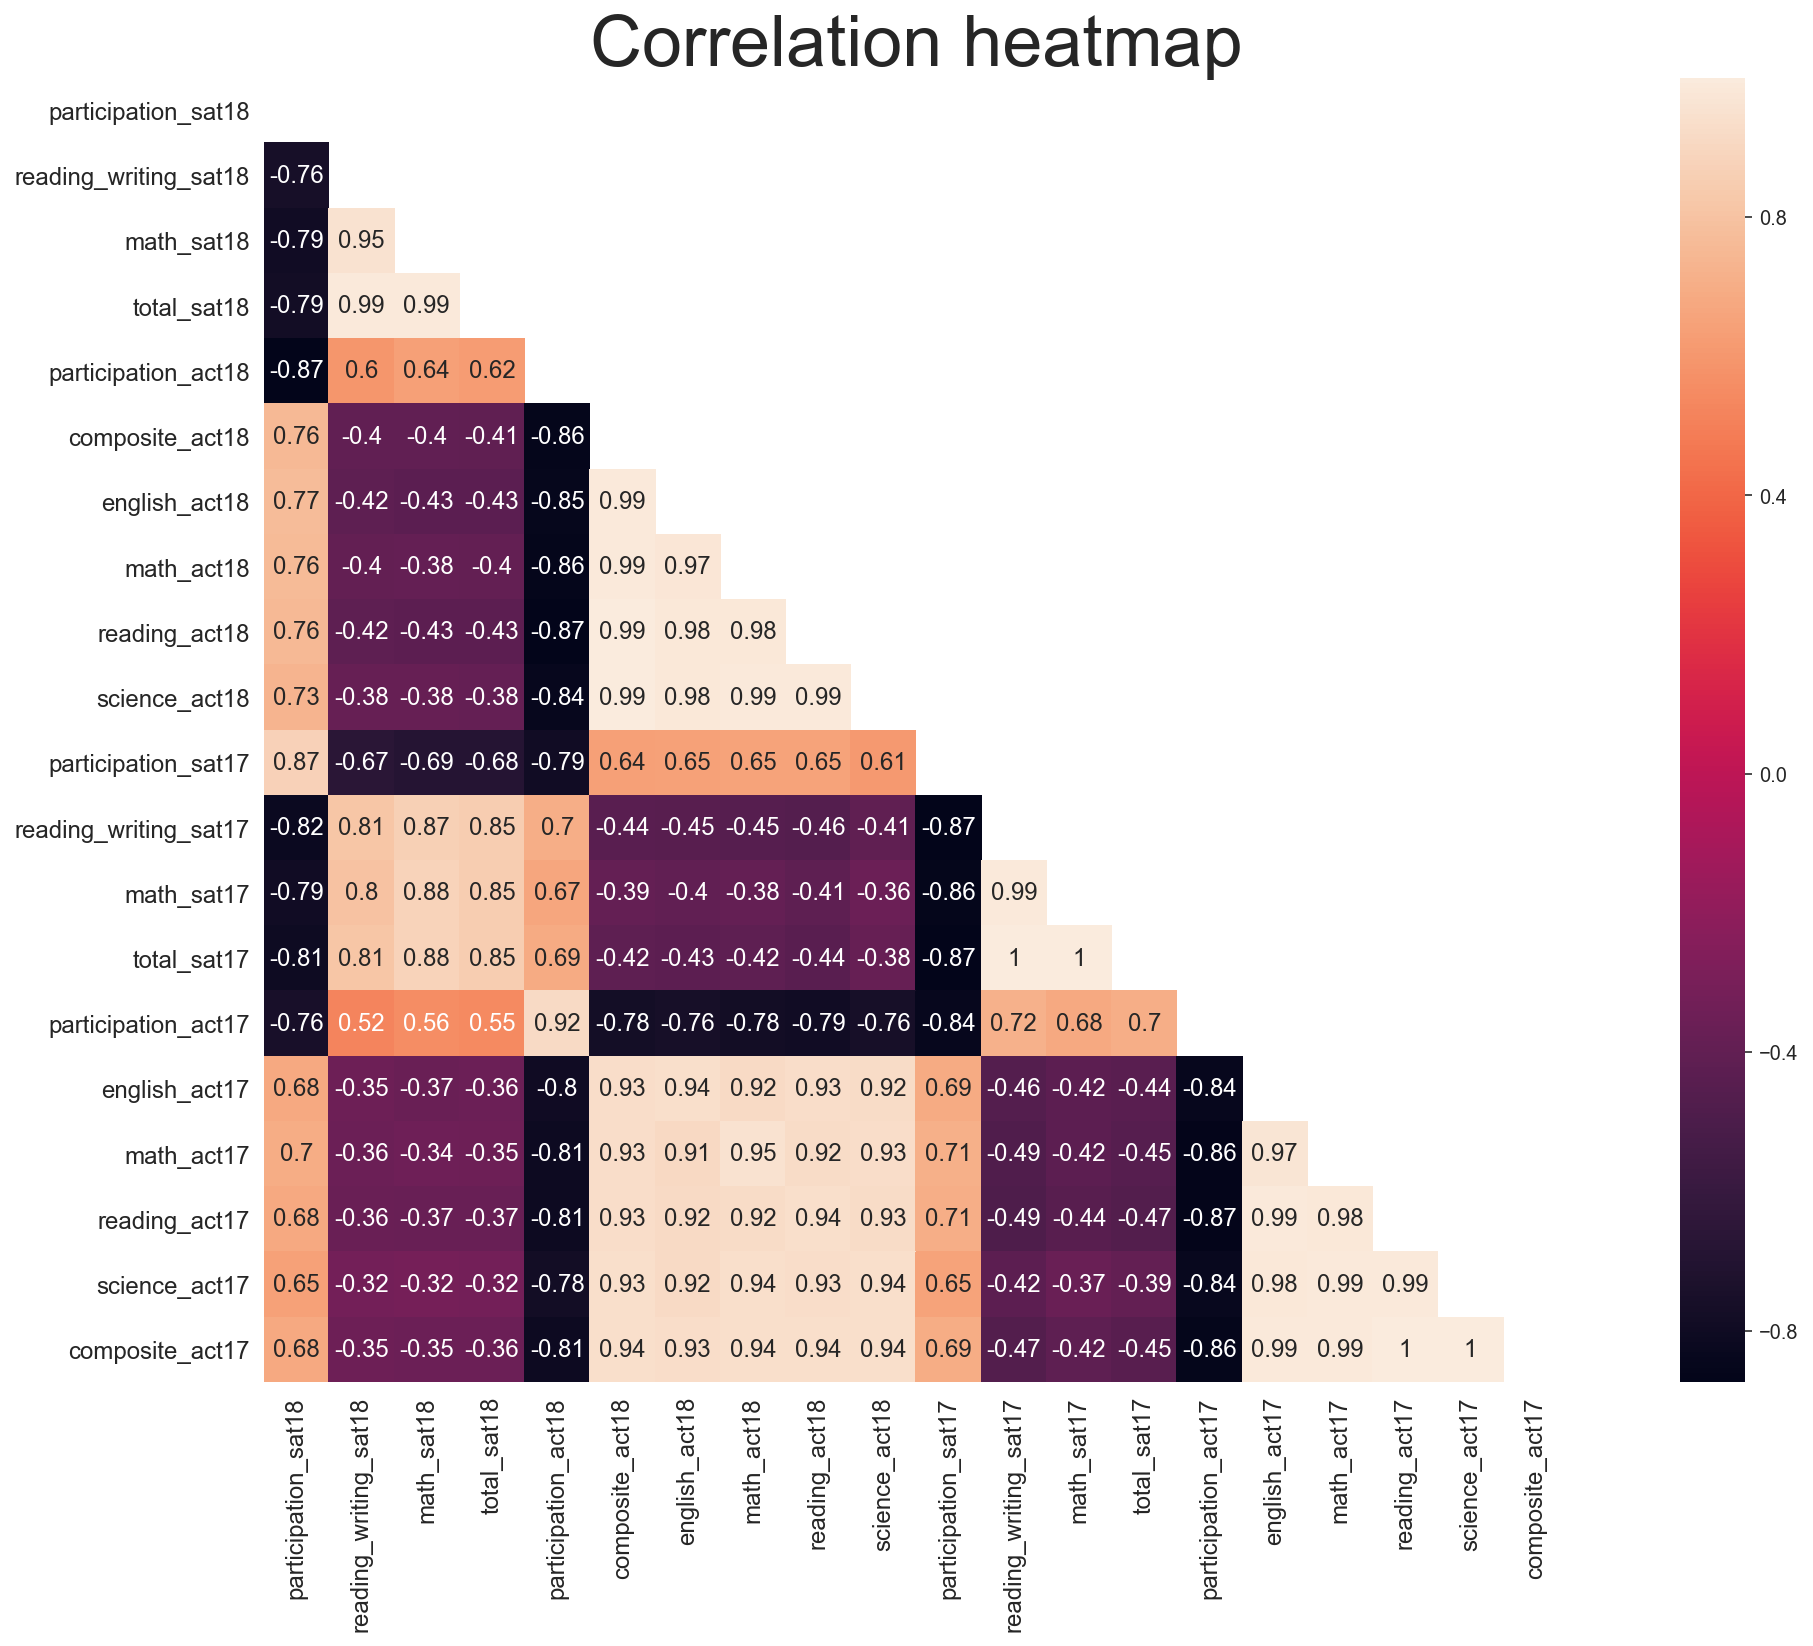

In [117]:
#Creating a correlation heatmap using seaborn
#Figure size
plt.figure(figsize=(20,12))

#Masking and return the indices for the upper-triangle of arr
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

#Plotting the heatmap
ax = sns.heatmap(final.corr(),square=True, annot=True,annot_kws={'size':12}, mask=mask)

#Setting x and y labelsizes
ax.tick_params(labelsize = 12)

#Setting Heatmap title
ax.set_title('Correlation heatmap', fontsize=36)

#Extra code needed as top and bottom rows get cut off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Correlation heatmap findings

#### Strong inverse correlation between participation and total/ composite score
Participation rates and scores are inversely correlated, the higher the participation rate the lower the overall score for the test. For instance, the correlation between SAT participation and SAT Total score was -0.87 in 2017 and -0.79 in 2018. This is also the case for the correlation of ACT participation and scores, having -0.86 in both 2017 and 2018.


#### Strong inverse correlation between SAT and ACT participation
States that have a high participation rate in one test tend to have low participation rates in the other. SAT and ACT participation correlations are -0.84 in 2017 and -0.87 in 2018


#### Strong year on year participation
Another observation is that states that have taken the SAT or ACT in 2017 tend to have a very high likelihood of taking the same test the following year. Correlation for SAT 2017 and SAT 2018 participation rates are at 0.87 while ACT 2017 and ACT 2018 are at 0.92.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [118]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,14), sharey=True) 
    plt.subplots_adjust(hspace=0.4)
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column], bins=10) 
    
    #Setting Title
    for i, title in enumerate(list_of_titles):
        ax[i].set_title(title,fontsize=24)
    
    #Setting xlabel
    for i, xlabel in enumerate(list_of_xlabels):
        ax[i].set_xlabel(xlabel,fontsize=16)
   
    #Setting ylabel
    for i in range(0,len(list_of_columns)):
        ax[i].set_ylabel(list_of_ylabels,fontsize=16)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation rates for SAT & ACT

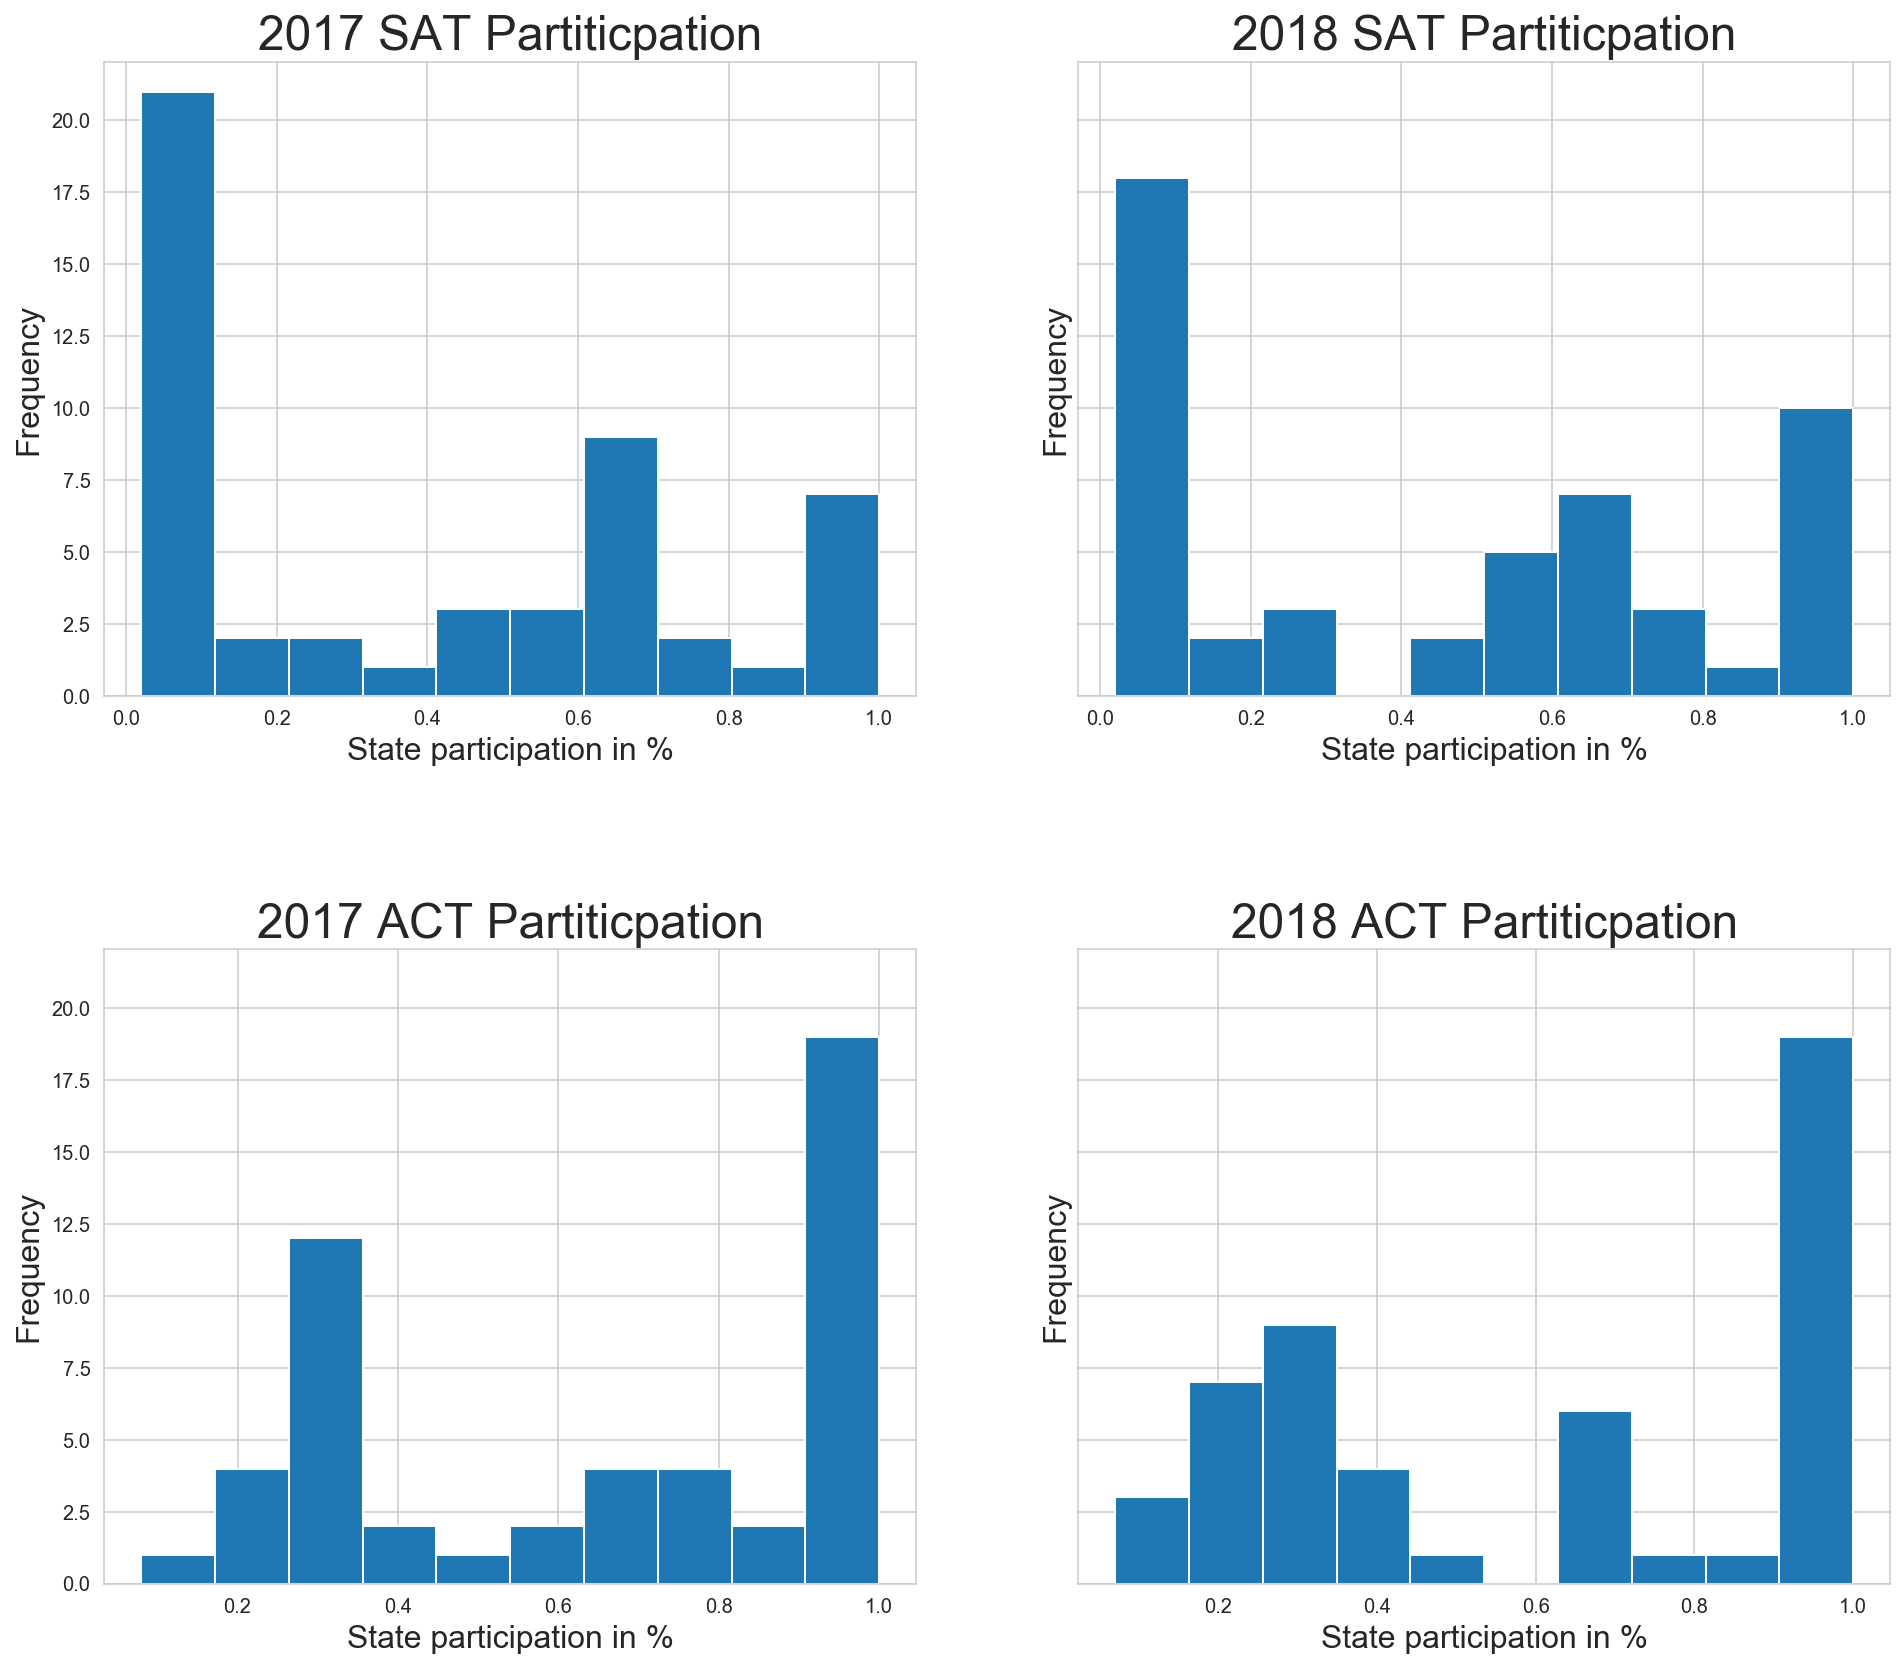

In [119]:
#Plotting historgrams of SAT and ACT participation rates for 2017 and 2018
subplot_histograms(final,
                   ['participation_sat17', 'participation_sat18',
                    'participation_act17','participation_act18'],
                   ['2017 SAT Partiticpation', '2018 SAT Partiticpation',
                    '2017 ACT Partiticpation','2018 ACT Partiticpation'],
                   ['State participation in %','State participation in %',
                    'State participation in %','State participation in %'],
                   'Frequency')

### SAT and ACT Participation rates observation
Participation rates are bimodal, with states having extreme ends of participation either high or low. Very little states show an above participation rate of 50% for both tests.

Interestingly, the histrogram distribution does show that more states have a participation rate of 100% for 2018 ACT than 2018 SAT (19 counts vs 10 counts). However the good news is that participation rates for SAT are more positive on the extreme ends. There are less states that have 0% participation (21counts vs 18counts) and more states that have 100% participation rates (7 counts vs 10 counts).

### Math scores for SAT & ACT

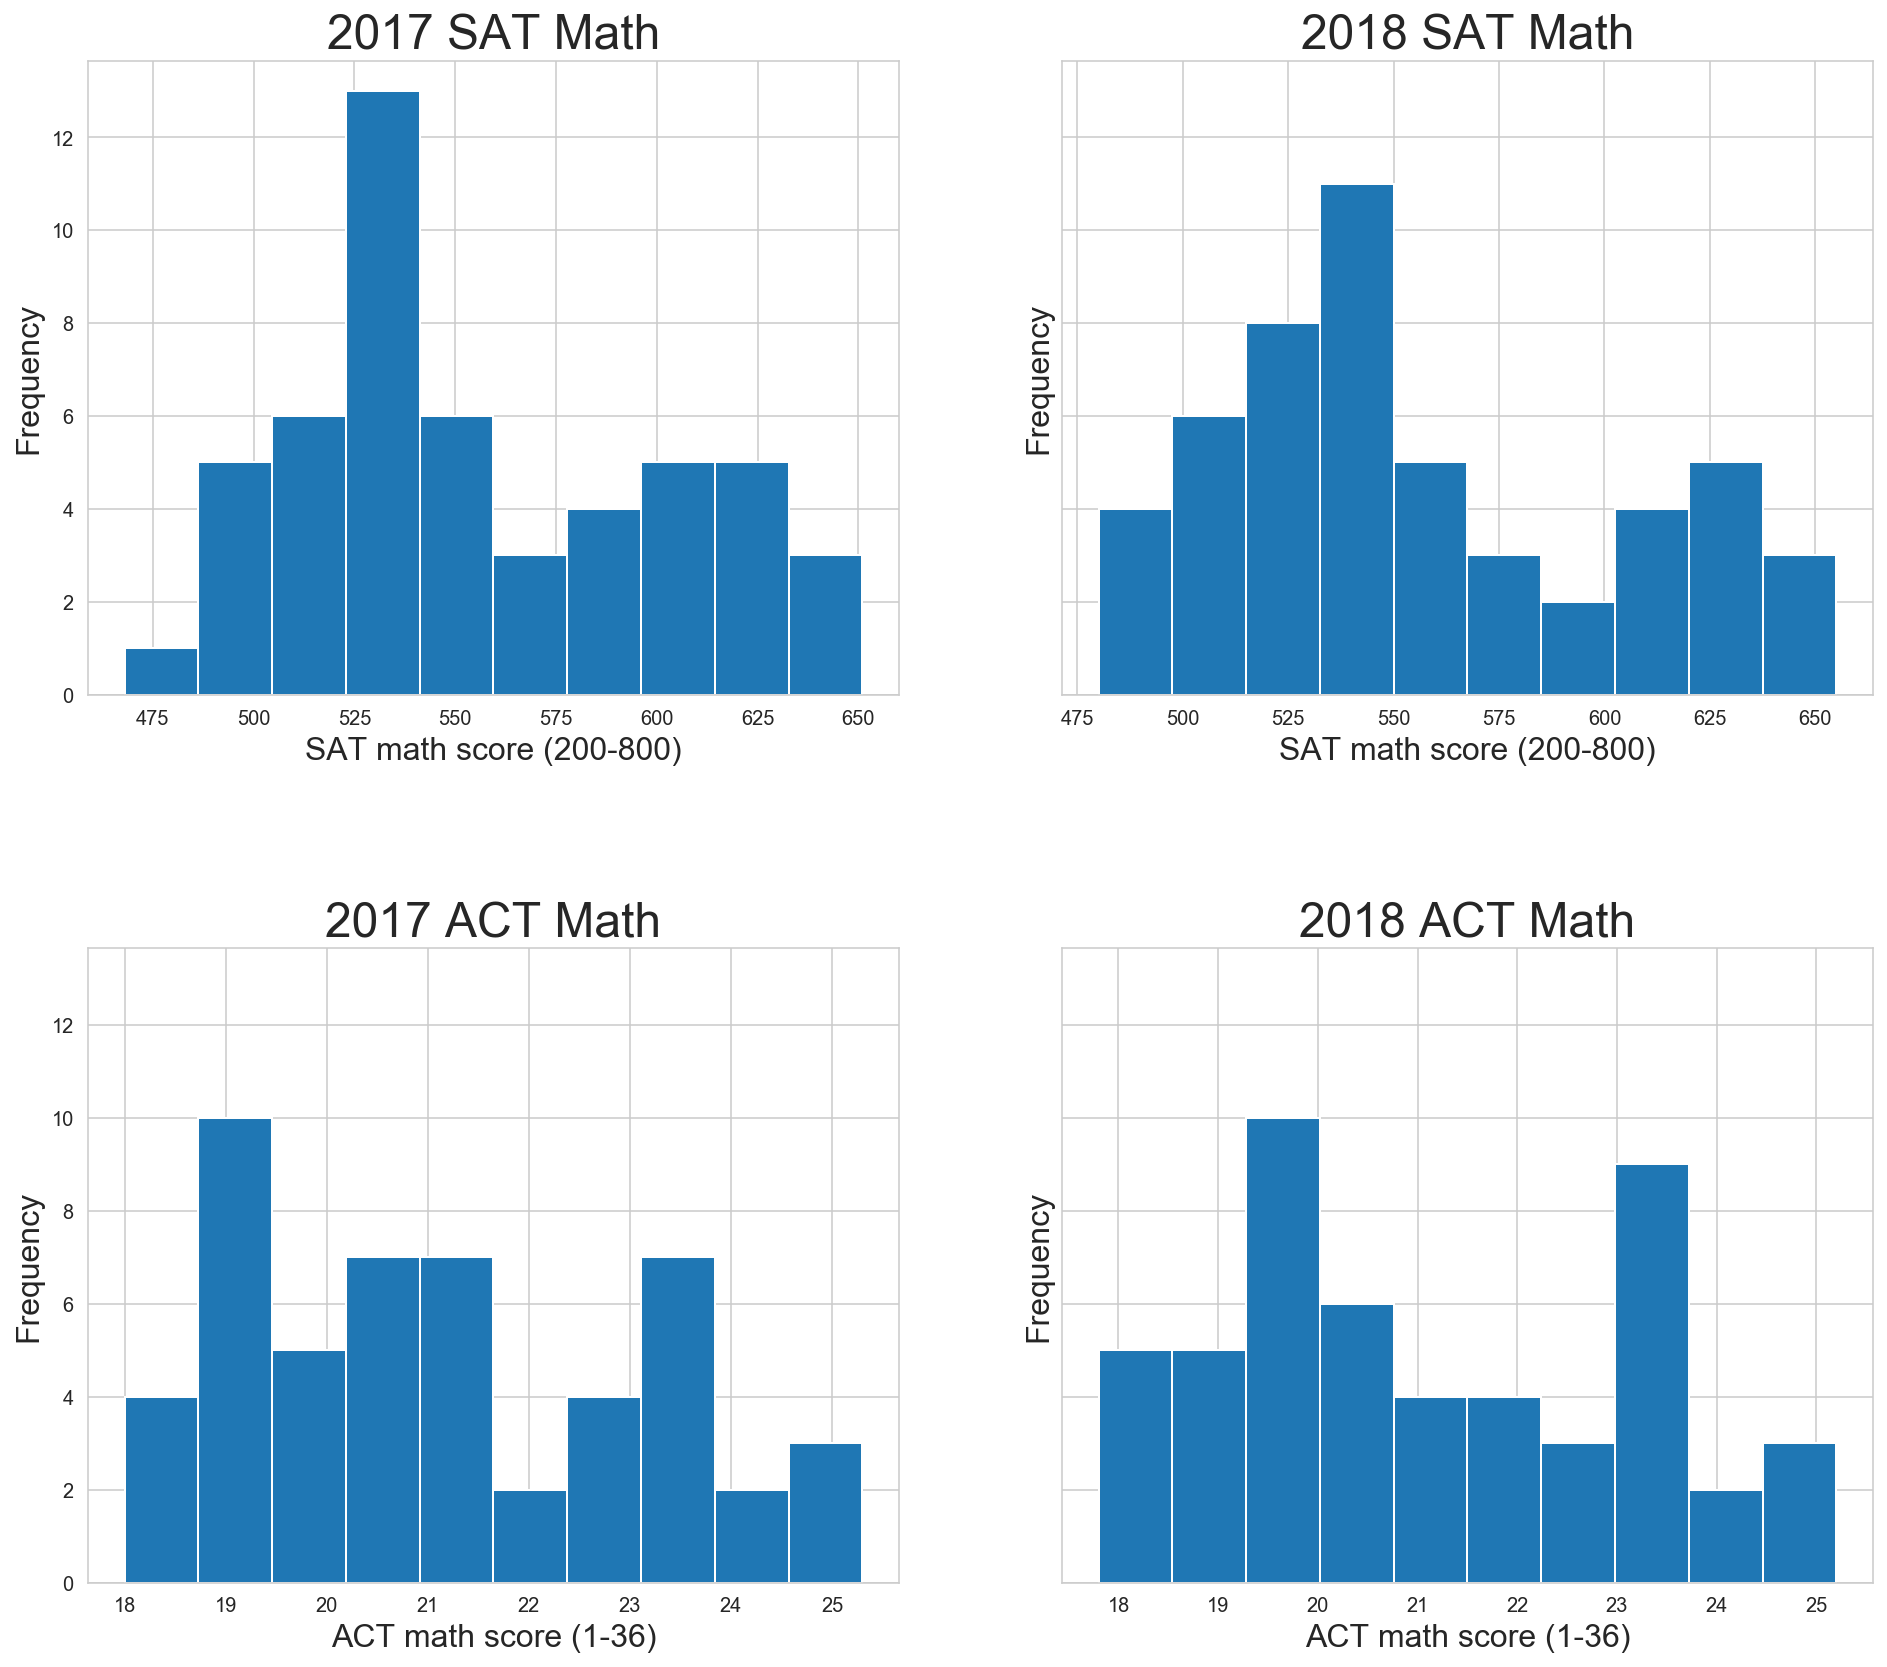

In [120]:
#Plotting historgrams of SAT and ACT Math scores for 2017 and 2018
subplot_histograms(final,['math_sat17', 'math_sat18','math_act17','math_act18'],
                   ['2017 SAT Math', '2018 SAT Math','2017 ACT Math','2018 ACT Math'],
                   ['SAT math score (200-800)','SAT math score (200-800)',
                    'ACT math score (1-36)','ACT math score (1-36)'],
                   'Frequency')

### SAT and ACT Math scores
SAT Math score follows a bimodal distribution with consistent peaks around 530-540 and 625 for both 2017 and 2018.
Similarly, ACT math scores in 2018 follow a bimodal distribution with peaks around 20 and 23. 2017 ACT Math score is somewhat similar but with only a single peak at 19. 



### Reading/verbal scores for SAT & ACT

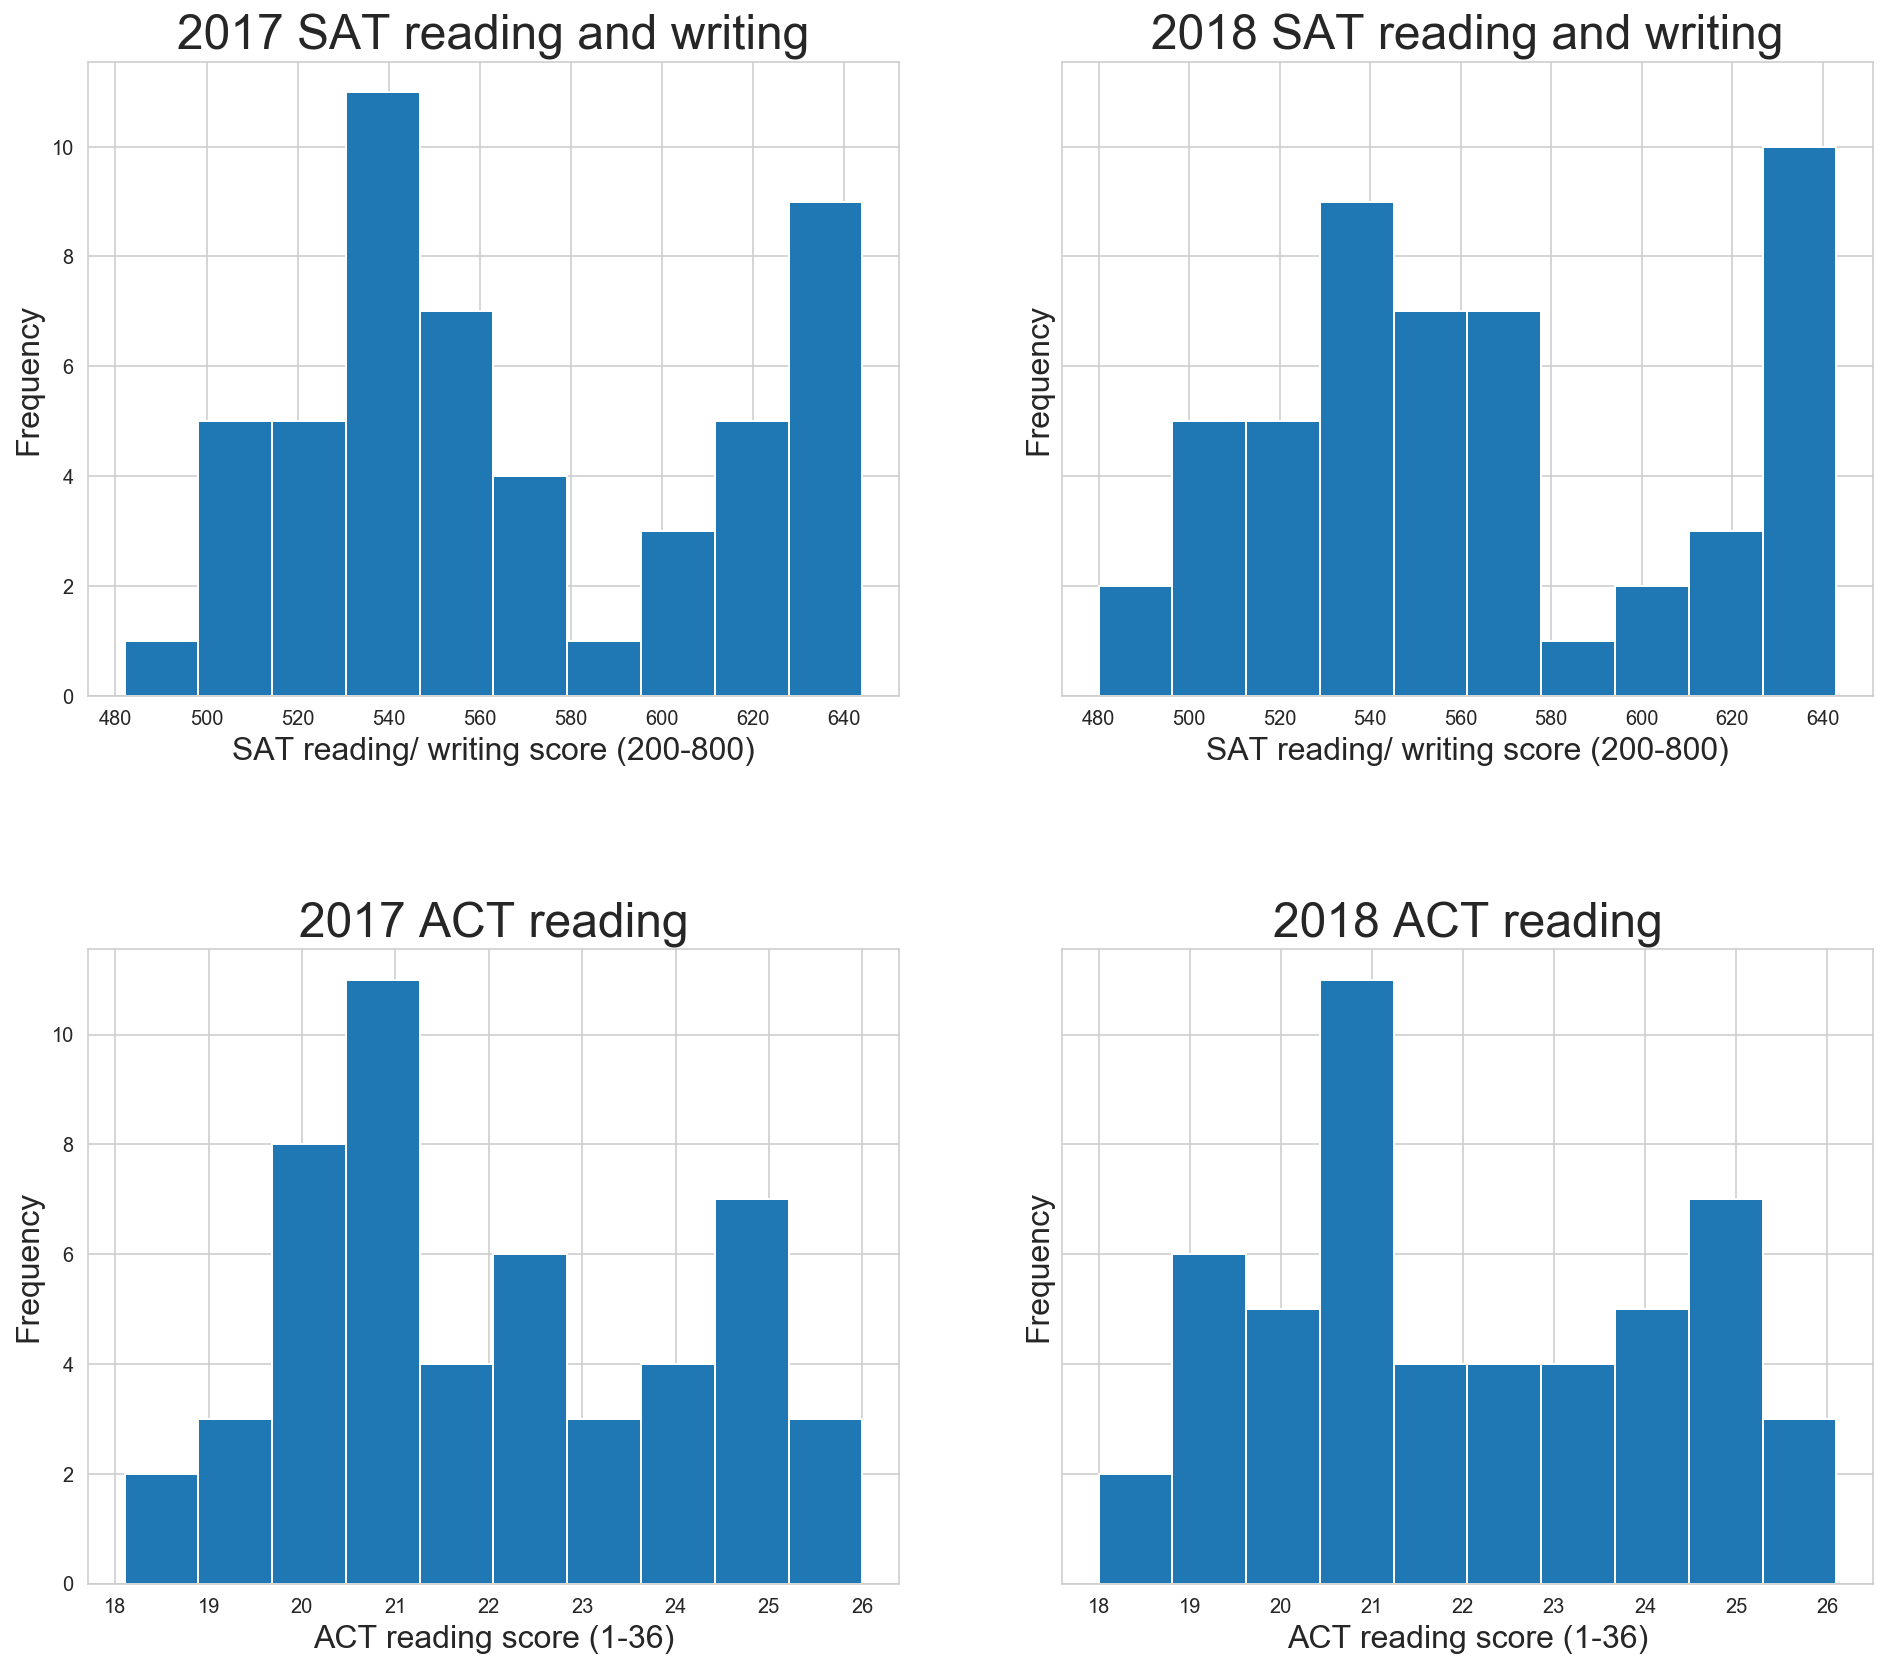

In [121]:
subplot_histograms(final,
                   ['reading_writing_sat17', 'reading_writing_sat18',
                    'reading_act17','reading_act18'],
                   ['2017 SAT reading and writing', '2018 SAT reading and writing',
                    '2017 ACT reading','2018 ACT reading'],
                   ['SAT reading/ writing score (200-800)','SAT reading/ writing score (200-800)',
                    'ACT reading score (1-36)','ACT reading score (1-36)'],
                   'Frequency')

### Reading/ verbal scores for SAT and ACT

Quite similar distriubtion on reading among SAT and ACT results, both have a bimodal distribution with 2 distinct peaks at (540 and 640) for SATs and (21 and 25) for ACTs in 2017 and 2018 respectively

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [122]:
# Creating a function that will help plot scatter charts with a regression line
def seaborn_scatter(dataframe, xaxis, yaxis, title, xlabel, ylabel):
    
    #using lmpot a scatter plot is created
    sns.lmplot(data=dataframe, x=xaxis, y=yaxis, height=9,aspect=1.45)
    
    #Setting the chart title
    plt.title(title, fontsize=24)
    
    #Setting both the chart x and y axis labels
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)

### SAT vs. ACT math scores for 2017

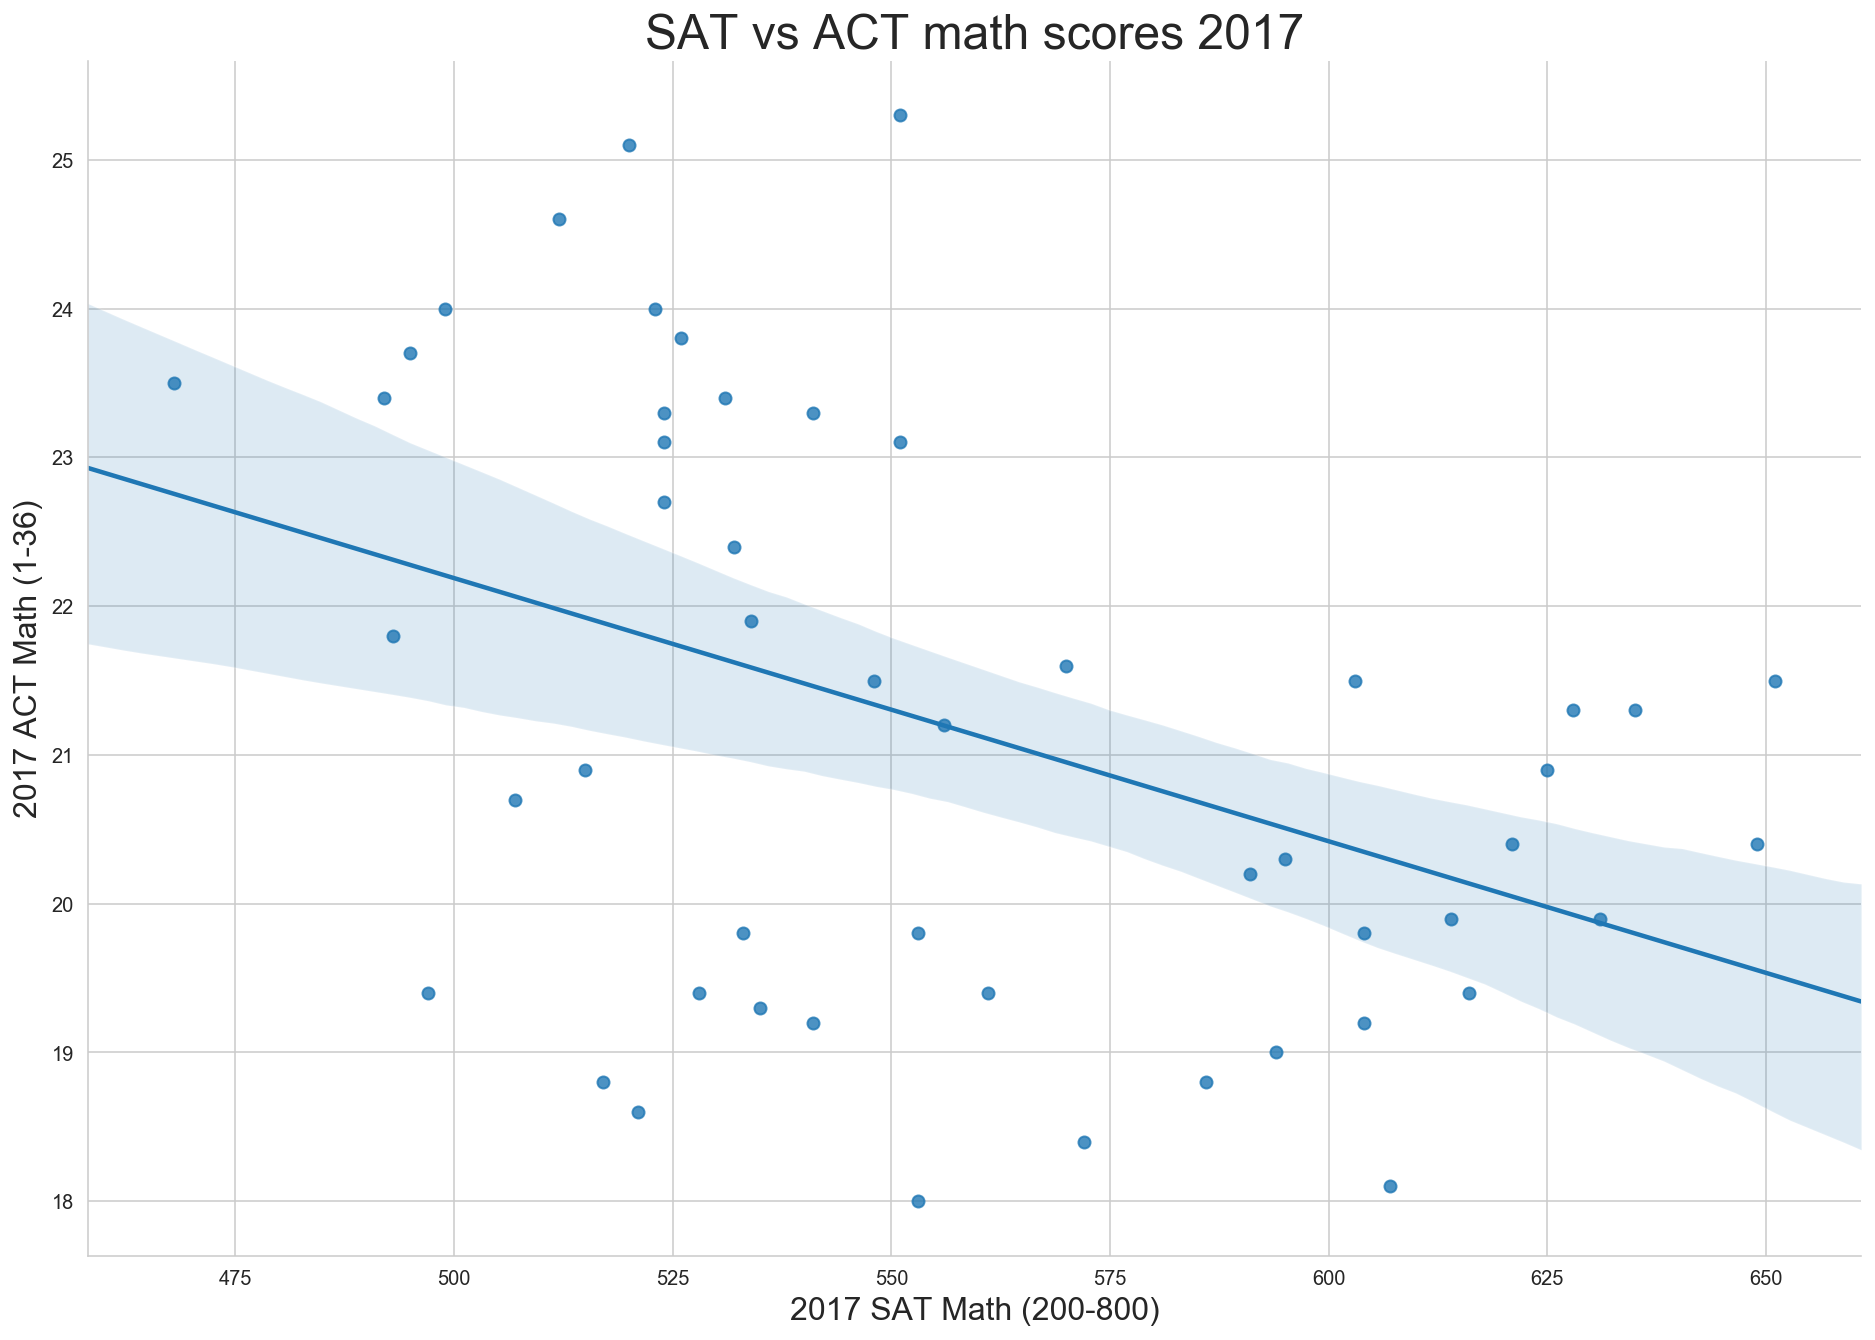

In [123]:
#Plotting SAT vs ACT math scores for 2017
seaborn_scatter(dataframe=final, xaxis='math_sat17', yaxis='math_act17',
                title = 'SAT vs ACT math scores 2017', 
                xlabel = '2017 SAT Math (200-800)', 
                ylabel = '2017 ACT Math (1-36)')

### SAT vs. ACT verbal/ reading scores for 2017

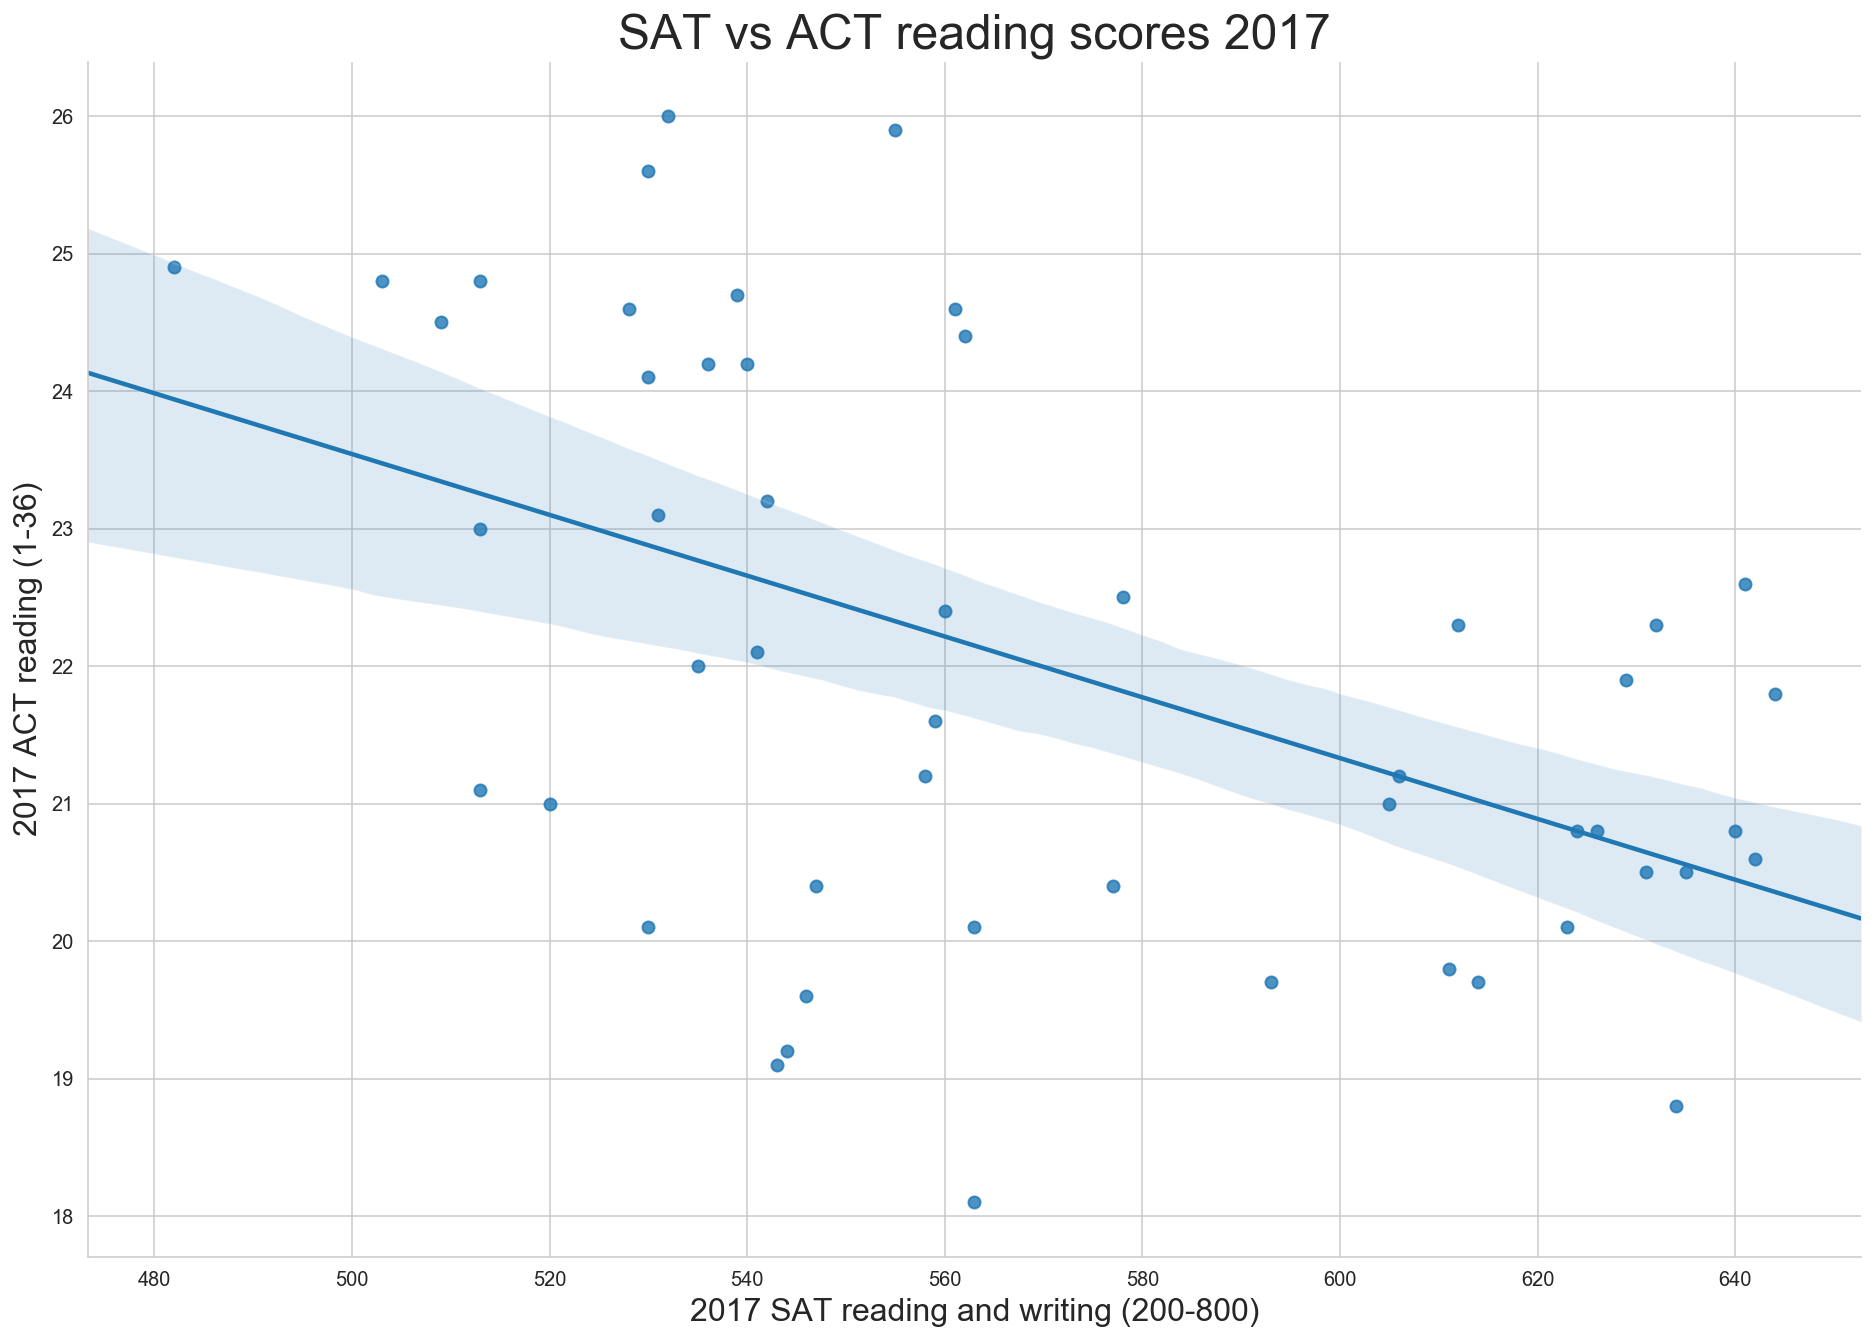

In [124]:
#Plotting SAT vs ACT verbal/ reading scores for 2017
seaborn_scatter(dataframe=final, xaxis='reading_writing_sat17', yaxis='reading_act17',
                title = 'SAT vs ACT reading scores 2017', 
                xlabel = '2017 SAT reading and writing (200-800)', 
                ylabel = '2017 ACT reading (1-36)')

### SAT vs. ACT total/ composite scores for 2017

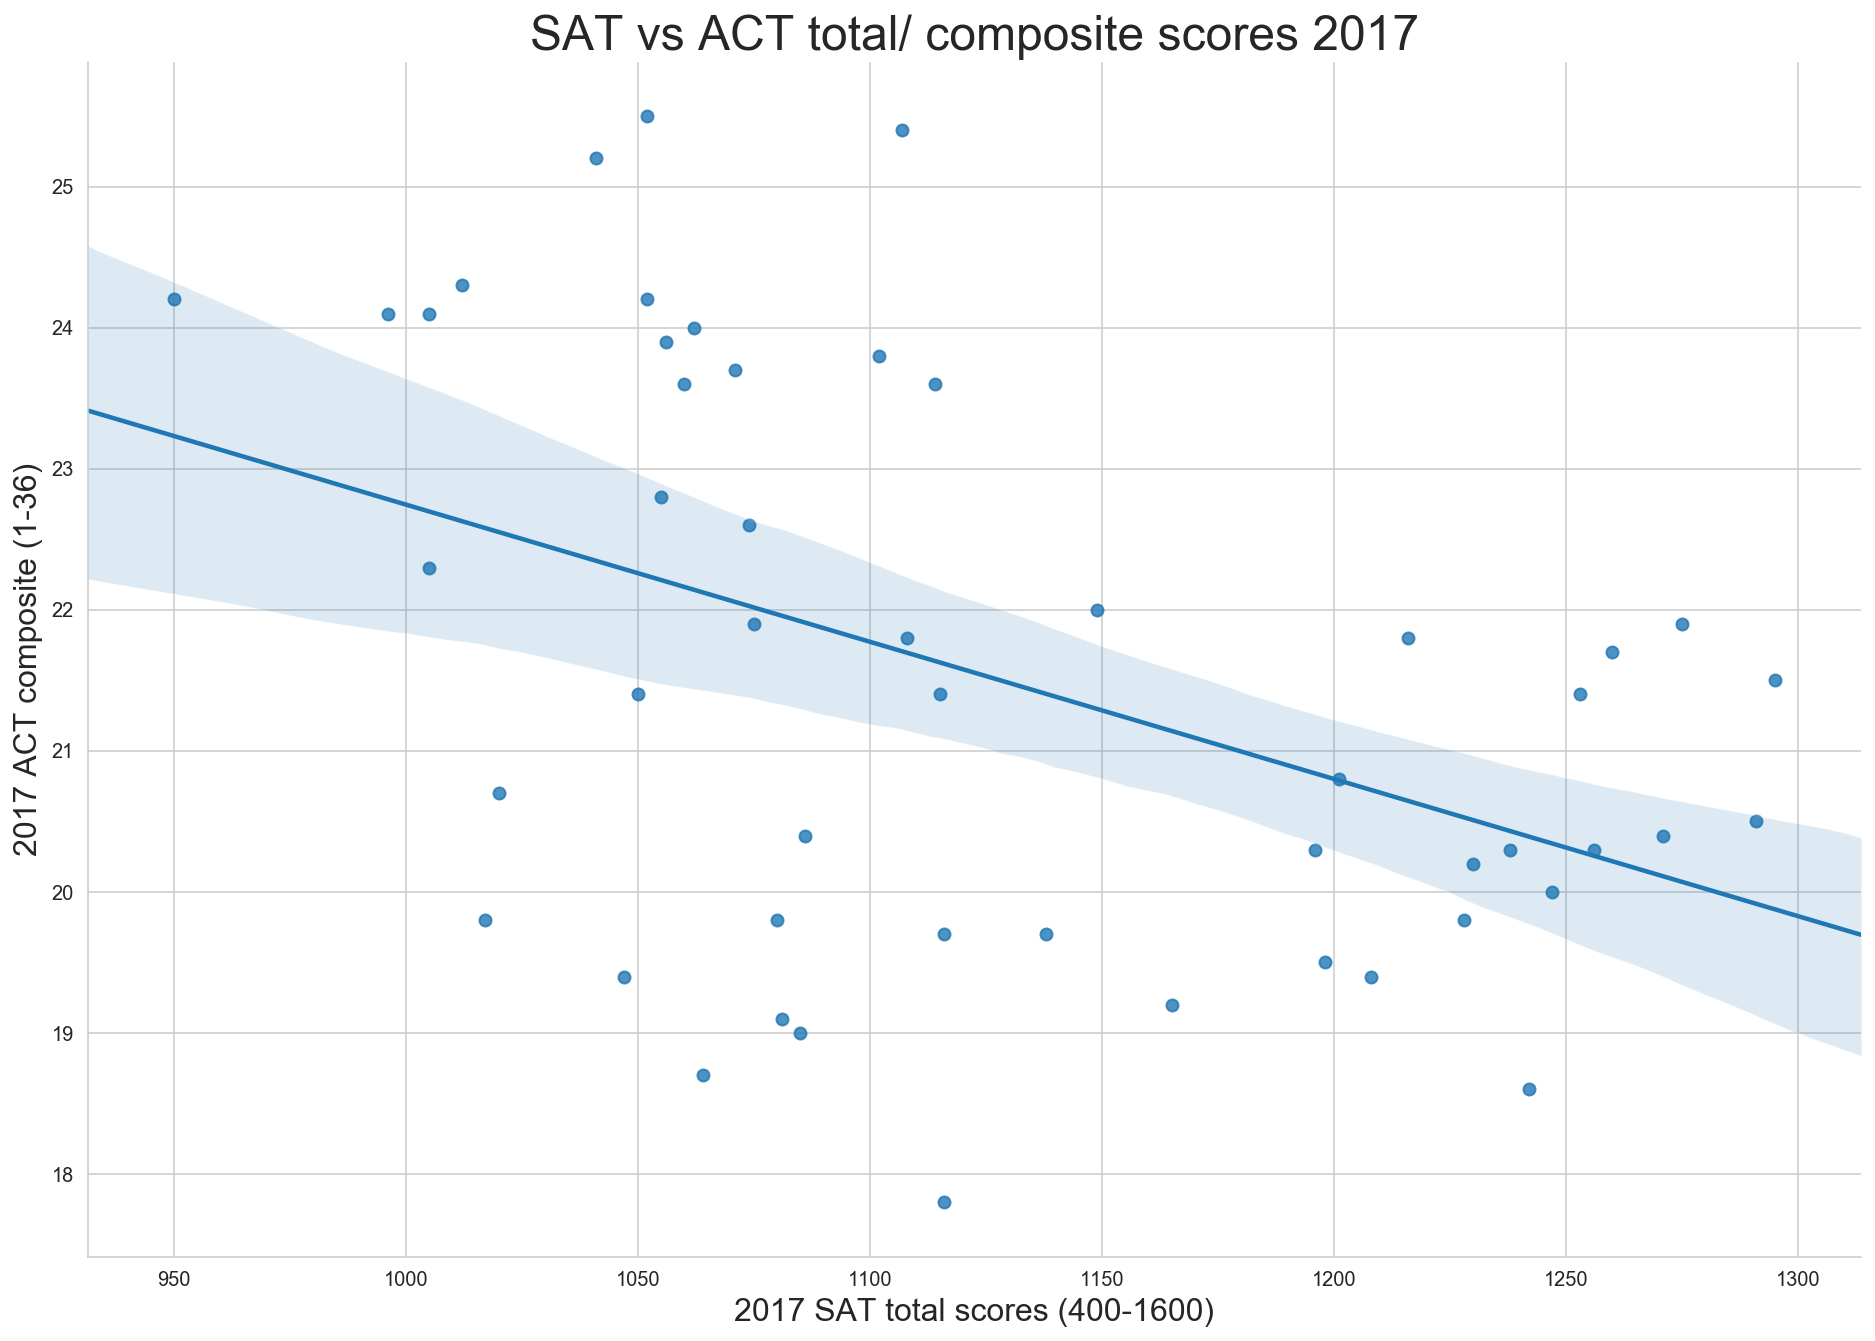

In [125]:
#Plotting SAT vs ACT total/ composite scores for 2017
seaborn_scatter(dataframe=final, xaxis='total_sat17', yaxis='composite_act17',
                title = 'SAT vs ACT total/ composite scores 2017', 
                xlabel = '2017 SAT total scores (400-1600)', 
                ylabel = '2017 ACT composite (1-36)')

### Scatter plot intepretation
There is an inverse correlation between SAT and ACT scores for math, verbal/ reading and total/ composite. This means that states which score higher on SAT metrics tend to score lower on ACT metrics and vice versa.

Whereas year-on-year test scores are positively correlated 

### Total scores for SAT 2017 vs. 2018

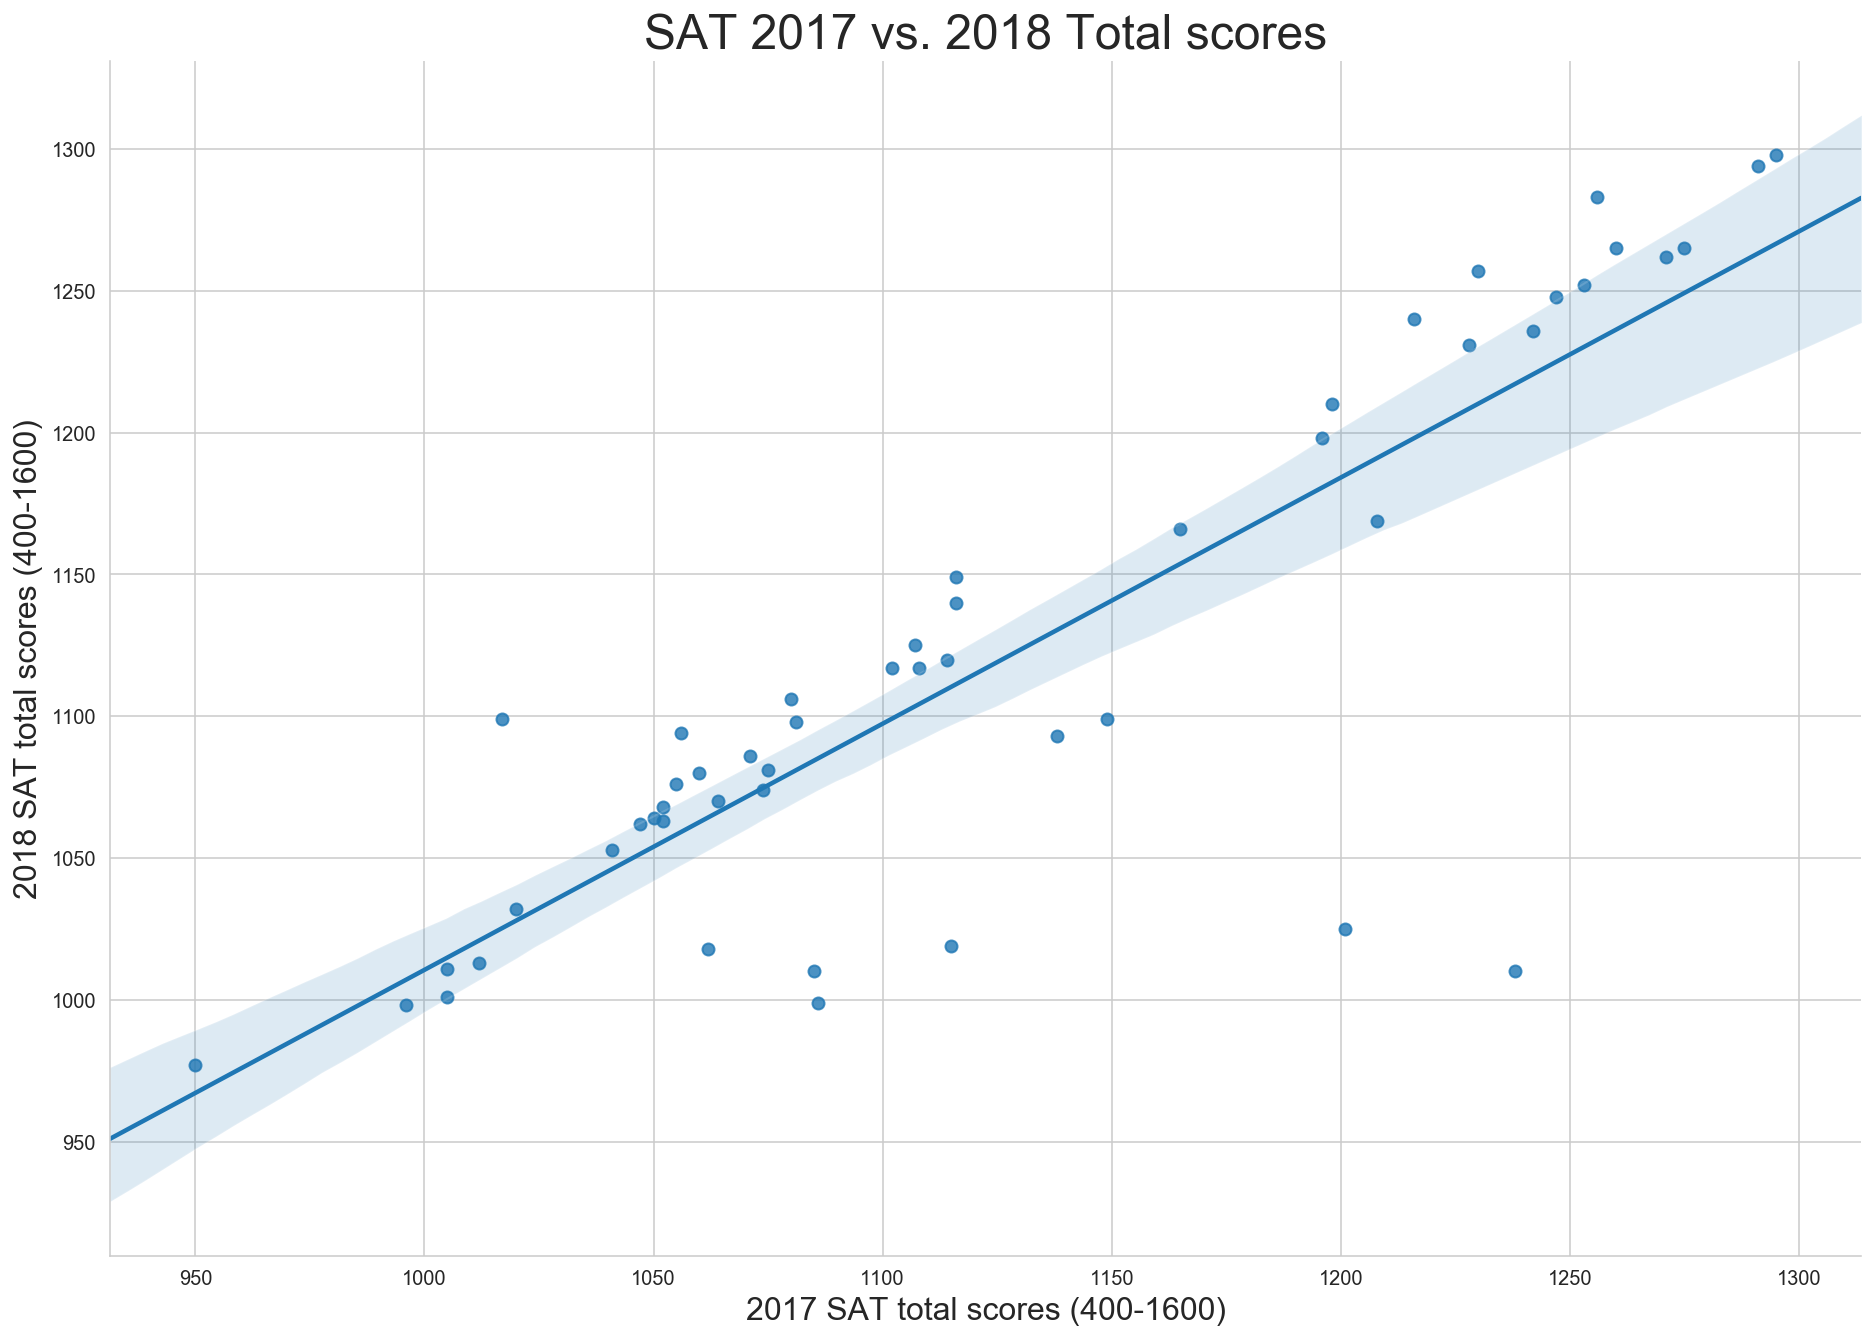

In [126]:
#Plotting SAT Total scores for 2017 vs 2018
seaborn_scatter(dataframe=final, xaxis='total_sat17', yaxis='total_sat18',
                title = 'SAT 2017 vs. 2018 Total scores', 
                xlabel = '2017 SAT total scores (400-1600)', 
                ylabel = '2018 SAT total scores (400-1600)')

### Outliers in SAT scores
Two points on the scatterplot stand out distinctly (1200,1100) and (1240,1020) approximately. These two states have declined drastically in mean score from 2017 to 2018. As we know that SAT scores and participation rates are heavily negatively correlated, the decline in score could possibly be attributed to an increase in participation rate. Further findings discussed in the Outside Research section



### Composite scores for ACT 2017 vs. 2018

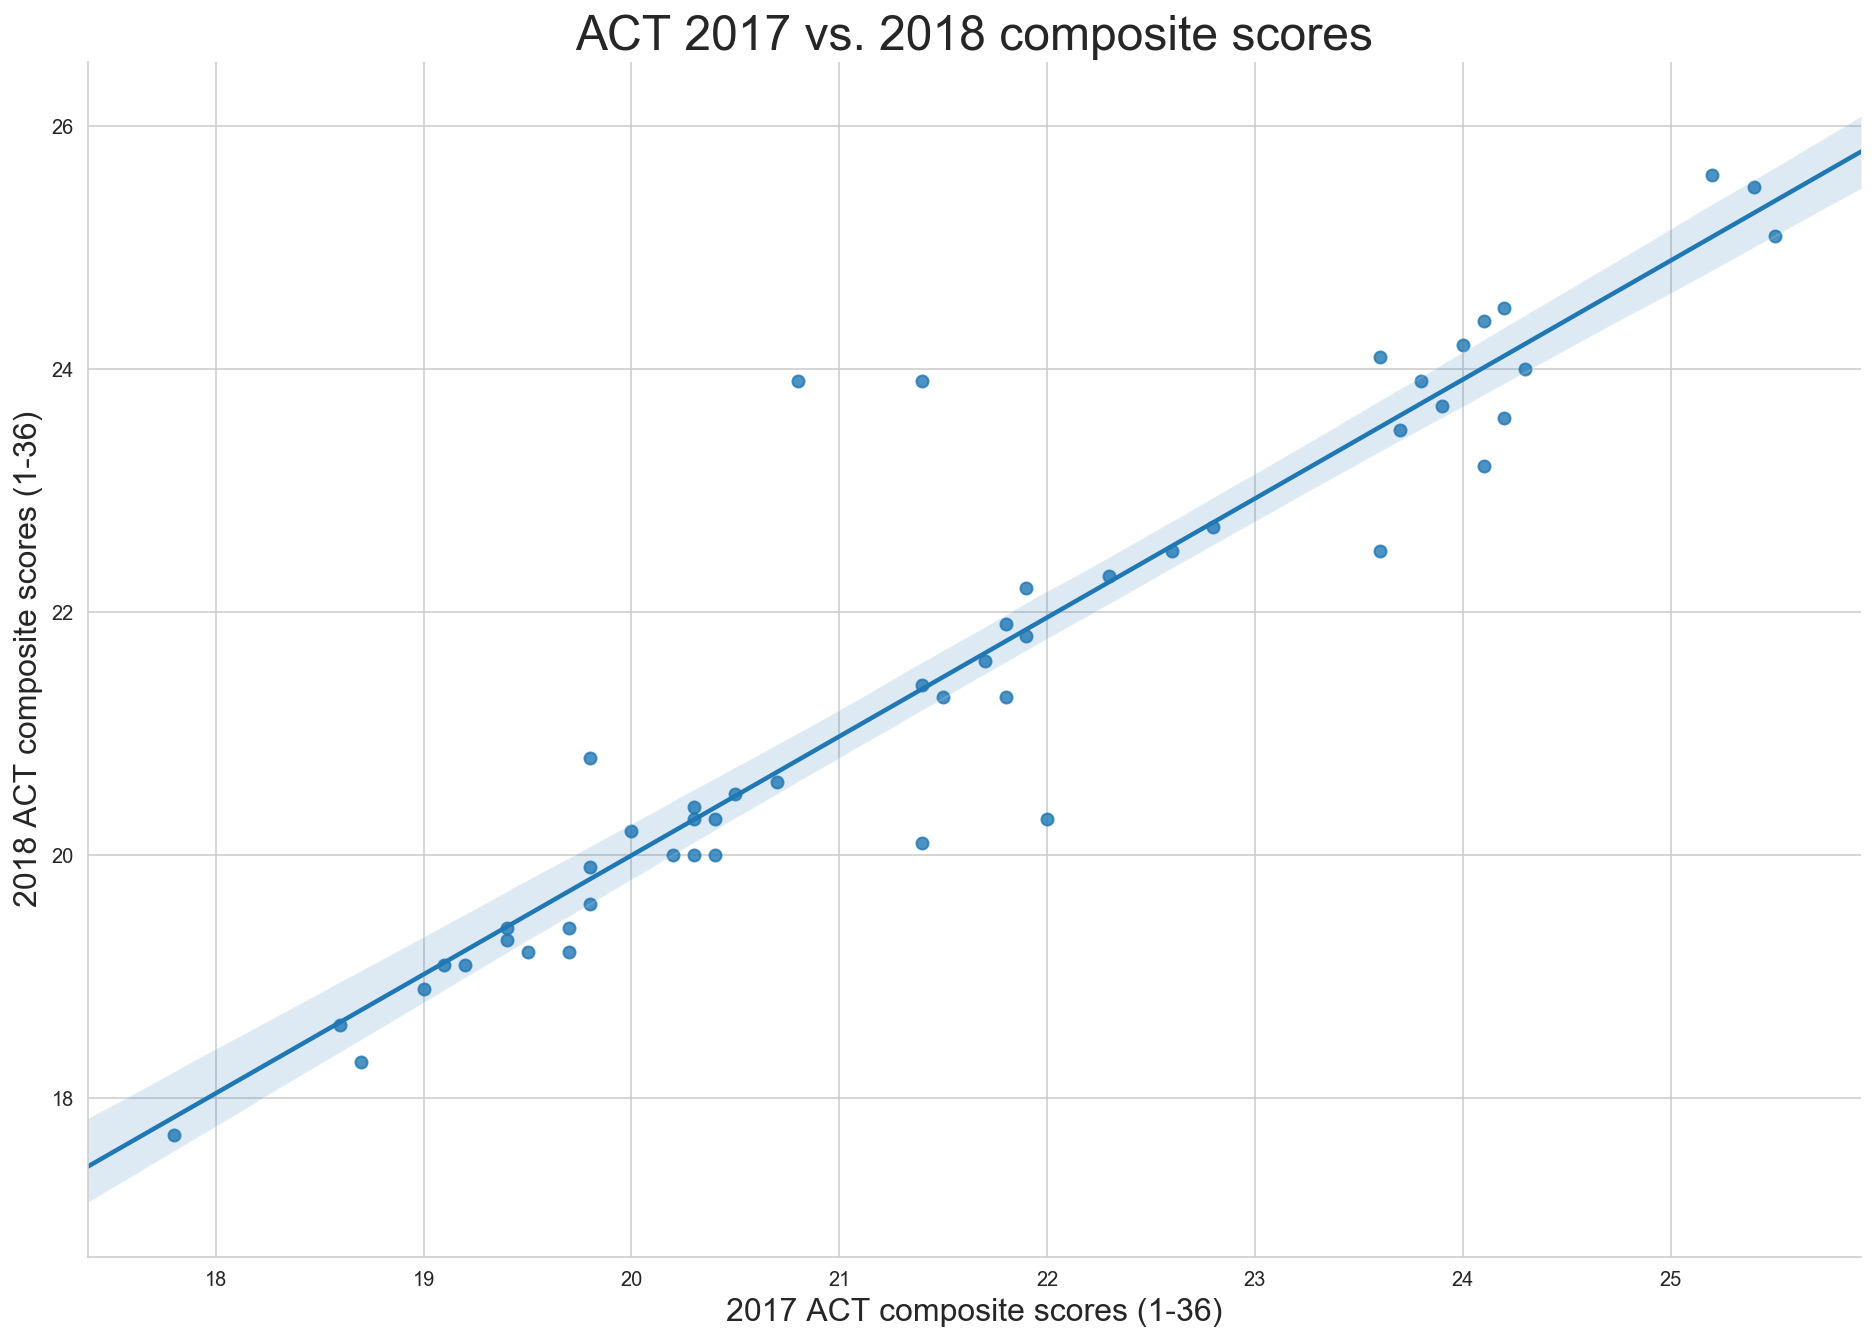

In [127]:
#Plotting ACT compsite scores for 2017 vs 2018
seaborn_scatter(dataframe=final, xaxis='composite_act17', yaxis='composite_act18',
                title = 'ACT 2017 vs. 2018 composite scores', 
                xlabel = '2017 ACT composite scores (1-36)', 
                ylabel = '2018 ACT composite scores (1-36)')

### Outliers in ACT scores
Similarly, two outliers appear in this ACT composite regression:
(20.9,23.9) and (21.4, 23.9) approximately. The increase in ACT score could be due to the decrease in participation rate of students taking the test as we know that there is a negative correlation between composite scores and participation rates. Further findings discussed in the Outside Research section

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

### Participation Rate

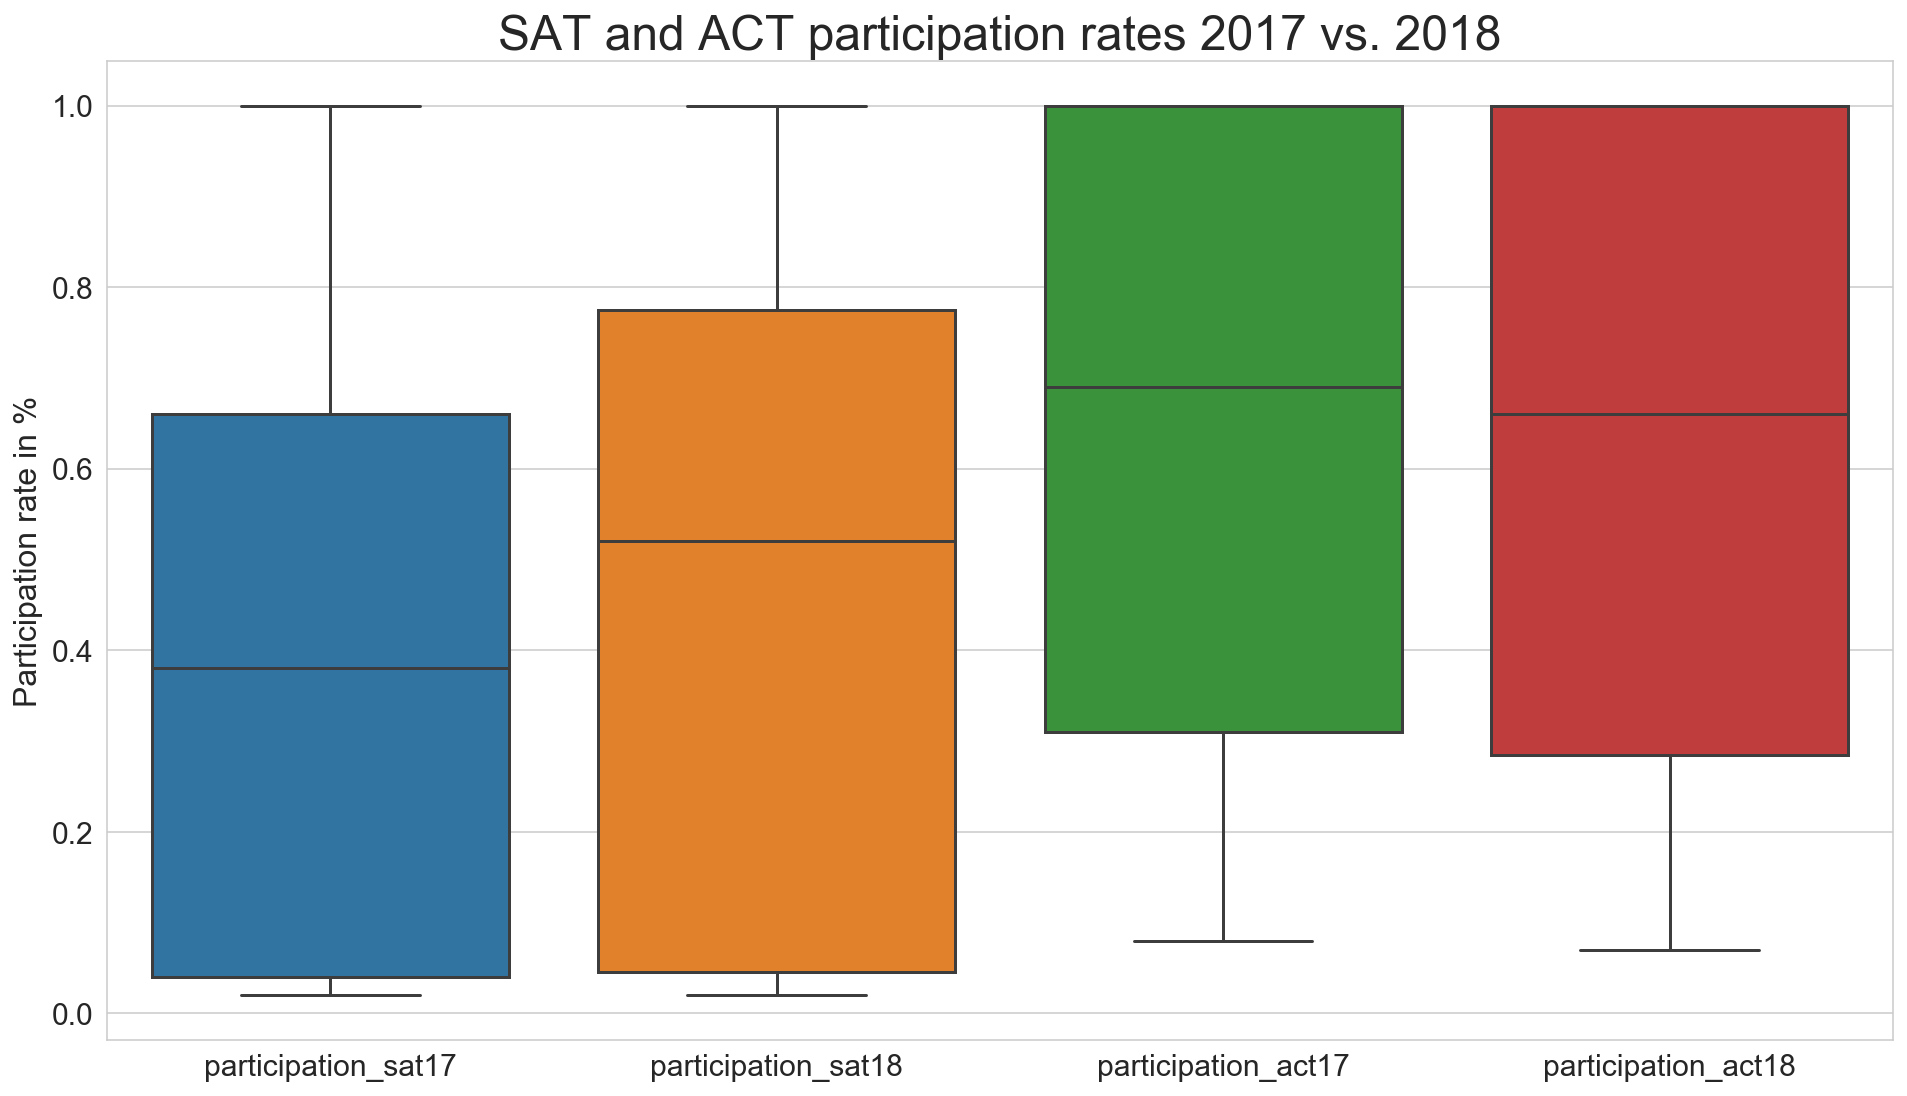

In [128]:
#Plotting SAT and ACT participation rates for 2017 and 2018
plt.figure(figsize=(16,9))

#Charting boxplot
sns.boxplot(data=final.loc[:,['participation_sat17','participation_sat18',
                              'participation_act17','participation_act18']]
           ).tick_params(labelsize = 15) #tick.params for xlabel size
#Setting the chart title
plt.title('SAT and ACT participation rates 2017 vs. 2018', fontsize=24)

#Setting ylabel
plt.ylabel('Participation rate in %',fontsize=16);

### Participation Rate
Participation rate for ACT has a higher median than the SAT for both years. However, there is an increase in the median SAT participation rate from 2017 to 2018 (38% to 52%)

### SAT Total score

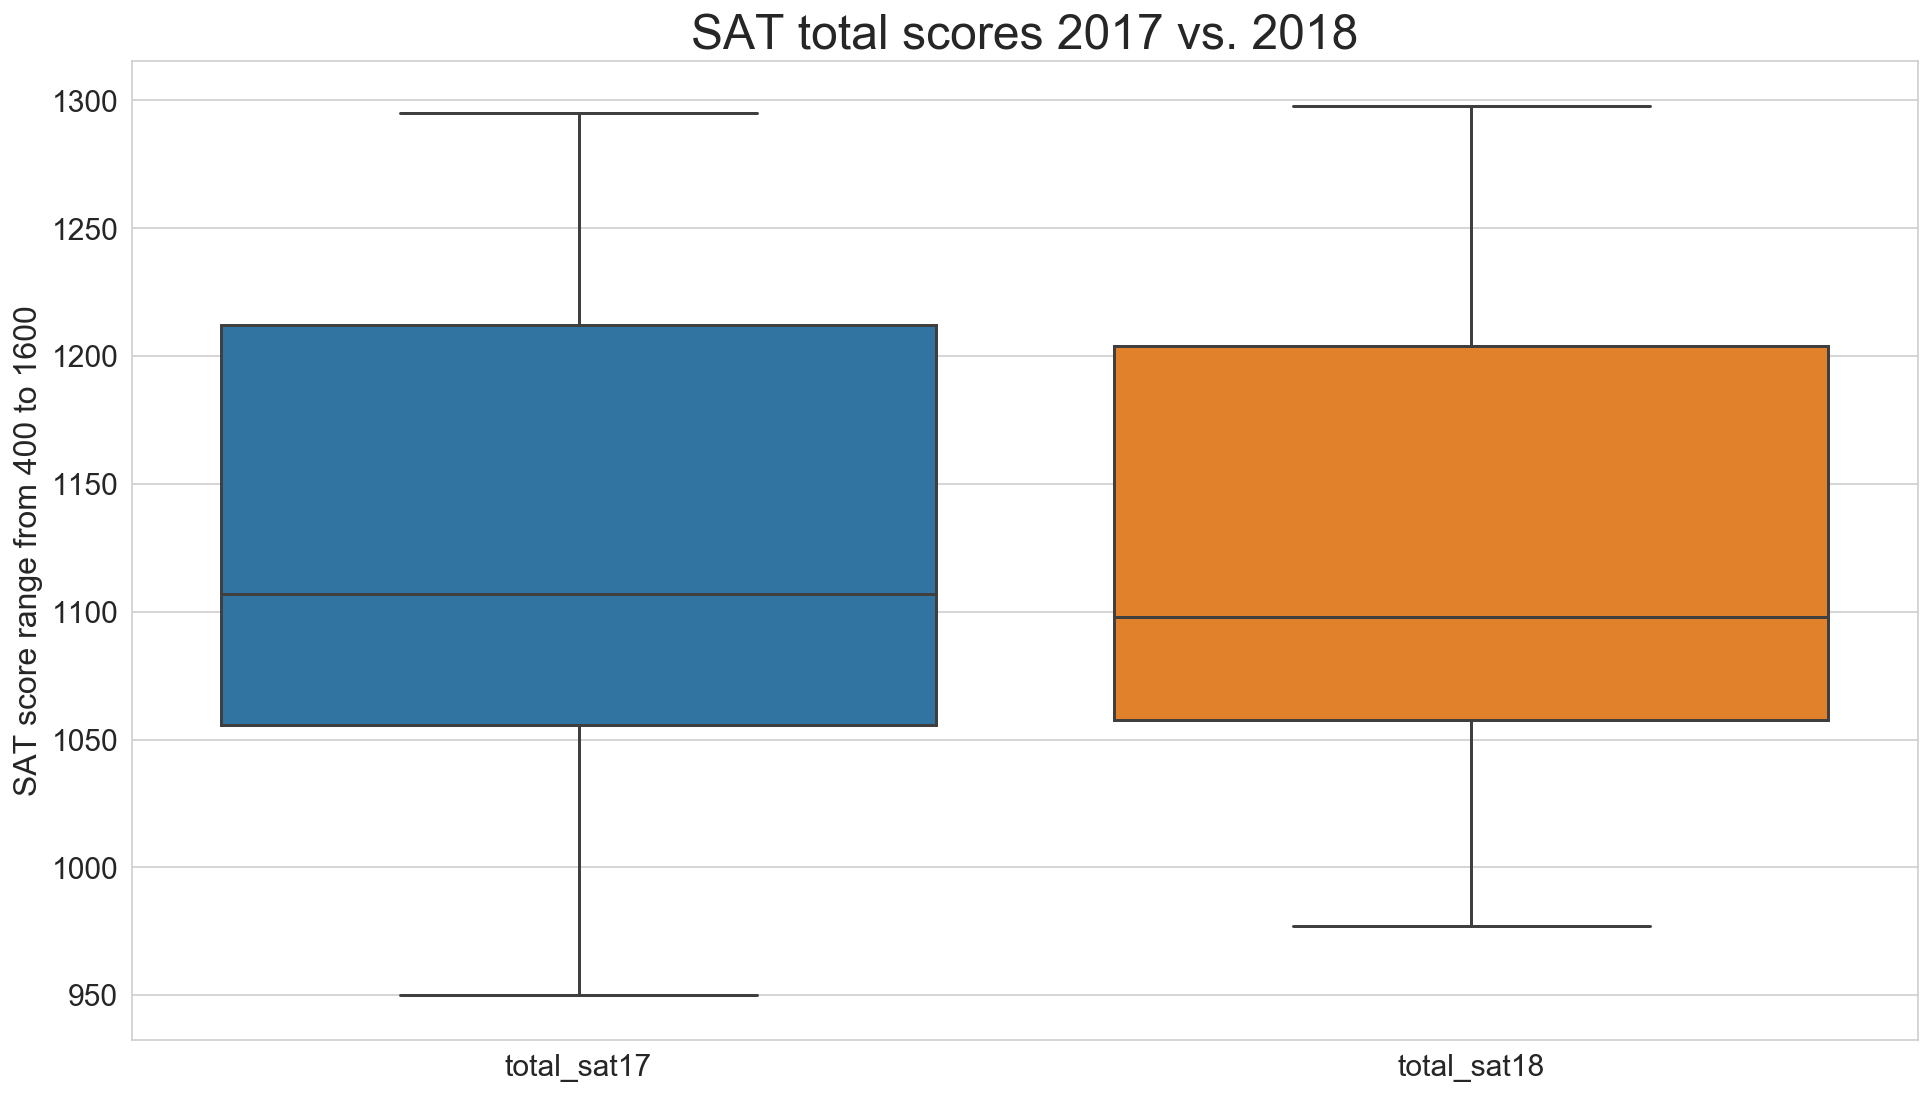

In [129]:
#Plotting SAT total scores for 2017 and 2018
plt.figure(figsize=(16,9))

#Charting boxplot
sns.boxplot(data=final.loc[:,['total_sat17','total_sat18']]
           ).tick_params(labelsize = 15) #tick.params for xlabel size

#Setting the chart title
plt.title('SAT total scores 2017 vs. 2018', fontsize=24)

#Setting ylabel
plt.ylabel('SAT score range from 400 to 1600',fontsize=16);

### SAT Total score
Besides the lower median score in 2018, the lower and upper whisker experience a shift upwards.

### SAT Attribute Scores

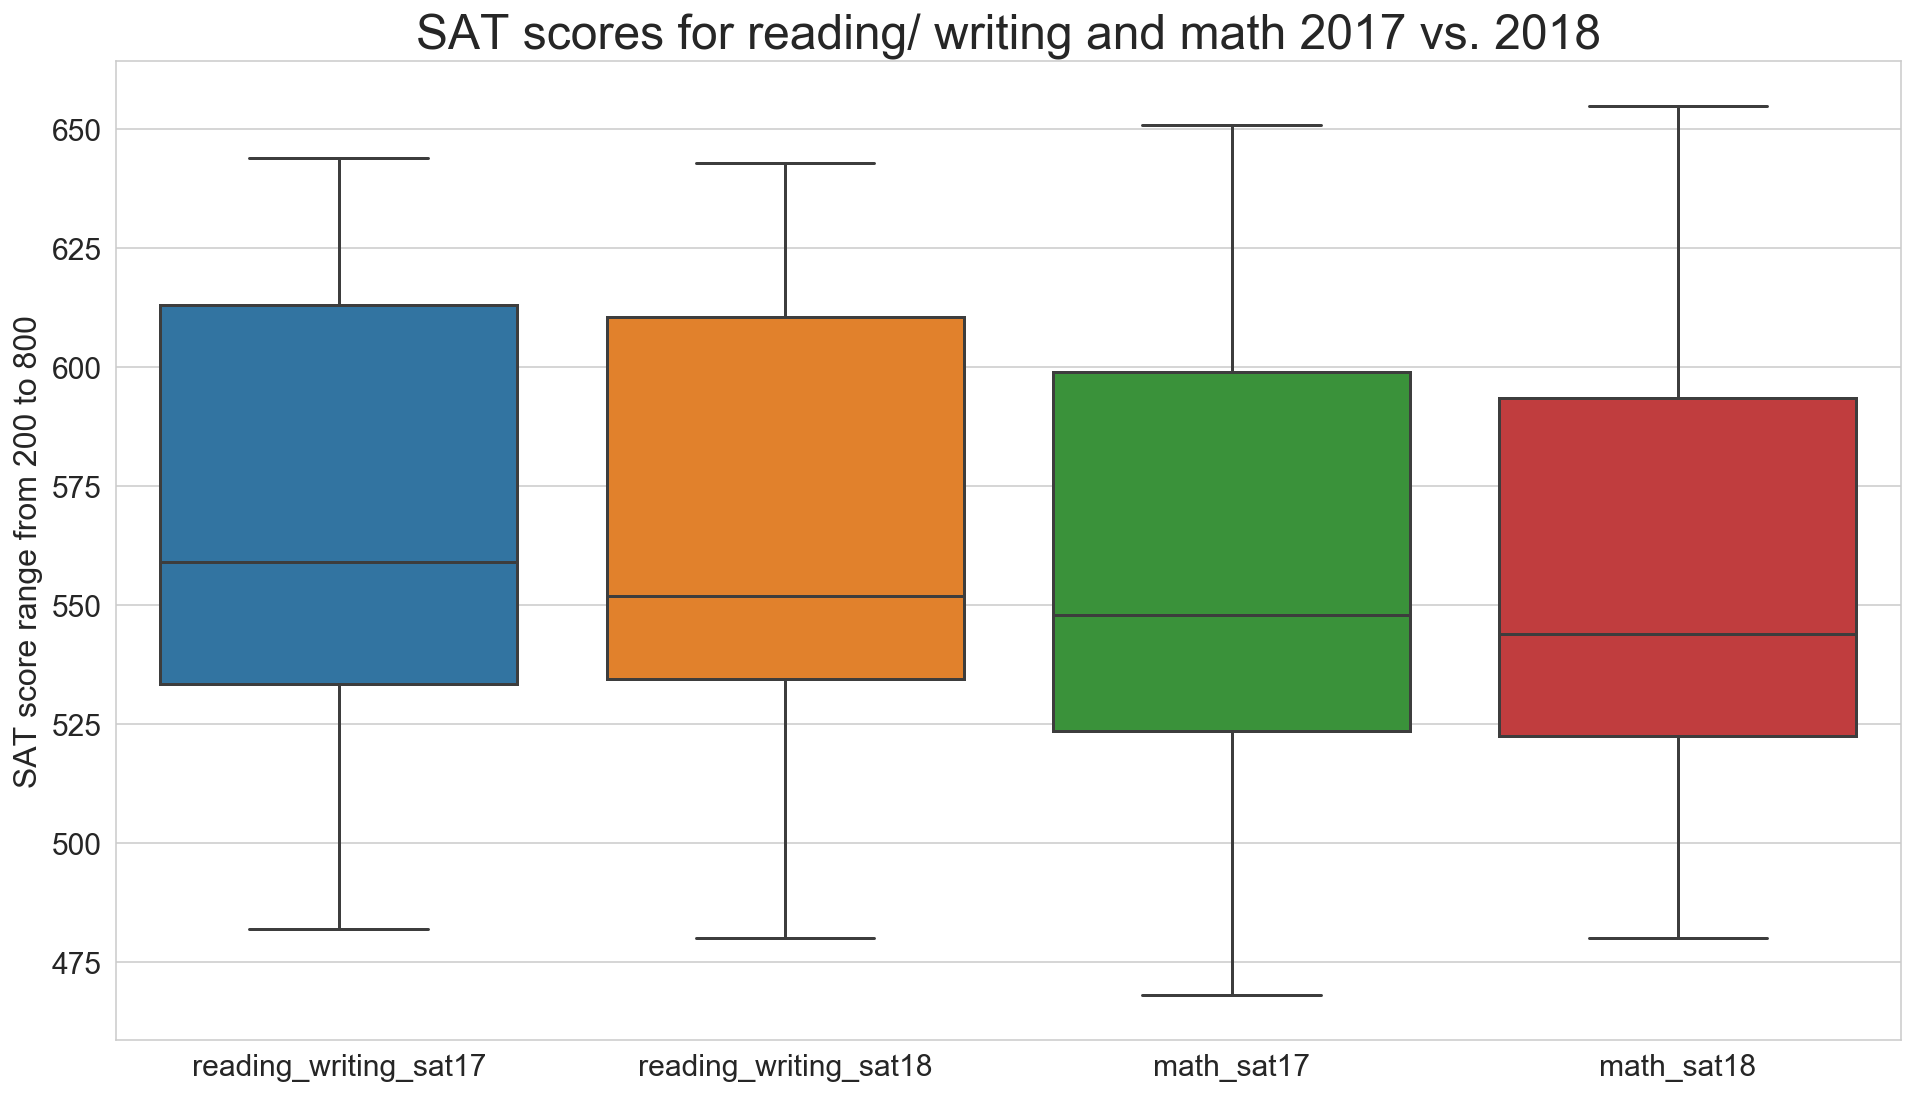

In [130]:
#Plotting SAT attribute scores for 2017 and 2018
plt.figure(figsize=(16,9))

#Charting boxplot
sns.boxplot(data=final.loc[:,['reading_writing_sat17',
                              'reading_writing_sat18',
                              'math_sat17','math_sat18']]
           ).tick_params(labelsize = 15) #tick.params for xlabel size

#Setting the chart title
plt.title('SAT scores for reading/ writing and math 2017 vs. 2018', fontsize=24)

#Setting ylabel
plt.ylabel('SAT score range from 200 to 800',fontsize=16);

### SAT Attribute Scores
While evidence based reading and writing have a higher median SAT score, the mean state score range is slighlty narrower than the math subject. Indicating that the reading and writing scores are generally more consistent and similar across states while math scores have a greater variance. 

### ACT Scores

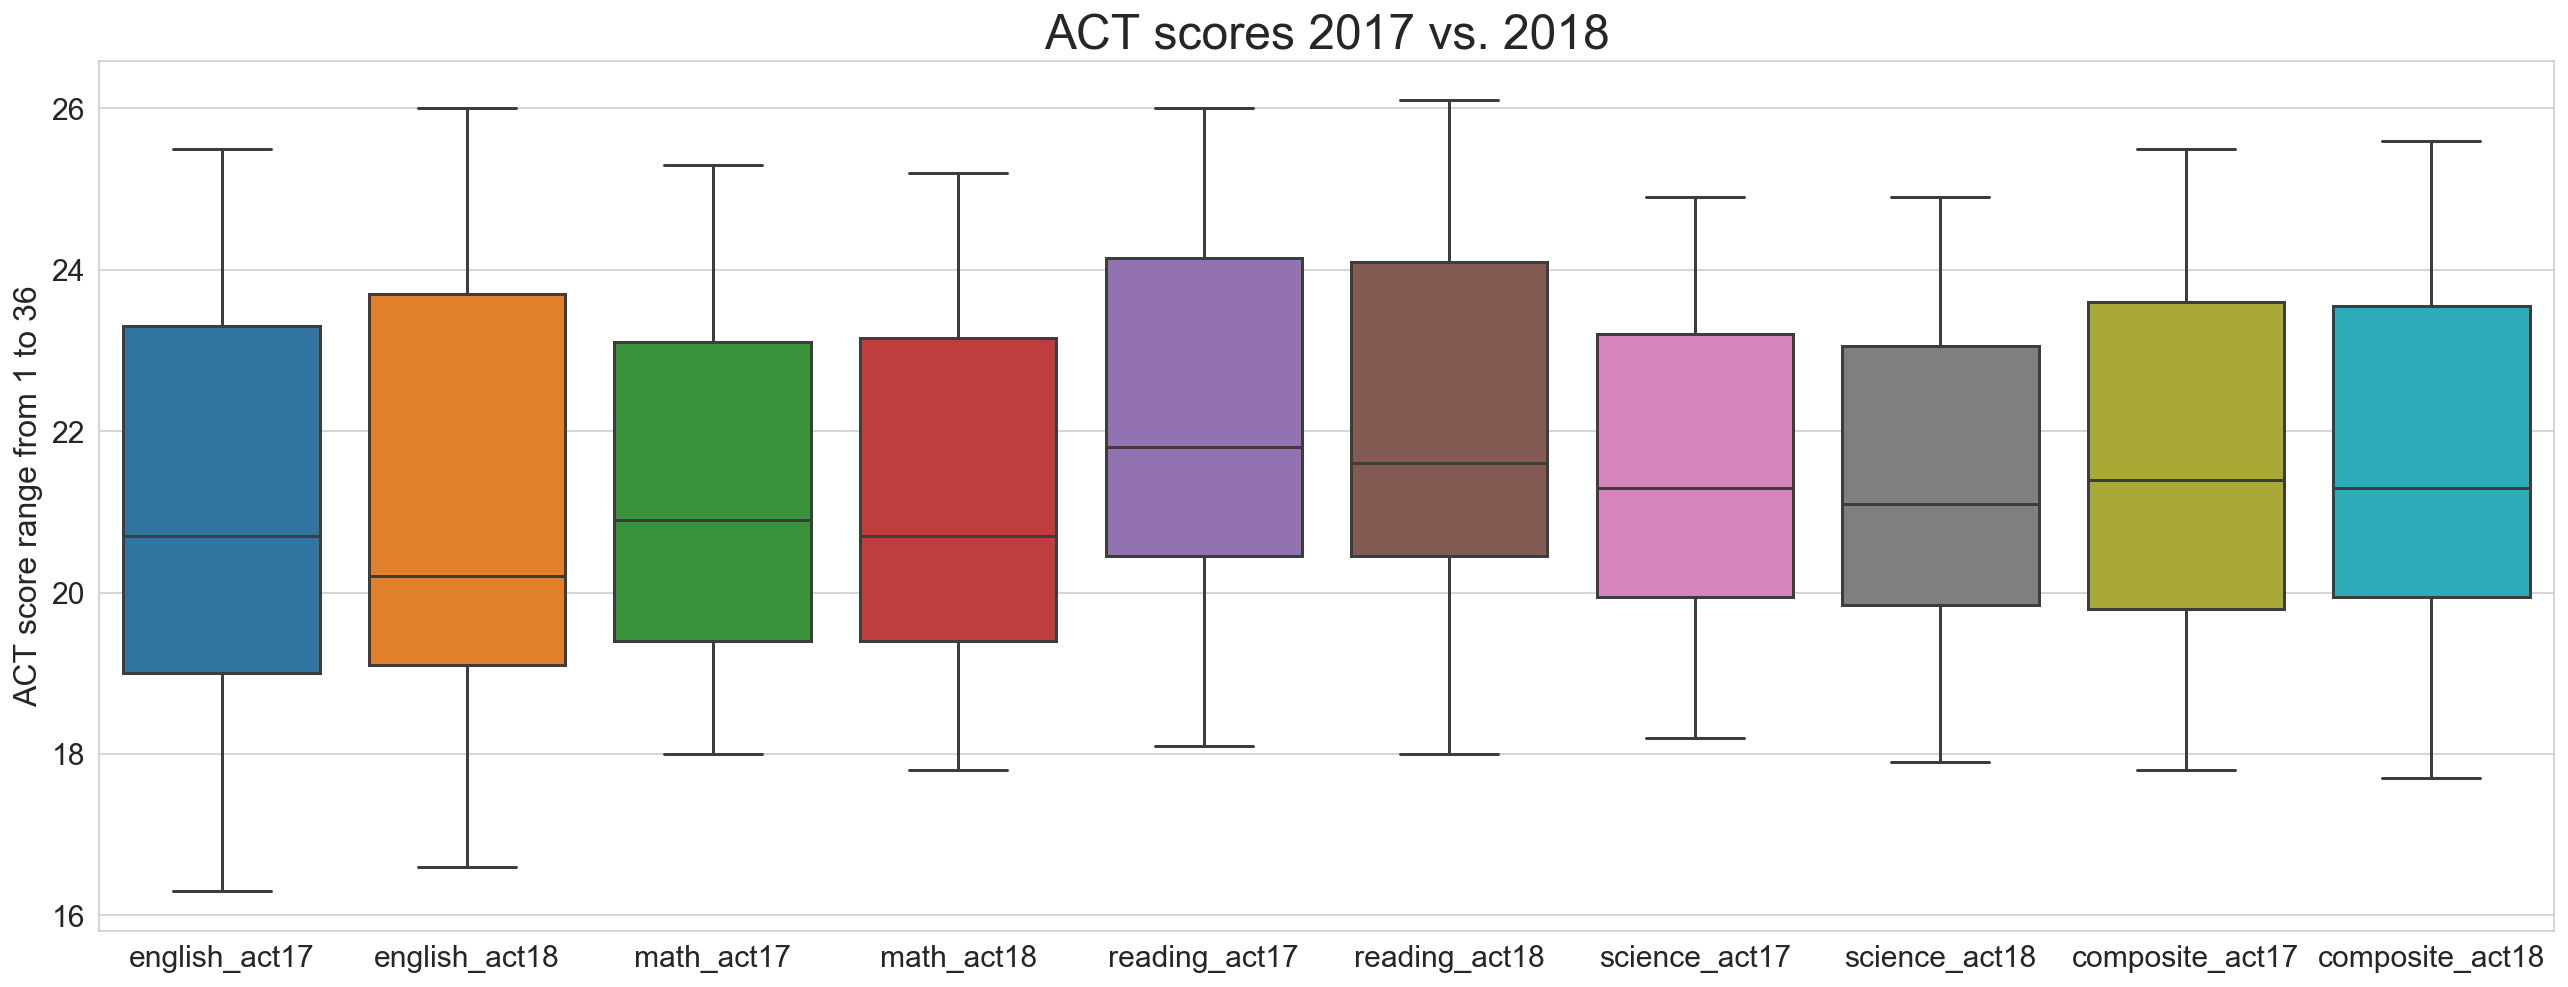

In [131]:
#Plotting ACT attribute and composite scores for 2017 and 2018
plt.figure(figsize=(22,8))

#Charting boxplot
sns.boxplot(data=final.loc[:,['english_act17','english_act18','math_act17',
                              'math_act18','reading_act17','reading_act18',
                              'science_act17','science_act18','composite_act17',
                              'composite_act18']]
           ).tick_params(labelsize = 15) #tick.params for xlabel size

#Setting the chart title
plt.title('ACT scores 2017 vs. 2018', fontsize=24)

#Setting ylabel
plt.ylabel('ACT score range from 1 to 36',fontsize=16);

### ACT Scores
Little variation betwen year for each subject and the composite with only english act scores in 2018 having a slighlty lower median but overall having a higher right skew.

Interestingly, english has the greatest range of mean state scores, followed by reading and then math and science.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

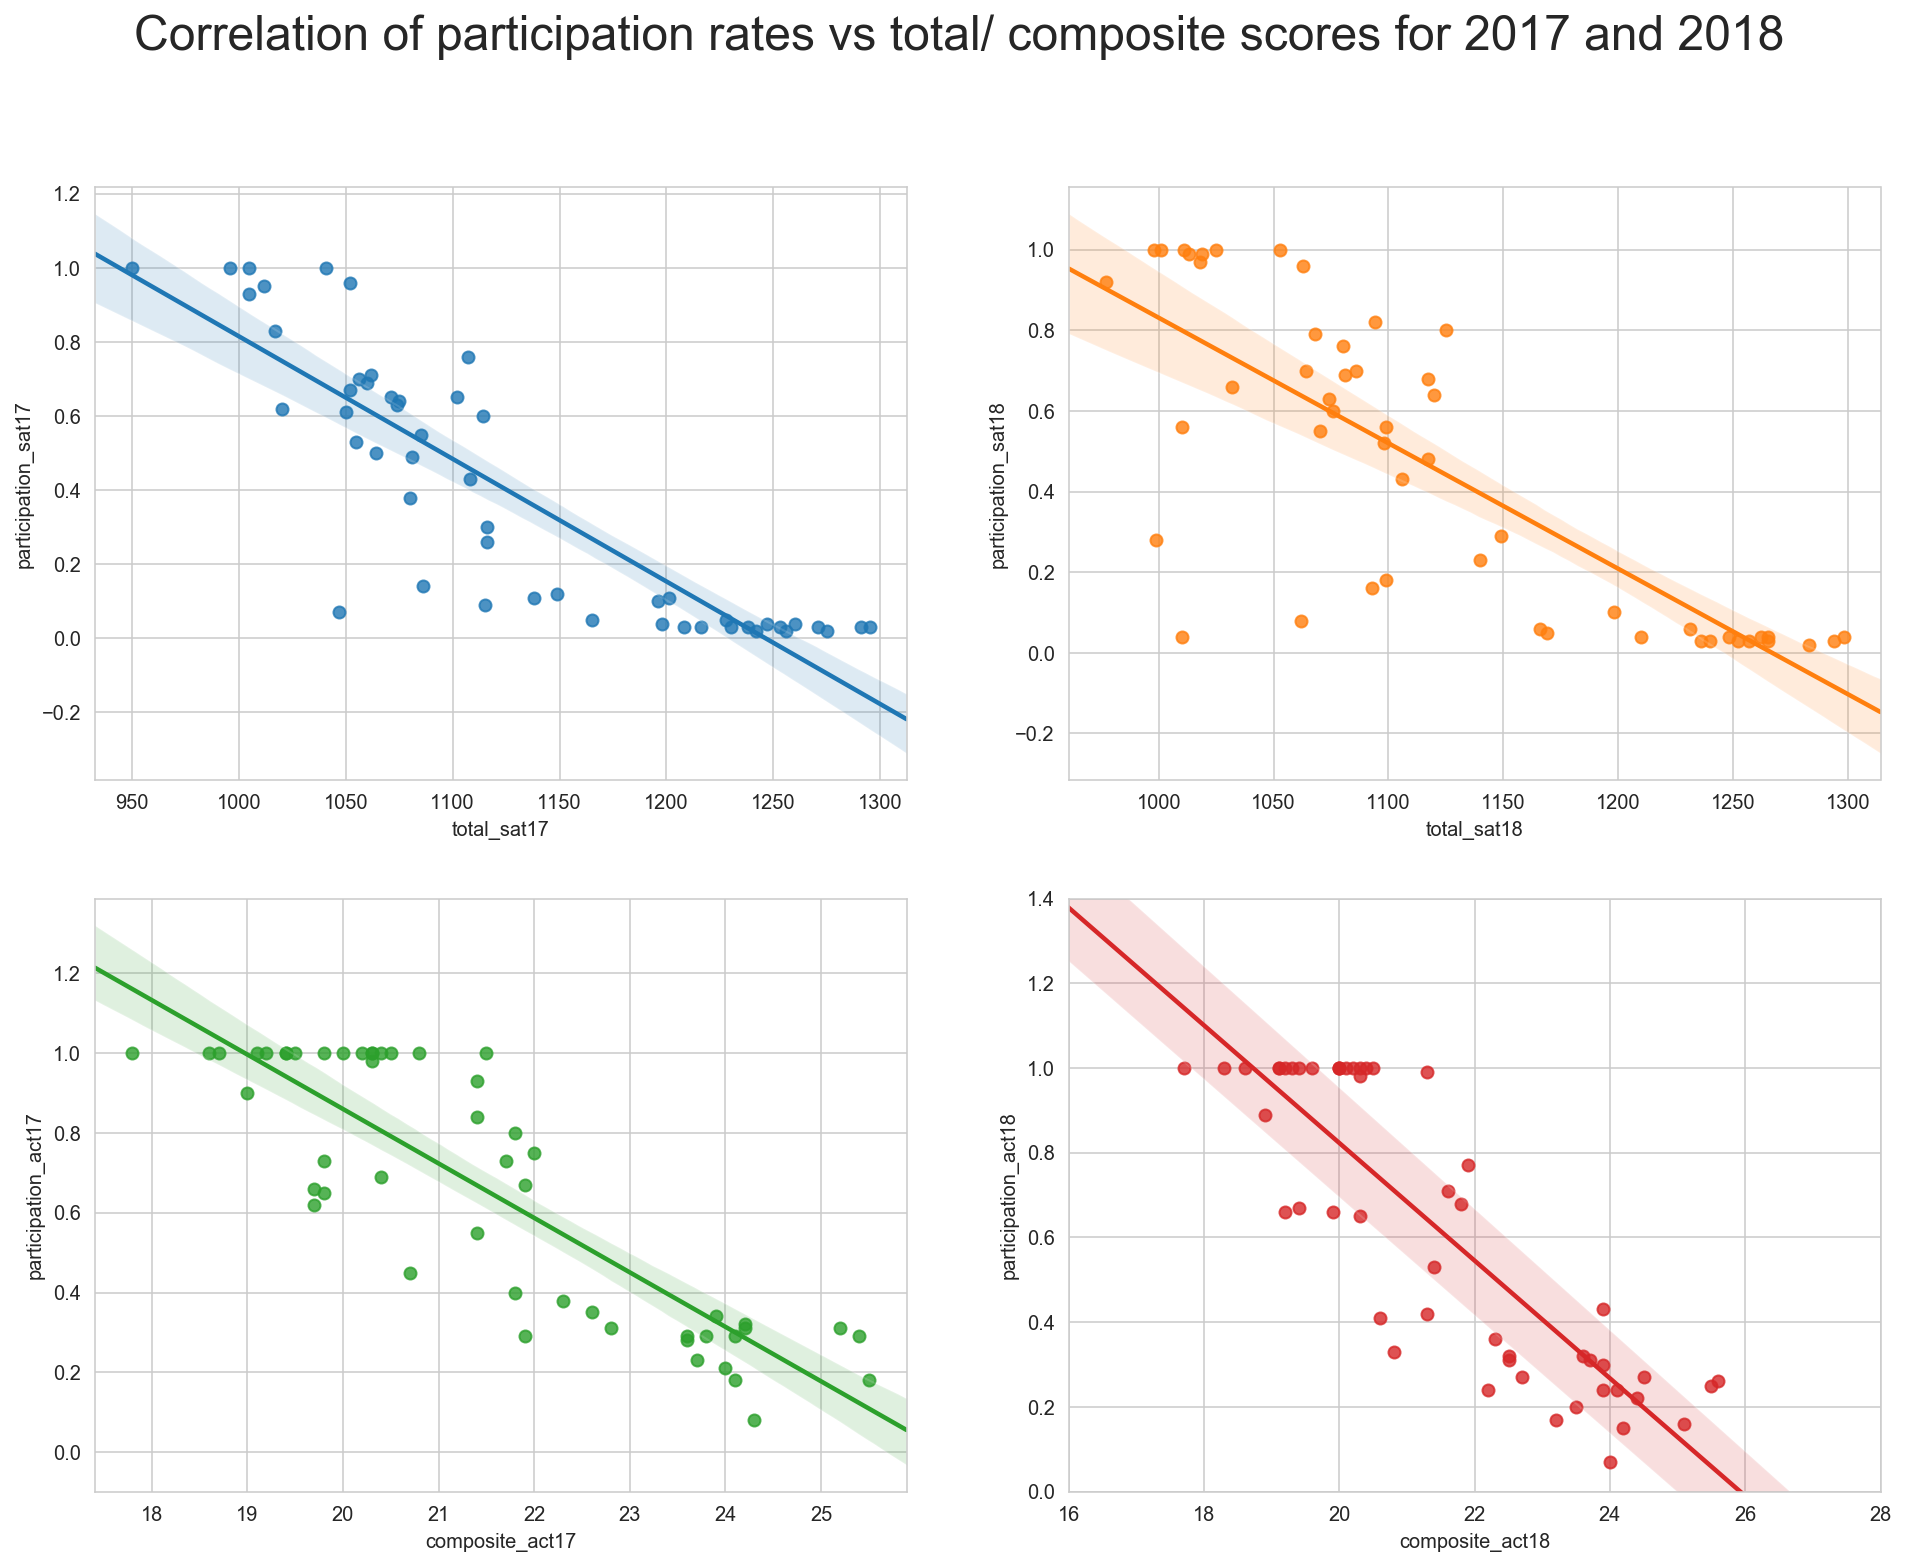

In [132]:
#Plotting regression of particiaption rates and overall score achieved in both years
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows= 2, ncols=2, sharex=False,
                                             sharey=False,figsize=(16,12))

#Adding title to the chart
fig.suptitle('Correlation of participation rates vs total/ composite scores for 2017 and 2018', 
             fontsize=24)

#Each subplot is the participataion rate against the respecitve overll score
ax1 = sns.regplot('total_sat17', 'participation_sat17',final, ax=ax1)
ax2 = sns.regplot('total_sat18', 'participation_sat18',final,ax=ax2)
ax3 = sns.regplot('composite_act17', 'participation_act17',final,ax=ax3)
ax4 = sns.regplot('composite_act18', 'participation_act18',final,ax=ax4)

#Additional lines of code needed to prevent the last graph from having its limits too streched
ax4.set_ylim(0,1.4)
ax4.set_xlim(16,28);

### Participation and total/ composite
As seen previously in the correlation heatmap, participation rates and overall results are negatively correlated for both tests in 2017 and 2018.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [133]:
#Summary statistics of final dataframe transposed for easy viewing
final.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_sat18,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0
reading_writing_sat18,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
math_sat18,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
total_sat18,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
participation_act18,51.0,0.616471,0.340810,0.07,0.285,0.66,1.000,1.0
composite_act18,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6
english_act18,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
math_act18,51.0,21.125490,2.035765,17.80,19.400,20.70,23.150,25.2
reading_act18,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
science_act18,51.0,21.345098,1.870114,17.90,19.850,21.10,23.050,24.9


### 2018 SAT variable distribution

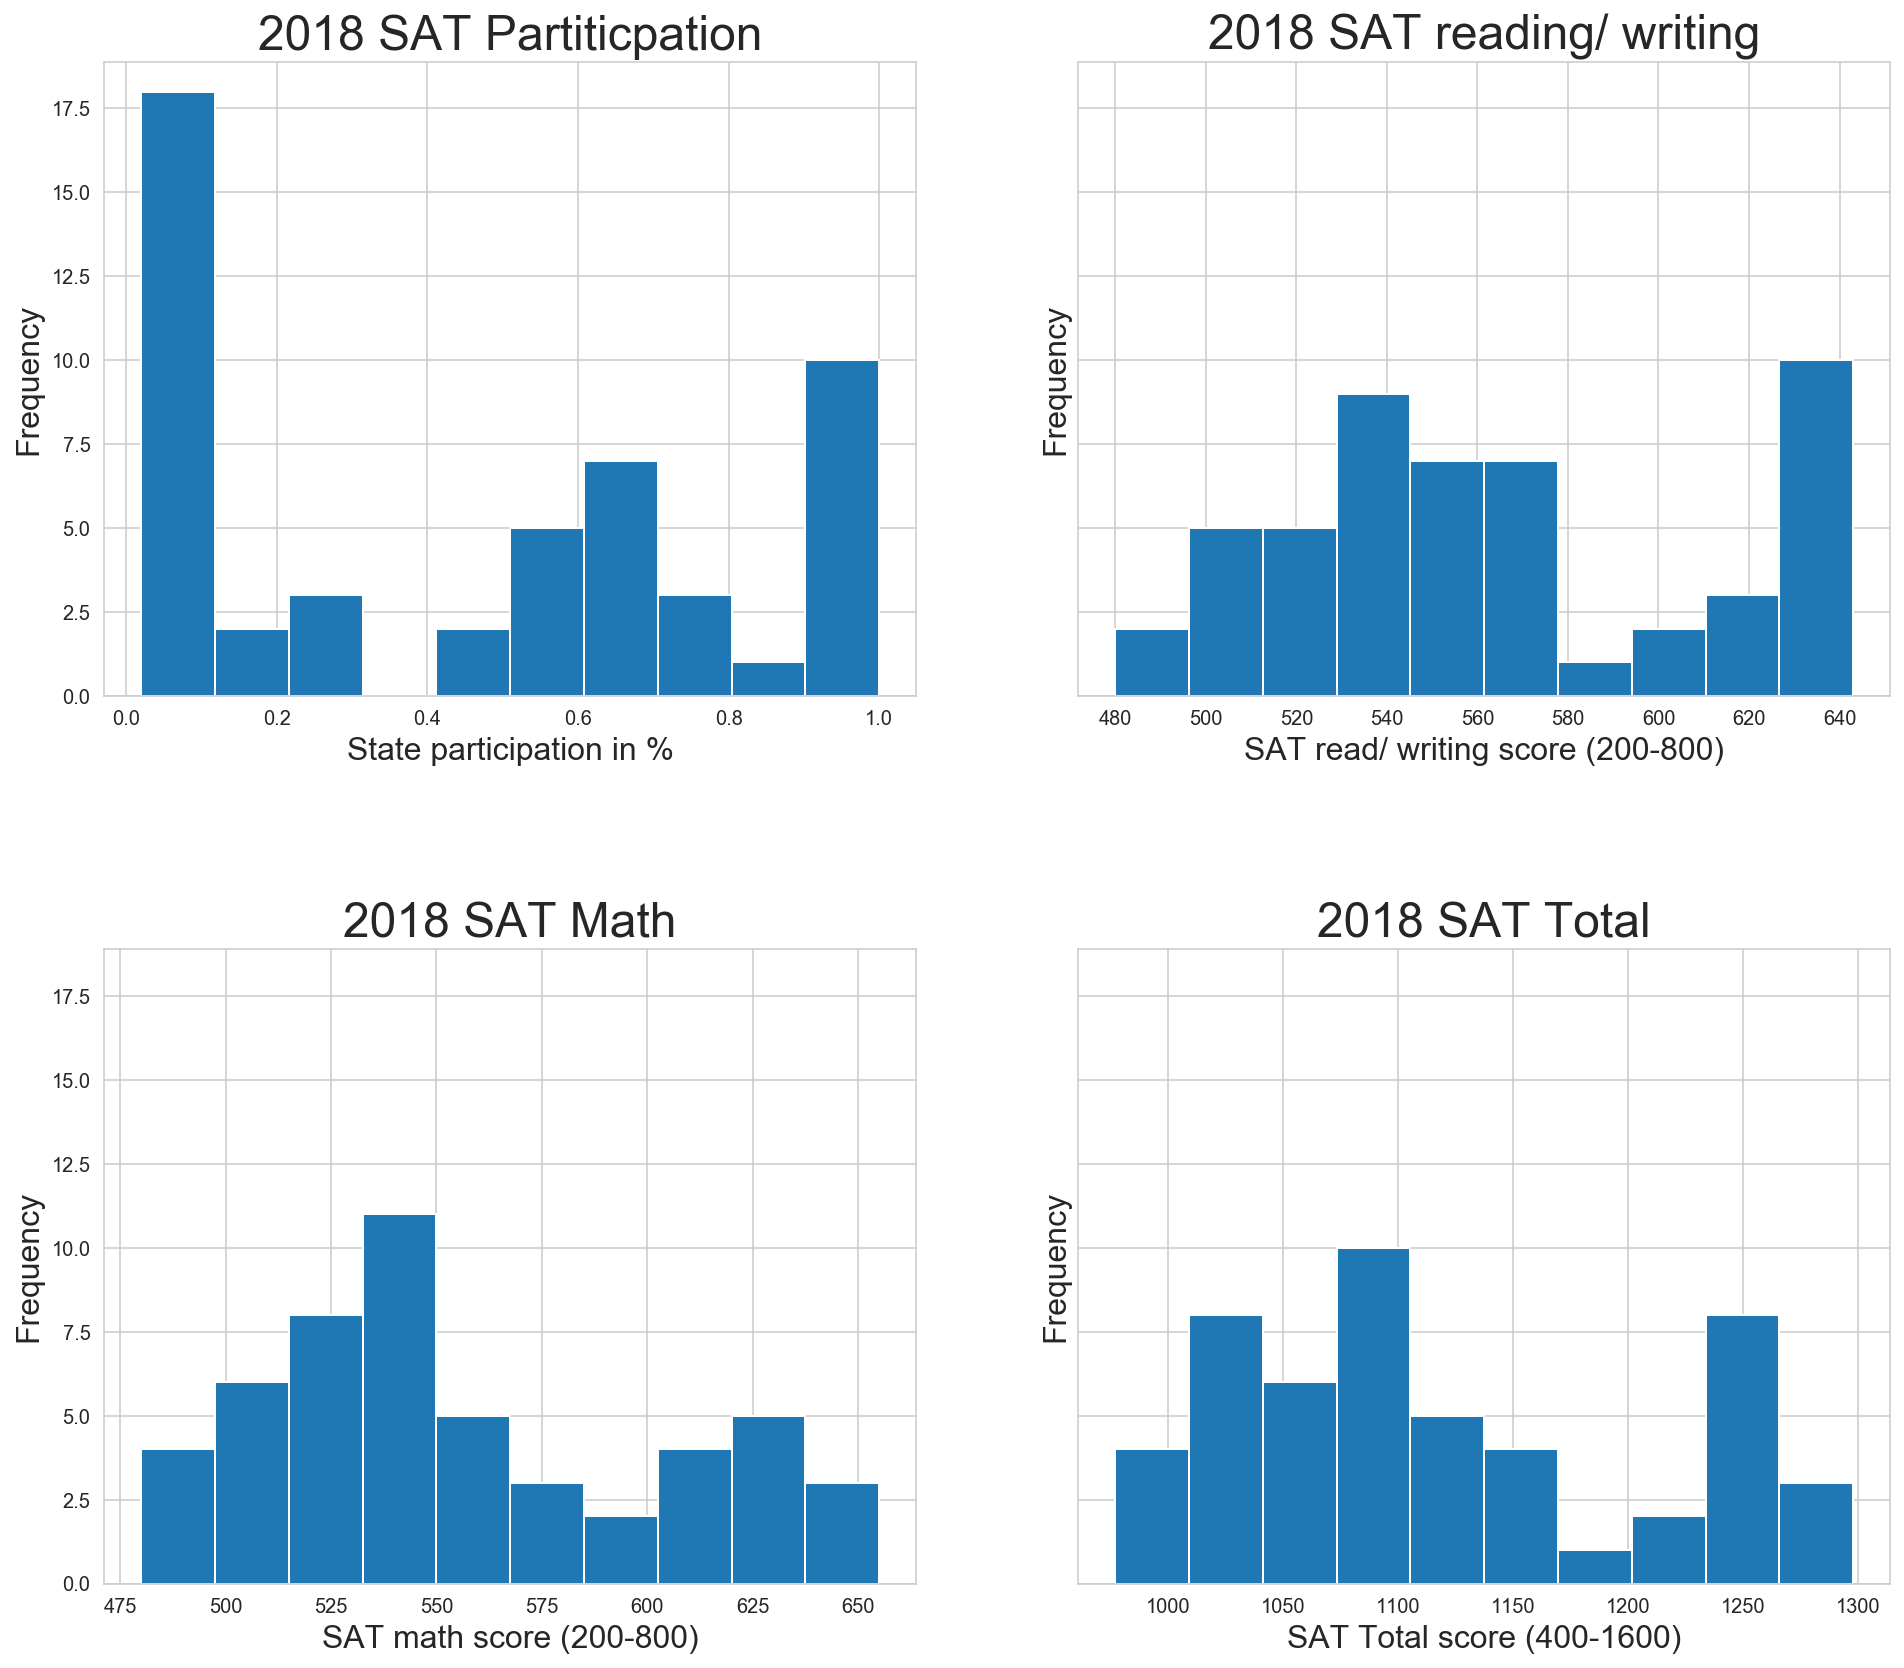

In [134]:
#Plotting all SAT 2018 attributes
subplot_histograms(final,['participation_sat18', 'reading_writing_sat18','math_sat18','total_sat18'],
                   ['2018 SAT Partiticpation', '2018 SAT reading/ writing','2018 SAT Math','2018 SAT Total'],
                   ['State participation in %','SAT read/ writing score (200-800)','SAT math score (200-800)',
                    'SAT Total score (400-1600)'],
                   'Frequency')

#### 2018 SAT variable distribution
- 2018 SAT participation: Bimodal distribution with two peaks at around 0% and at 100% with a left skew. With range of values from 0% to 100%. SAT pariticpation sees the highest frequency in attributes among this subplot.
- 2018 SAT reading/ writing score: Possible range of values 200 to 800. Bimodal distribution with peaks at 540 and 640.
- 2018 SAT math score: Possible range from 200 to 800 with a left skewed bimodal characteristics. Highest frequencies are at 530-545 and at 625.
- 2018 SAT total score: Range of 400 to 1600, with left skewed bimodal distribution. Peaks at 1100 and 1250.

### 2017 SAT variable distribution

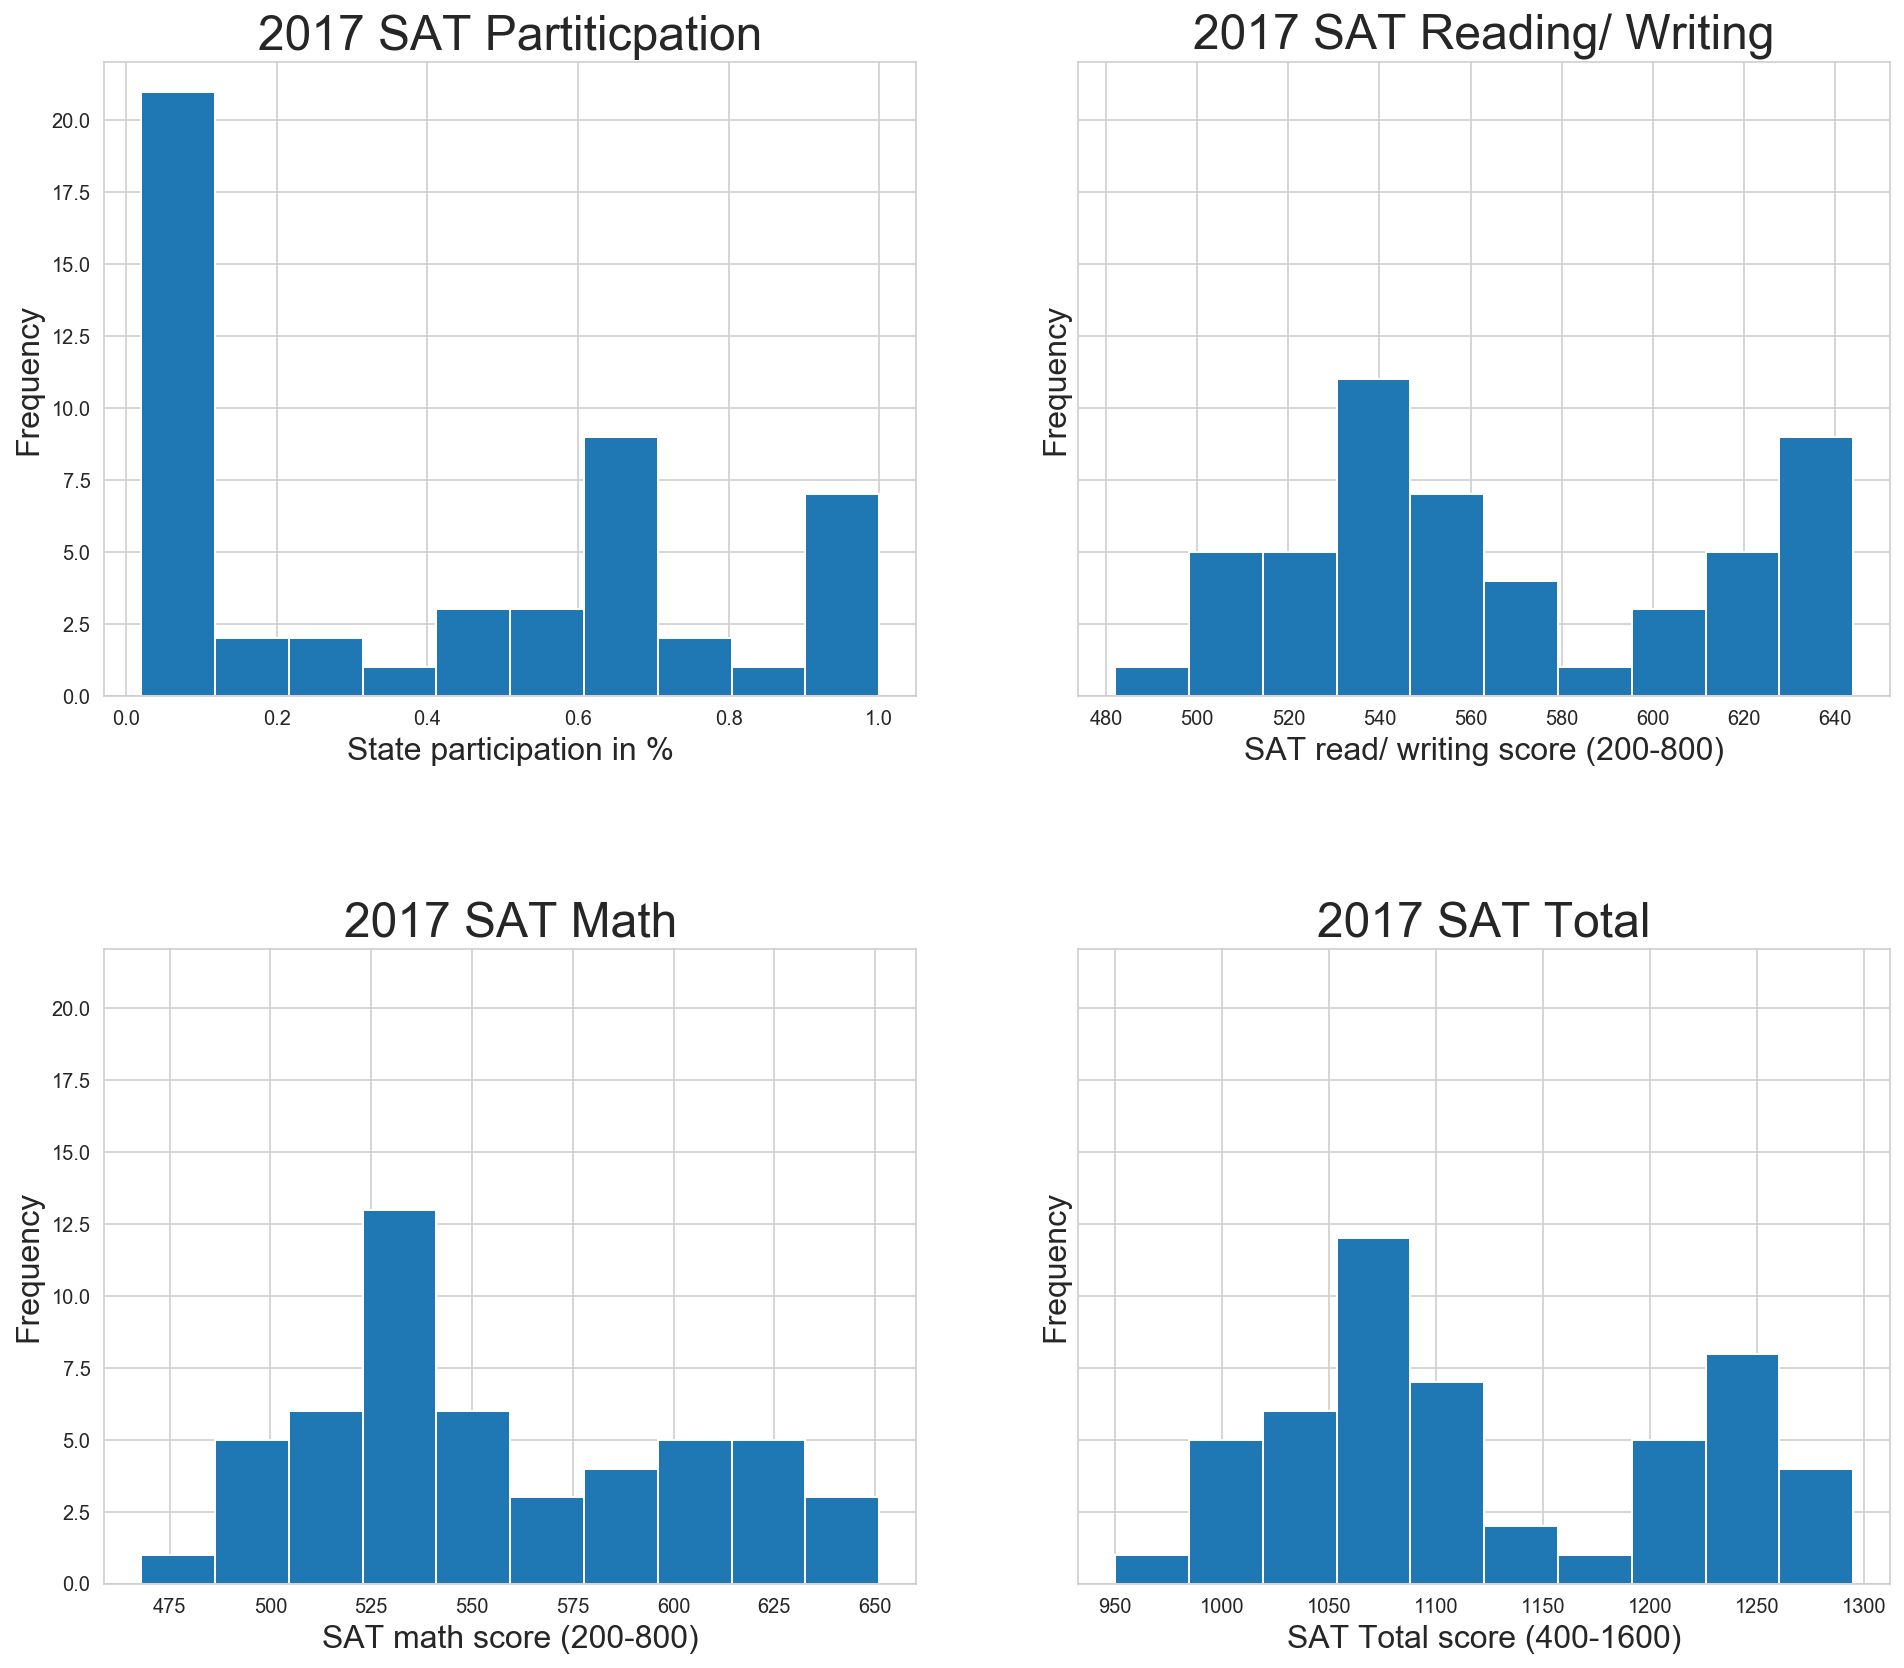

In [135]:
#Plotting all 2017 SAT variables
subplot_histograms(final,['participation_sat17', 'reading_writing_sat17','math_sat17','total_sat17'],
                   ['2017 SAT Partiticpation', '2017 SAT Reading/ Writing','2017 SAT Math','2017 SAT Total'],
                   ['State participation in %','SAT read/ writing score (200-800)','SAT math score (200-800)',
                    'SAT Total score (400-1600)'],
                   'Frequency')

#### 2017 SAT variable distribution
- 2017 SAT participation: Range of 0% to 100%, somewhat bimodal with left skewed distribution. Highest peak at around 0% and around 70%.
- 2017 SAT reading/ writing score: Range of 200 to 800. Clear bimodal distribution with peaks at 540 and 640.
- 2017 SAT math score: Range of 200 to 800. Left skewed bimodal distribution with the highest peak at approximately 530
- 2017 SAT total score: Left skewed bimodal distribution with a possible range of 400 to 1600. The two peaks are at approximately 1075 and slighltly under 1250.

### 2018 ACT variable distribution

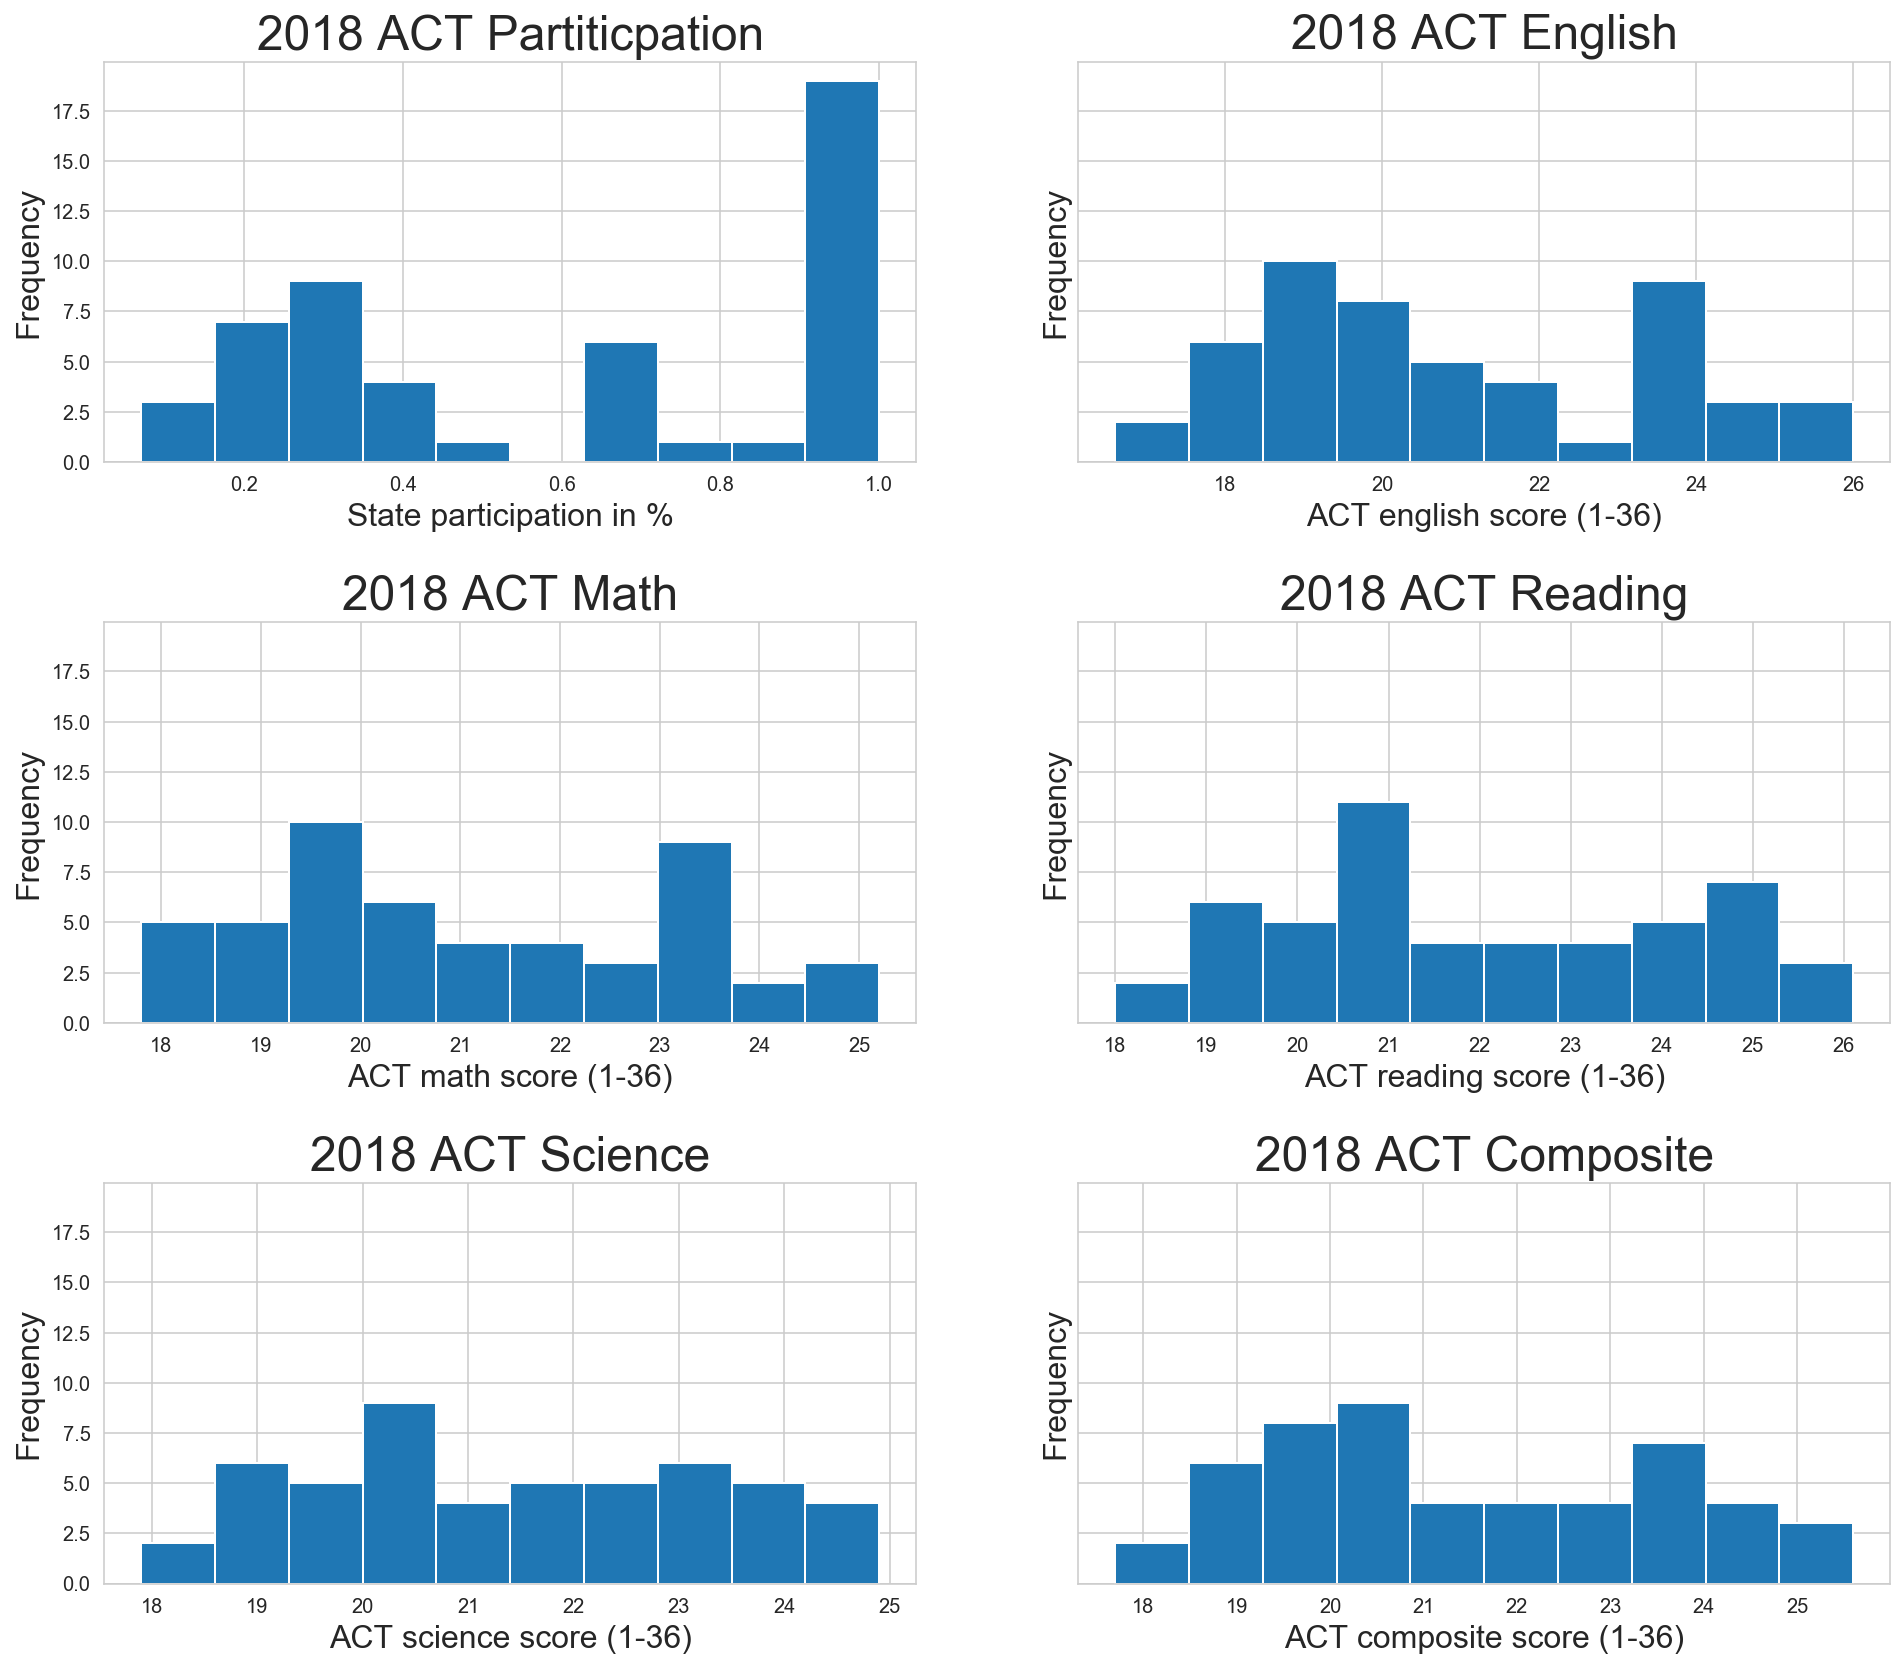

In [136]:
#Plotting all 2018 ACT variables
Answers:subplot_histograms(final,['participation_act18', 'english_act18','math_act18','reading_act18',
                          'science_act18','composite_act18'],
                   ['2018 ACT Partiticpation', '2018 ACT English','2018 ACT Math','2018 ACT Reading',
                   '2018 ACT Science','2018 ACT Composite'],
                   ['State participation in %','ACT english score (1-36)','ACT math score (1-36)',
                    'ACT reading score (1-36)','ACT science score (1-36)','ACT composite score (1-36)'],
                   'Frequency')

#### 2018 ACT variable distribution
- 2018 ACT participation: Range of 0% to 100% with a bimodal distribution. Greatest peaks in frequency are at 30% and 90% approximately.
- 2018 ACT english score: Range of 1-36, left skewed bimodal distribution with peaks at 19 and slighlty under 24.
- 2018 ACT math score: Range of 1-36, left skewed bimodal distribution, peaks at under 20 and 23.5
- 2018 ACT reading score: Range of 1-36, left skewed bimodal distribution, peaks at slighlty under 21 and slighlty under 25.
- 2018 ACT science score: Range of 1-36, left skewed bimodal distribution, peaks at 20.4 and 23.2 approximately
- 2018 ACT composite score: Range of 1-36, left skewed bimodal distribution, peaks at 20.5 and 23.8 approximately

### 2017 ACT variable distribution

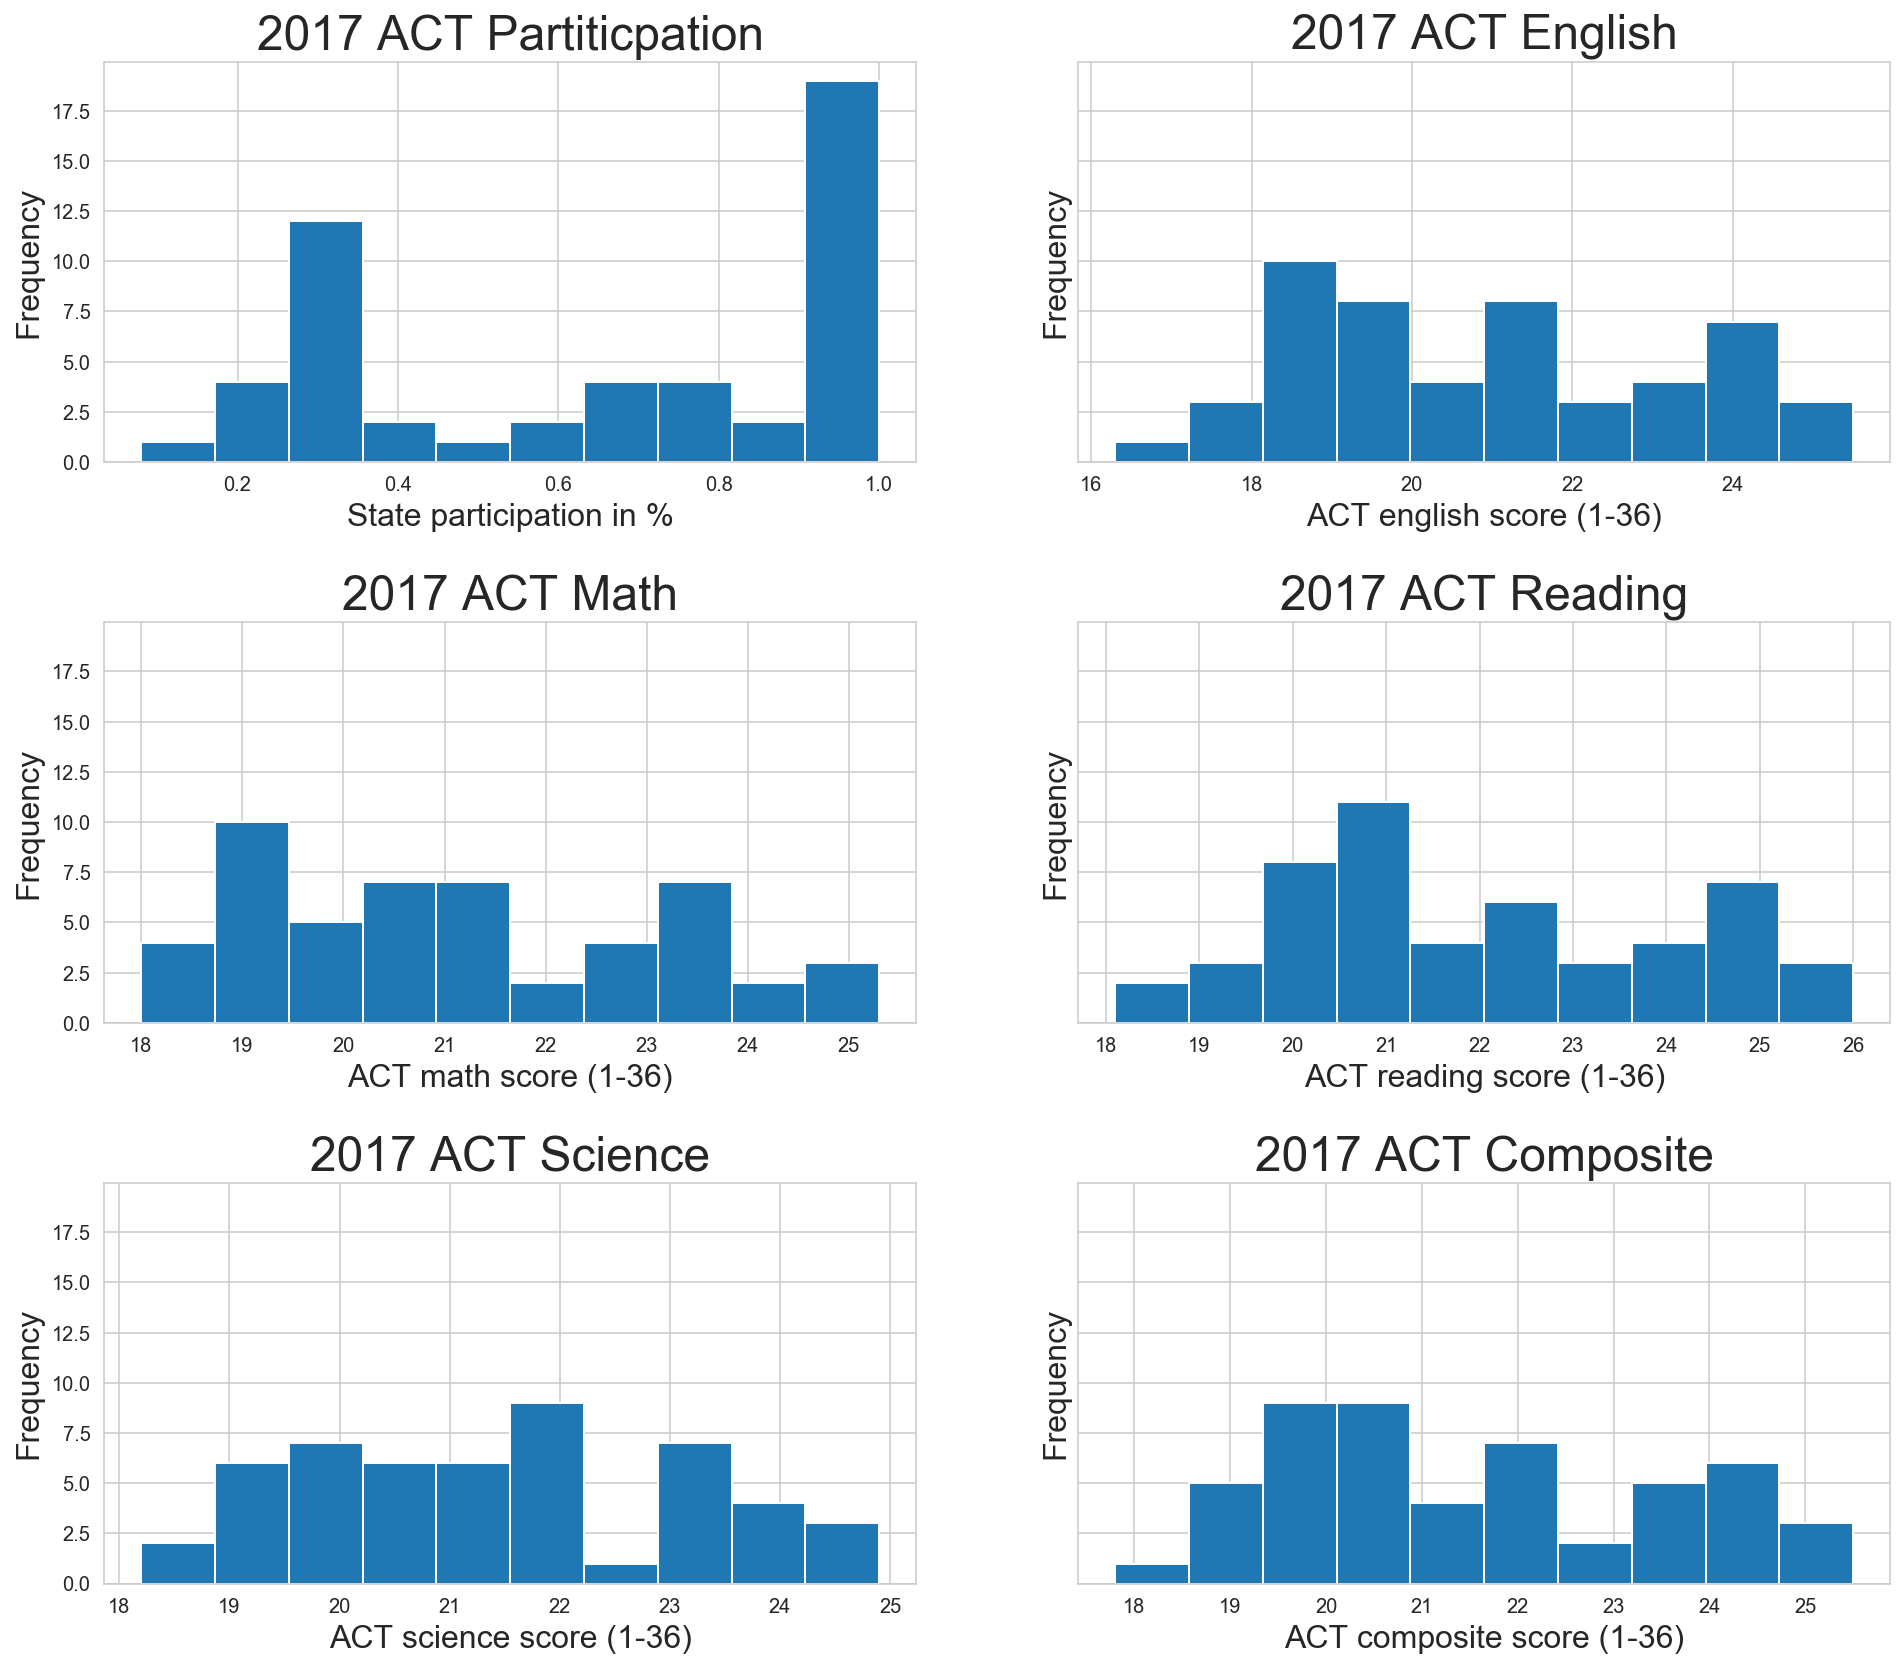

In [137]:
subplot_histograms(final,['participation_act17', 'english_act17','math_act17','reading_act17',
                          'science_act17','composite_act17'],
                   ['2017 ACT Partiticpation', '2017 ACT English','2017 ACT Math','2017 ACT Reading',
                   '2017 ACT Science','2017 ACT Composite'],
                   ['State participation in %','ACT english score (1-36)','ACT math score (1-36)',
                    'ACT reading score (1-36)','ACT science score (1-36)','ACT composite score (1-36)'],
                   'Frequency')

#### 2017 ACT variable distribution
- 2017 ACT participation: Range of 0% -100%, bimodal distribution peaks at 30% and 100%
- 2017 ACT english score: Range of 1-36, left skewed bimodal distribution, with peak frequency at 19
- 2017 ACT math score: Range of 1-36, left skewed bimodal distribution, peaks at 19 and 23.5
- 2017 ACT reading score: Range of 1-36, left skewed bimodal distribution with peaks at slighlty under 21.0 and under 25.0
- 2017 ACT science score: Range of 1-36, bimodal distribution
- 2017 ACT composite score: Range of 1-36, left skewed bimodal distribution


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

No, none of the variables in final dataframe display normal distribution qualities from the histograms above.

The Central Limit Theorem (CLT) states that when summing random independent variables, the sums will tend towards a random normal distribution, even if the original variables are not normally distributed. The key words are **random** and **independent**. 

As we know from our regression and correlation heatmaps, there is a negatively correlated relationship between participation rates and overall Total/ Composite scores at state level. States with high participation rates have lower overall mean scores. This points us to conclude that there is a large selection bias at play. Students in states that do not have mandatory ACT or SAT test actively seek out the test. These groups of students actively contribute to the higher overall scores in low participataion areas. They are not random varaibles.

In other words, states with low participation rates are measuring the ability of the top few dedicated students willing to take the ACT or SAT on their own accord. On the other hand states with high participation are measuring the ability of all high school students (which should in theory follow the CLT).

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Because of the establish high level of selection bias at play, no variable will follow the CLT and show a normal distribution at the national level.

It wouldnt make sense to outrightly compare scores at the state level. Instead, grouping the same participation rates together and then comparing would give better insight into how students in one state compare to another

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Given that the data variables are not normally distributed, statistical inferences that are not bound to the normal distribution should be used.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Given the selection bias at play and the different scales of the SAT(200 to 800) and ACT(1 to 36) tests, it would egregious to have a direct comparison.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### Outliers in SAT participation rates
2 outliers stand out contrastingly to the rest of the dataset, they can be found sitting in the top left hand side of the graph. They have had very low SAT participation rates in 2017 but close to 100% SAT participation rates in 2018. What happened and how did these states increase their SAT particiaptio?

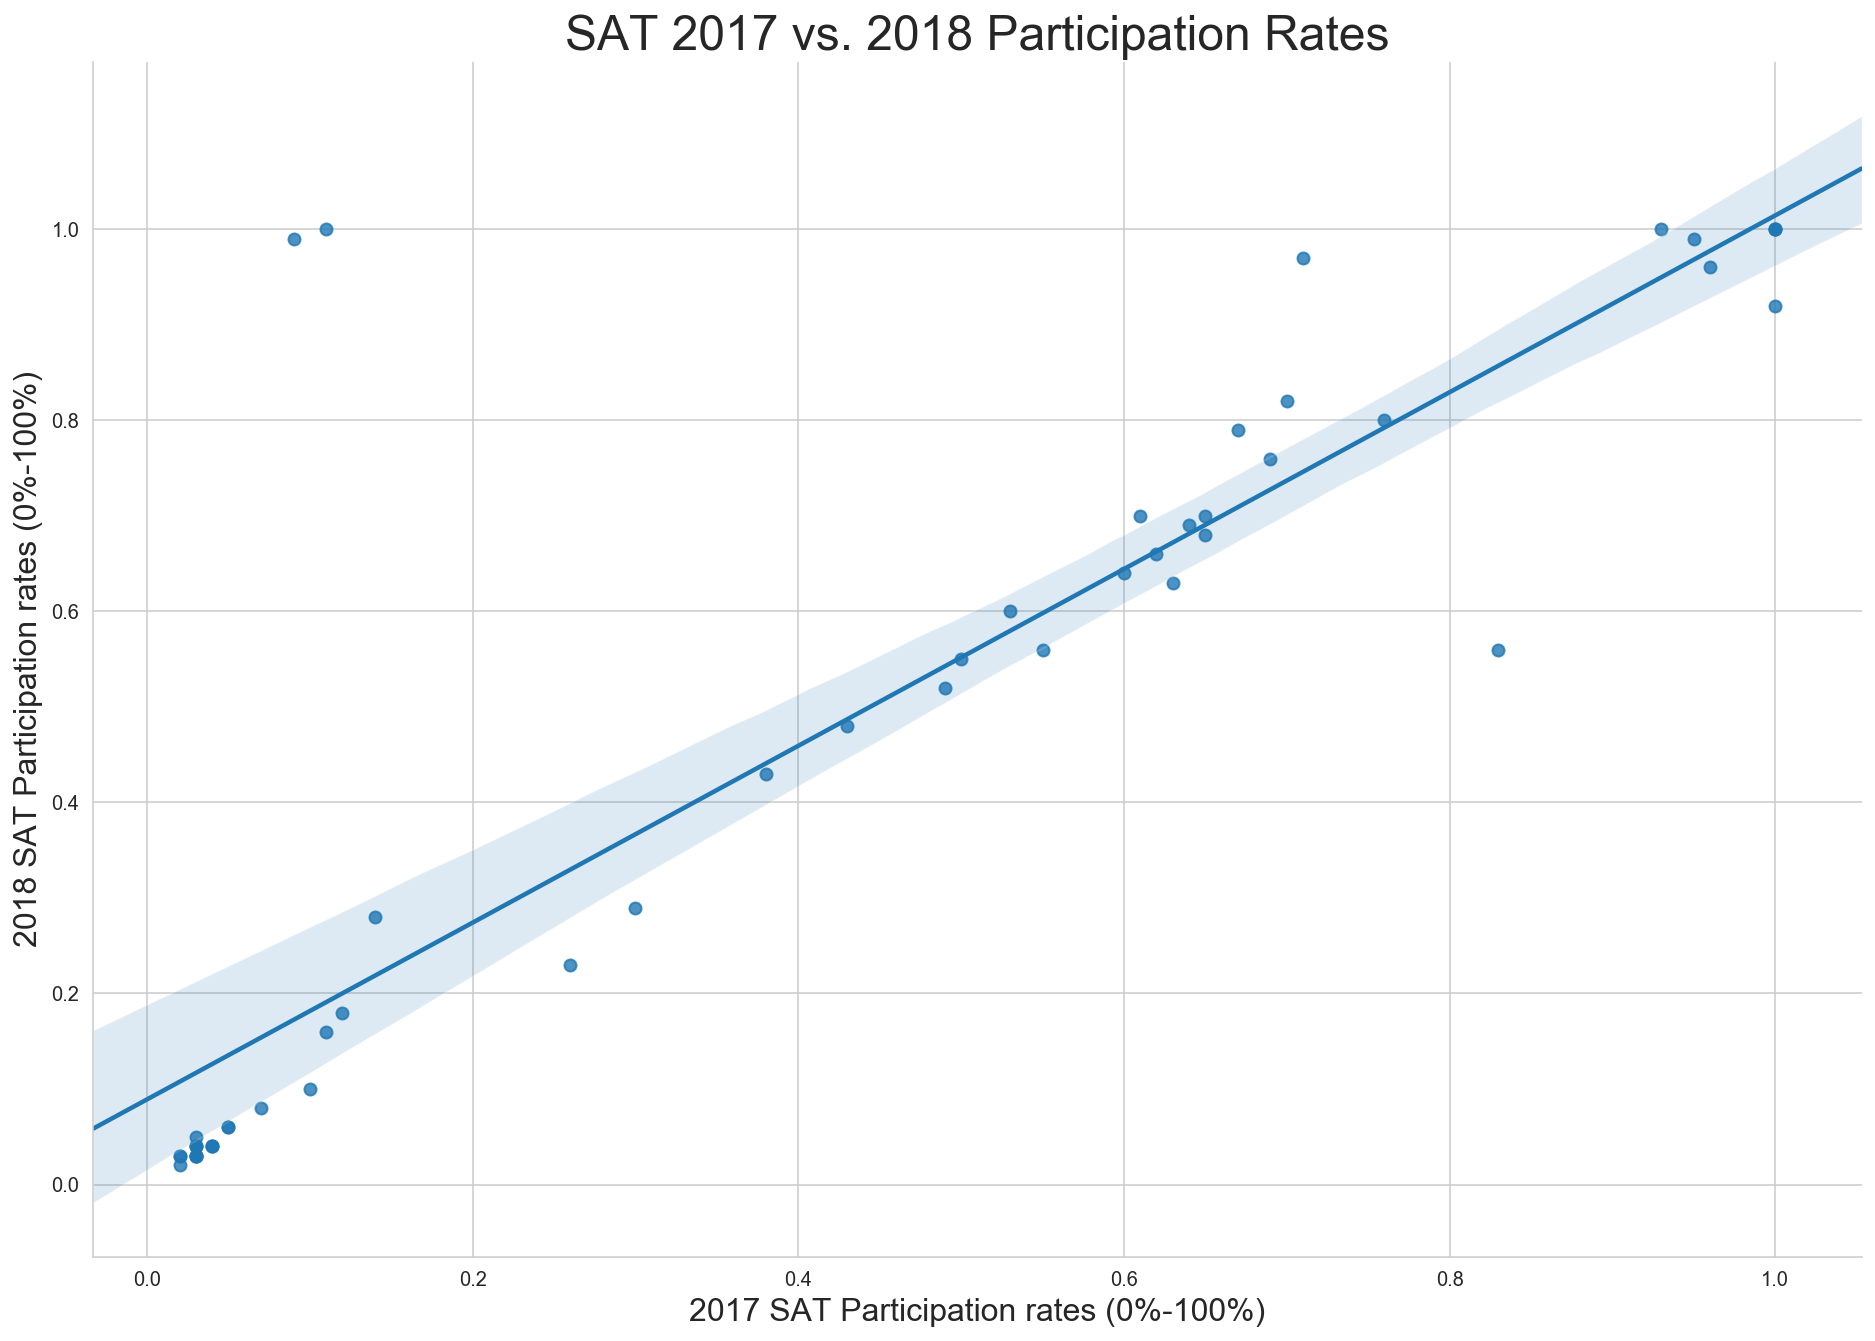

In [138]:
#Plotting SAT Participation rates for 2017 to 2018
seaborn_scatter(dataframe=final, xaxis='participation_sat17', yaxis='participation_sat18',
                title = 'SAT 2017 vs. 2018 Participation Rates', 
                xlabel = '2017 SAT Participation rates (0%-100%)', 
                ylabel = '2018 SAT Participation rates (0%-100%)')

In [139]:
#Identifying the two SAT outlier participation rates
final[(final['participation_sat17'] < 0.2) & (final['participation_sat18']>0.8)]

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,...,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
5,Colorado,1.00,519,506,1025,0.30,23.9,23.9,23.2,24.4,...,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
13,Illinois,0.99,513,506,1019,0.43,23.9,24.1,23.4,24.2,...,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4


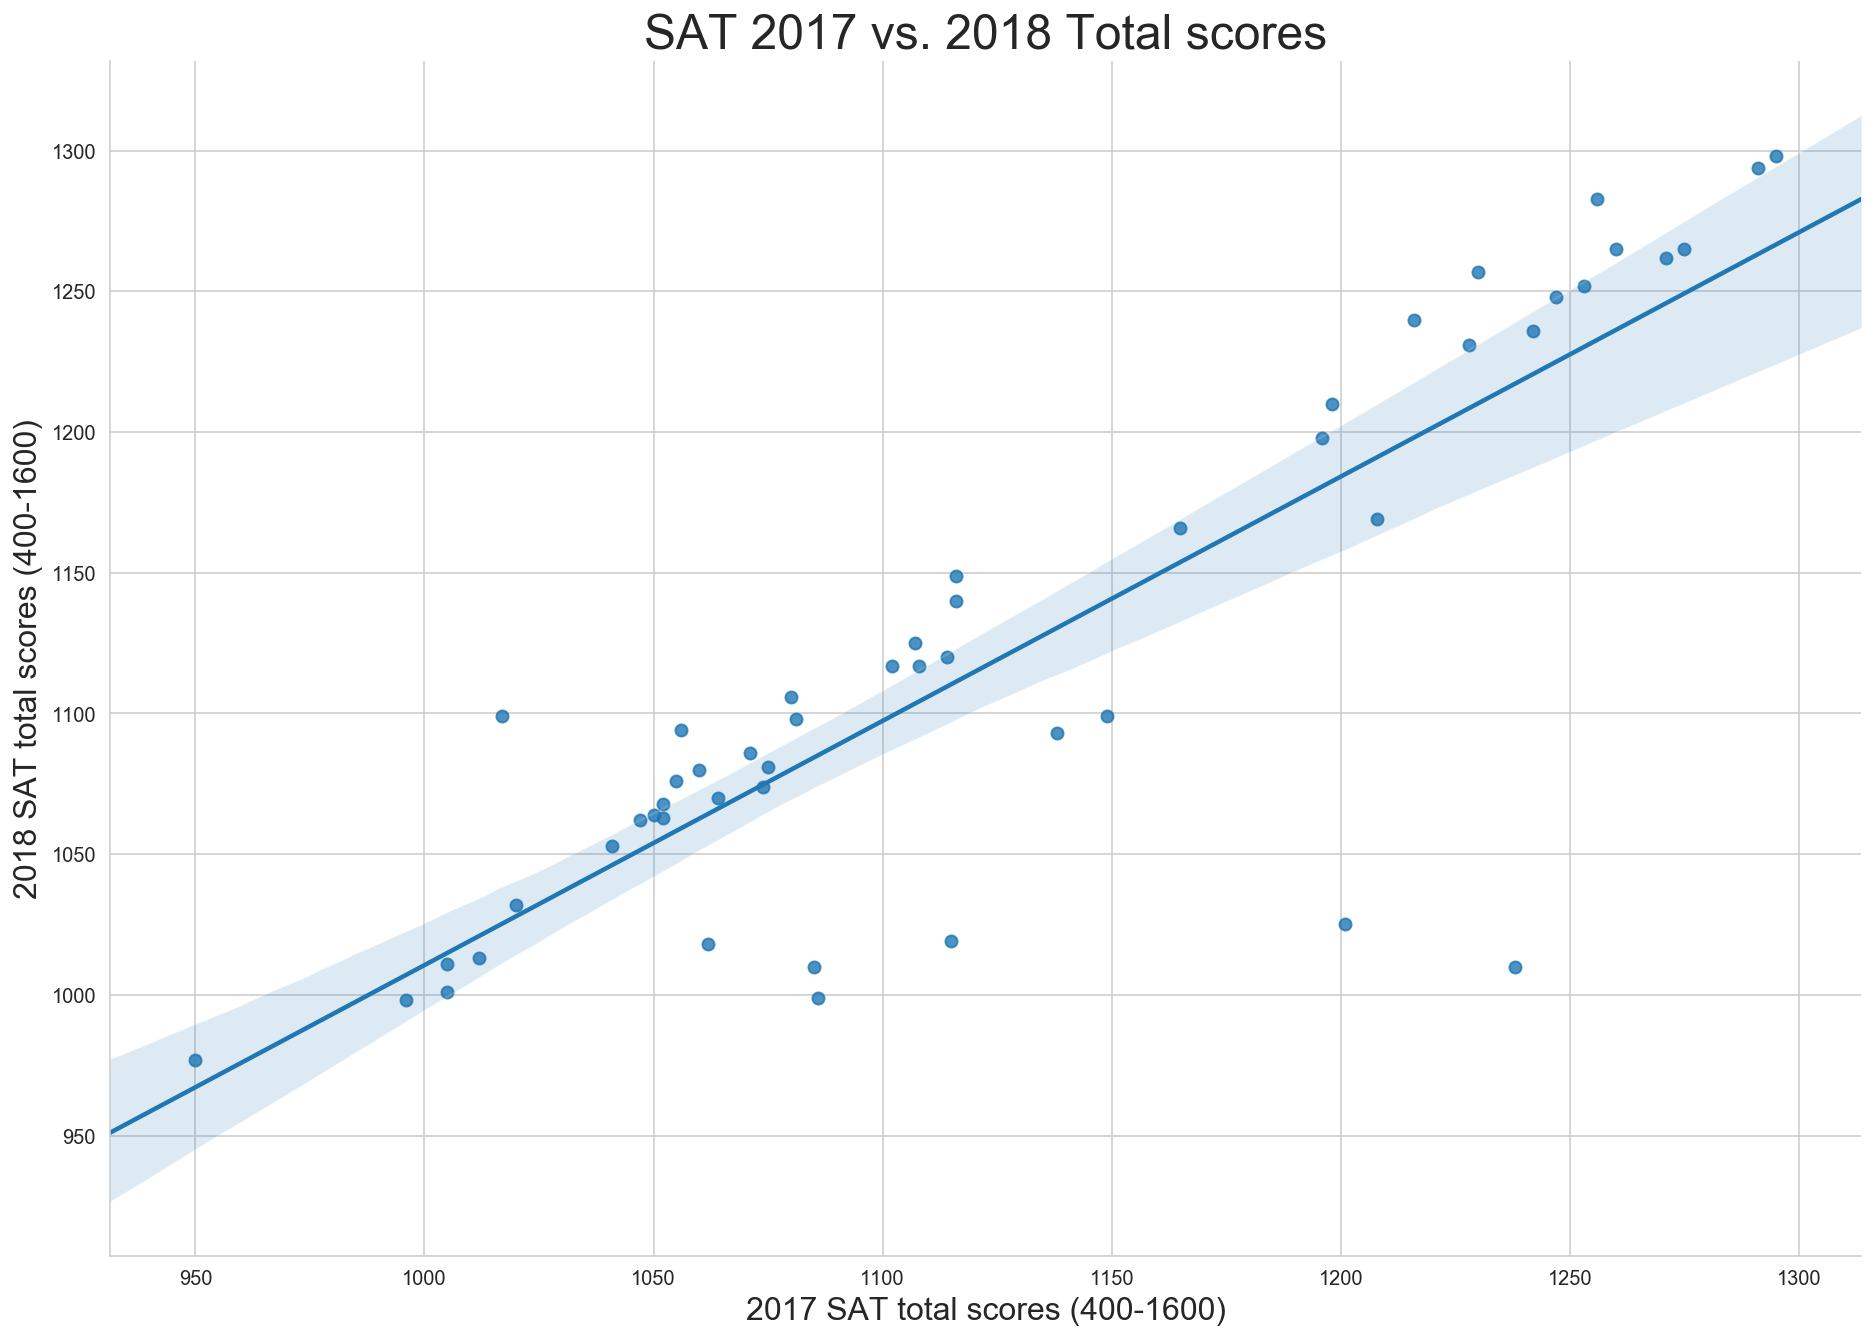

In [140]:
#Plotting SAT Total scores for 2017 vs 2018
seaborn_scatter(dataframe=final, xaxis='total_sat17', yaxis='total_sat18',
                title = 'SAT 2017 vs. 2018 Total scores', 
                xlabel = '2017 SAT total scores (400-1600)', 
                ylabel = '2018 SAT total scores (400-1600)')

### Outliers in SAT scores
Two points on the scatterplot stand out distinctly (1200,1100) and (1240,1020) approximately. These two states have declined drastically in mean score from 2017 to 2018. As we know that SAT scores and participation rates are heavily negatively correlated, the decline in score could possibly be attributed to an increase in participation rate.


In [141]:
#Identifying the two SAT outlier state
final[(final['total_sat17'] > 1200) & (final['total_sat18']<1050)]

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,...,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
5,Colorado,1.00,519,506,1025,0.3,23.9,23.9,23.2,24.4,...,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,20.8
44,Utah,0.04,480,530,1010,1.0,20.4,19.7,19.9,20.9,...,0.03,624,614,1238,1.0,19.5,19.9,20.8,20.6,20.3


### Composite scores for ACT 2017 vs. 2018

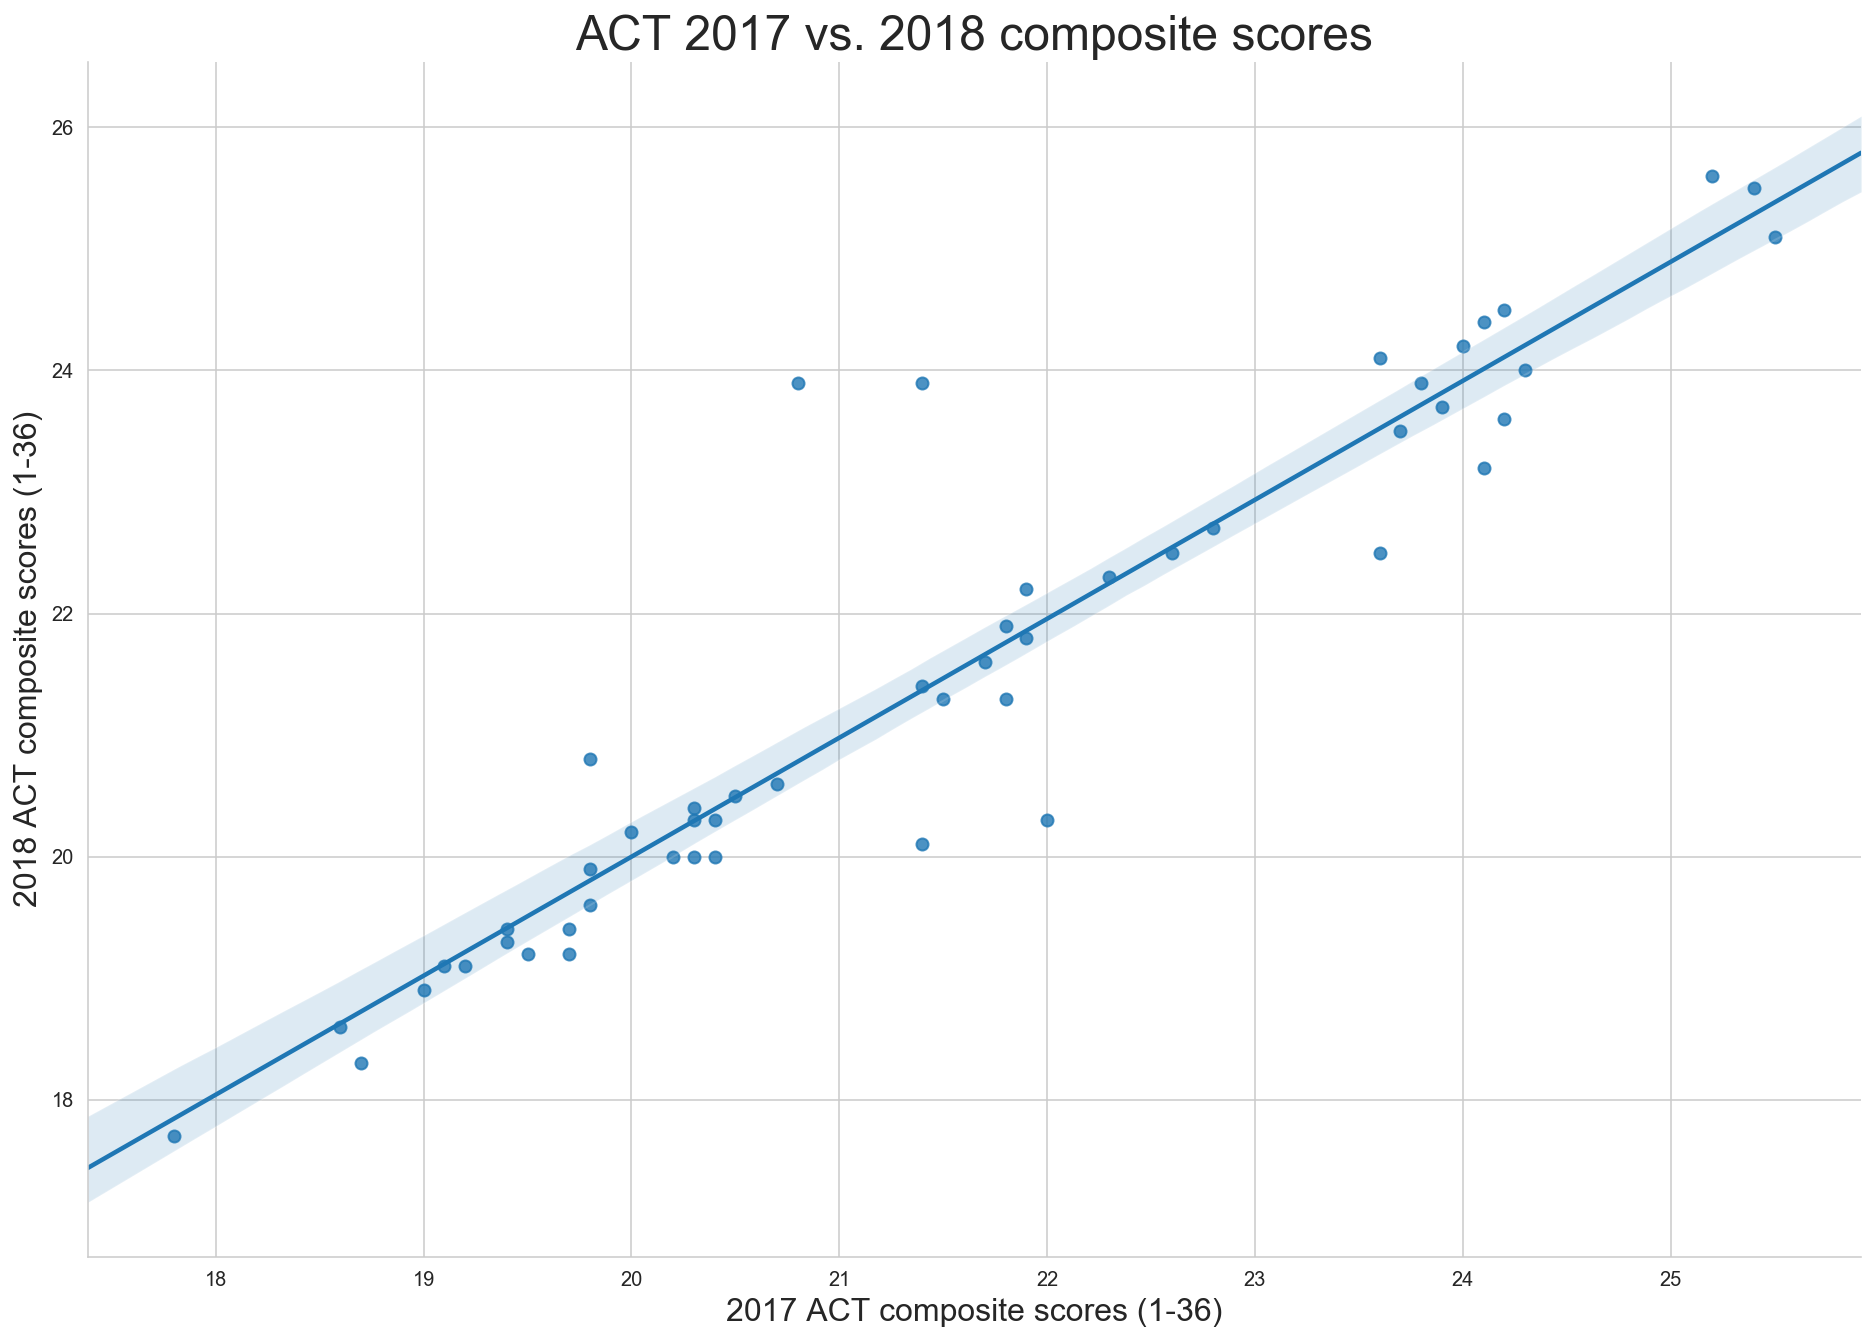

In [142]:
#Plotting ACT compsite scores for 2017 vs 2018
seaborn_scatter(dataframe=final, xaxis='composite_act17', yaxis='composite_act18',
                title = 'ACT 2017 vs. 2018 composite scores', 
                xlabel = '2017 ACT composite scores (1-36)', 
                ylabel = '2018 ACT composite scores (1-36)')

### Outliers in SAT scores
Two points on the scatterplot stand out distinctly (1200,1100) and (1240,1010) approximately. These two states have declined drastically in mean score from 2017 to 2018. As we know that SAT scores and participation rates are heavily negatively correlated, the decline in score could possibly be attributed to an increase in participation rate.

In [143]:
#Identifying the two ACT outlier state
final[(final['composite_act17'] < 22) & (final['composite_act18']>23)]

,state,participation_sat18,reading_writing_sat18,math_sat18,total_sat18,participation_act18,composite_act18,english_act18,math_act18,reading_act18,...,participation_sat17,reading_writing_sat17,math_sat17,total_sat17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17
5,Colorado,1.00,519,506,1025,0.30,23.9,23.9,23.2,24.4,...,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8
13,Illinois,0.99,513,506,1019,0.43,23.9,24.1,23.4,24.2,...,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4


### Illinois

In [144]:
#Filtering out Illinois as the first state of focus
final[final['state'] =='Illinois'][['state','participation_sat18','participation_act18',
                                    'participation_sat17','participation_act17',
                                   'total_sat17', 'total_sat18', 'composite_act17',
                                    'composite_act18']].T

,13
state,Illinois
participation_sat18,0.99
participation_act18,0.43
participation_sat17,0.09
participation_act17,0.93
total_sat17,1115
total_sat18,1019
composite_act17,21.4
composite_act18,23.9


In 2016, Illinois moved ahead with madatory SAT testing, replacing the ACT test. This is inline with the data showinf massive jumps in SAT participation of 9% to 99%, which caused the drop in Total score from 1115 to 1019, a difference of 96 (8.61% decline).

The decision to move to state wide SATs came after the contract with ACT reached its expirary date, further support for the SATs come in the form of the Illinois education board providing the SATs free of charge.

However, the participation of ACT remains high despite the SATs being mandatory. 93% participation rate in 2017 to 43% in 2018. There are still approximately 4 out of 10 students who take the non-mandatory ACTs. The subsequent increase in composite ACT was from 21.4 to 23.9 (11.65% increase in mean state score)

A roughly equal trade off (8.61% decrease vs 11.65% increase)

source: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

### Colorado

In [145]:
#Filtering out Illinois as the first state of focus
final[final['state'] =='Colorado'][['state','participation_sat18','participation_act18',
                                    'participation_sat17','participation_act17',
                                   'total_sat17', 'total_sat18', 'composite_act17',
                                    'composite_act18']].T

,5
state,Colorado
participation_sat18,1
participation_act18,0.3
participation_sat17,0.11
participation_act17,1
total_sat17,1201
total_sat18,1025
composite_act17,20.8
composite_act18,23.9


In 2017, Colorado switched to mandatory SAT screenings. The data reflects this, SAT participation rates went up from 11% to 100% while ACT participation rates dropped from 100% to 30%. [One reason for the switch from ACT to SAT was that the Khan Academy providing free official SAT prep](https://www.khanacademy.org/test-prep/sat). Additionally, cost for state wide mandatory SAT testing is free of charge.

The corresponding changes in total/ composite scores are as follows, a decrease in SAT total from 1201 to 1025, a 76 point drop (14.65% decrease). Whereas ACT composite scores increased from 20.8 to 23.9, a 3.1 point difference (14.90% increase).

A very similar increase and decrease proportion (14.65% decrease vs 14.90% increase)

However, when comparing Illinois and Colorado, both switched to the mandatory SAT but yet, the swings in Total/ Composite are more extreme in Colorado. Granted that Illinois has an ACT participation rate of 43% and Colorado 30%, could this difference explain the greater swing? More information and data is needed

soruce: https://www.testive.com/colorado-sat-change-2017/

### Utah

In [146]:
#Filtering out Illinois as the first state of focus
final[final['state'] =='Utah'][['state','participation_sat18','participation_act18',
                                    'participation_sat17','participation_act17',
                                   'total_sat17', 'total_sat18', 'composite_act17',
                                    'composite_act18']].T

,44
state,Utah
participation_sat18,0.04
participation_act18,1
participation_sat17,0.03
participation_act17,1
total_sat17,1238
total_sat18,1010
composite_act17,20.3
composite_act18,20.4


Utah is interesting because its SAT total score fell from 1238 to 1010. However, it is the ACT that is the mandatory test.

It is unlikely that because particiaption for the SAT rose from 3% to 4% that caused the drastic drop. There could be other factors outside participation rates at play. It could be due to variance or having very small sample size that is the reason.

Unfortunately, no external information could be found to substantiate this drop.

source: https://www.petersons.com/blog/states-requiring-the-act/

### Additional findings
- SAT fee waivers: An effective way to lower the barrier of entry for those who are unable to afford the fee

source: https://collegereadiness.collegeboard.org/sat/register/fees/fee-waivers


- SAT school day: Another policy that reduces the barrier to entry of taking the SATs. Because the SATs are held on a saturday, having it done during a school day would help those who are unable to commit a saturday for the test.


source: https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about


- Free SAT Prep: Khan Academy providing free SAT prep material/ classes

source: https://www.khanacademy.org/test-prep/sat

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The simplest way to drive SAT participation rates is to convince the state's education board that the SAT is better suited as an exam for college and work context than the ACTs. However this is easier said than done.

One of the reasons why Colorado switched from ACT to SAT across the state was because Khan Academy provided free SAT prep material for students to help them with the test. Additionally, the fee was waived for SAT test. The College Board should use this as a point on why the SATs are more accessible than the ACTs, using the example of Colorado as a framework to push for mandatory testing in other states.

The process of actually convincing the education board to switch to the SAT test is outside the scope of this project. Further exploration can be done using graduates who took the SAT vs graduates who took the SAT and those who took both.

However, what this data set can tell the College Board is that, ACT and SAT scores are inversely correlated with their participation rates. Most likely attributed to selection bias, the test of low participation rates are measuring the best while tests on large participation rates are measuring the cohort.

Once the SAT is made mandatory, the large increase in participation is going to drive down the average SAT scores and the smaller participation of ACT is going to drive up the average composite score.

Additional data on the effectiveness of the SAT fee waivers and SAT school day would help drive decision making. We would be able to measure the effective of these policies and how they influence participation rates.